In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Ayush Colleges

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DV LAB/lab4/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')

In [ ]:
df

State or Union Territory Type of System  No. of Colleges - Govt  \
0           Andhra Pradesh        Ayurveda                       1   
1                   Assam         Ayurveda                       1   
2                    Bihar        Ayurveda                       2   
3            Chhattisgarh         Ayurveda                       2   
4                   Delhi         Ayurveda                       3   
..                      ...            ...                     ...   
76                Telangana    Homoeopathy                       1   
77          Uttar Pradesh      Homoeopathy                       9   
78              Uttarakhand    Homoeopathy                       0   
79              West Bengal    Homoeopathy                       5   
80              Chandigarh     Homoeopathy                       0   

    Admission Capacity - Govt  Permitted Seats - Govt  \
0                         100                     100   
1                          93                      93   
2                         211                     211   
3                         216                     216   
4                         359                     359   
..                        ...                     ...   
76                        163                     163   
77                       1027                    1027   
78                          0                       0   
79                        459                     459   
80                          0                       0   

    No. of Colleges - Non-Govt  Admission Capacity - Non-Govt  \
0                            2                            176   
1                            0                              0   
2                            6                            280   
3                            4                            280   
4                            0                              0   
..                         ...                            ...   
76                           4                            350   
77                           4                            374   
78                           2                            110   
79                           7                            395   
80                           1                             50   

    Permitted Seats - Non-Govt  
0                          118  
1                            0  
2                          153  
3                          250  
4                            0  
..                         ...  
76                         350  
77                         242  
78                          50  
79                         380  
80                          50  

[81 rows x 8 columns]

##data manipulation for total number of colleges

In [ ]:
# Aggregate the data by state and type of system
agg_data = df.groupby(['State or Union Territory', 'Type of System'])[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].sum().reset_index()
agg_data

State or Union Territory Type of System  No. of Colleges - Govt  \
0           Andhra Pradesh        Ayurveda                       1   
1           Andhra Pradesh     Homoeopathy                       3   
2           Andhra Pradesh     Naturopathy                       0   
3           Andhra Pradesh           Unani                       0   
4                   Assam         Ayurveda                       1   
..                      ...            ...                     ...   
76              Uttarakhand    Naturopathy                       0   
77              Uttarakhand          Unani                       0   
78              West Bengal       Ayurveda                       2   
79              West Bengal    Homoeopathy                       5   
80              West Bengal          Unani                       0   

    No. of Colleges - Non-Govt  
0                            2  
1                            4  
2                            2  
3                            1  
4                            0  
..                         ...  
76                           1  
77                           1  
78                           2  
79                           7  
80                           1  

[81 rows x 4 columns]

In [ ]:
# Create a new column that contains the sum of two existing columns
agg_data['total'] = agg_data['No. of Colleges - Govt'] + agg_data['No. of Colleges - Non-Govt']

In [ ]:
agg_data.drop(['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'], axis=1, inplace=True)

In [ ]:
agg_data

State or Union Territory Type of System  total
0           Andhra Pradesh        Ayurveda      3
1           Andhra Pradesh     Homoeopathy      7
2           Andhra Pradesh     Naturopathy      2
3           Andhra Pradesh           Unani      1
4                   Assam         Ayurveda      1
..                      ...            ...    ...
76              Uttarakhand    Naturopathy      1
77              Uttarakhand          Unani      1
78              West Bengal       Ayurveda      4
79              West Bengal    Homoeopathy     12
80              West Bengal          Unani      1

[81 rows x 3 columns]

In [ ]:

# Pivot the DataFrame to reshape it
agg_data_pivot = agg_data.pivot(index='State or Union Territory', columns='Type of System', values='total')

# Sort the index of the pivoted DataFrame in alphabetical order
agg_data_pivot = agg_data_pivot.sort_index()

# Rename the columns of the pivoted DataFrame
agg_data_pivot.columns = [col + ' total' for col in agg_data_pivot.columns]

# Reset the index of the pivoted DataFrame
agg_data_pivot = agg_data_pivot.reset_index()

In [ ]:
agg_data_pivot

State or Union Territory  Ayurveda total  Homoeopathy total  \
0           Andhra Pradesh              3.0                7.0   
1                   Assam               1.0                3.0   
2                    Bihar              8.0               15.0   
3               Chandigarh              NaN                1.0   
4            Chhattisgarh               6.0                3.0   
5                   Delhi               3.0                2.0   
6                     Goa               1.0                1.0   
7                   Gujarat            34.0               35.0   
8                 Haryana              11.0                1.0   
9        Himachal Pradesh               3.0                1.0   
10        Jammu & Kashmir               2.0                NaN   
11                Jharkhand             1.0                5.0   
12              Karnataka              78.0               18.0   
13                 Kerala              18.0                6.0   
14         Madhya Pradesh              24.0               25.0   
15            Maharashtra              83.0               58.0   
16               Meghalaya              1.0                1.0   
17                 Odisha               6.0                6.0   
18                 Punjab              17.0                4.0   
19              Rajasthan              13.0               10.0   
20        Arunachal Pradesh             NaN                1.0   
21              Chandigarh              1.0                NaN   
22                    Delhi             NaN                NaN   
23                  Haryana             NaN                NaN   
24               Puducherry             1.0                NaN   
25               Tamil Nadu             7.0               13.0   
26                Telangana             5.0                5.0   
27          Uttar Pradesh              69.0               13.0   
28              Uttarakhand            16.0                2.0   
29              West Bengal             4.0               12.0   

    Naturopathy total  Siddha total  Unani total  
0                 2.0           NaN          1.0  
1                 NaN           NaN          NaN  
2                 NaN           NaN          5.0  
3                 NaN           NaN          NaN  
4                 1.0           NaN          1.0  
5                 NaN           NaN          2.0  
6                 NaN           NaN          NaN  
7                 2.0           NaN          NaN  
8                 NaN           NaN          NaN  
9                 NaN           NaN          NaN  
10                NaN           NaN          4.0  
11                NaN           NaN          NaN  
12                9.0           NaN          6.0  
13                NaN           1.0          1.0  
14                2.0           NaN          4.0  
15                NaN           NaN          7.0  
16                NaN           NaN          NaN  
17                NaN           NaN          NaN  
18                NaN           NaN          1.0  
19               10.0           NaN          3.0  
20                NaN           NaN          NaN  
21                NaN           NaN          NaN  
22                1.0           NaN          NaN  
23                1.0           NaN          NaN  
24                NaN           NaN          NaN  
25               15.0          12.0          1.0  
26                1.0           NaN          3.0  
27                4.0           NaN         16.0  
28                1.0           NaN          1.0  
29                NaN           NaN          1.0

In [ ]:
agg_data_pivot = agg_data_pivot.fillna(0)

In [ ]:
unique_states = agg_data_pivot['State or Union Territory'].unique()

In [ ]:
unique_states

array([' Andhra Pradesh ', ' Assam  ', ' Bihar ', ' Chandigarh ',
       ' Chhattisgarh  ', ' Delhi  ', ' Goa  ', ' Gujarat', ' Haryana  ',
       ' Himachal Pradesh  ', ' Jammu & Kashmir  ', ' Jharkhand',
       ' Karnataka  ', ' Kerala  ', ' Madhya Pradesh  ', ' Maharashtra  ',
       ' Meghalaya ', ' Odisha  ', ' Punjab  ', ' Rajasthan  ',
       'Arunachal Pradesh', 'Chandigarh ', 'Delhi', 'Haryana',
       'Puducherry', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh  ',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [ ]:
# Remove leading and trailing whitespace from 'State or Union Territory' column
agg_data_pivot['State or Union Territory'] = agg_data_pivot['State or Union Territory'].str.strip()

# Group the DataFrame by 'State or Union Territory' and sum the values in the other columns
agg_data_pivot = agg_data_pivot.groupby('State or Union Territory').sum().reset_index()

In [ ]:
agg_data_pivot

State or Union Territory  Ayurveda total  Homoeopathy total  \
0            Andhra Pradesh             3.0                7.0   
1         Arunachal Pradesh             0.0                1.0   
2                     Assam             1.0                3.0   
3                     Bihar             8.0               15.0   
4                Chandigarh             1.0                1.0   
5              Chhattisgarh             6.0                3.0   
6                     Delhi             3.0                2.0   
7                       Goa             1.0                1.0   
8                   Gujarat            34.0               35.0   
9                   Haryana            11.0                1.0   
10         Himachal Pradesh             3.0                1.0   
11          Jammu & Kashmir             2.0                0.0   
12                Jharkhand             1.0                5.0   
13                Karnataka            78.0               18.0   
14                   Kerala            18.0                6.0   
15           Madhya Pradesh            24.0               25.0   
16              Maharashtra            83.0               58.0   
17                Meghalaya             1.0                1.0   
18                   Odisha             6.0                6.0   
19               Puducherry             1.0                0.0   
20                   Punjab            17.0                4.0   
21                Rajasthan            13.0               10.0   
22               Tamil Nadu             7.0               13.0   
23                Telangana             5.0                5.0   
24            Uttar Pradesh            69.0               13.0   
25              Uttarakhand            16.0                2.0   
26              West Bengal             4.0               12.0   

    Naturopathy total  Siddha total  Unani total  
0                 2.0           0.0          1.0  
1                 0.0           0.0          0.0  
2                 0.0           0.0          0.0  
3                 0.0           0.0          5.0  
4                 0.0           0.0          0.0  
5                 1.0           0.0          1.0  
6                 1.0           0.0          2.0  
7                 0.0           0.0          0.0  
8                 2.0           0.0          0.0  
9                 1.0           0.0          0.0  
10                0.0           0.0          0.0  
11                0.0           0.0          4.0  
12                0.0           0.0          0.0  
13                9.0           0.0          6.0  
14                0.0           1.0          1.0  
15                2.0           0.0          4.0  
16                0.0           0.0          7.0  
17                0.0           0.0          0.0  
18                0.0           0.0          0.0  
19                0.0           0.0          0.0  
20                0.0           0.0          1.0  
21               10.0           0.0          3.0  
22               15.0          12.0          1.0  
23                1.0           0.0          3.0  
24                4.0           0.0         16.0  
25                1.0           0.0          1.0  
26                0.0           0.0          1.0

In [ ]:
# Set the 'State or Union Territory' column as the index
agg_data_pivot.set_index('State or Union Territory', inplace=True)

##plots


###horizontal bar

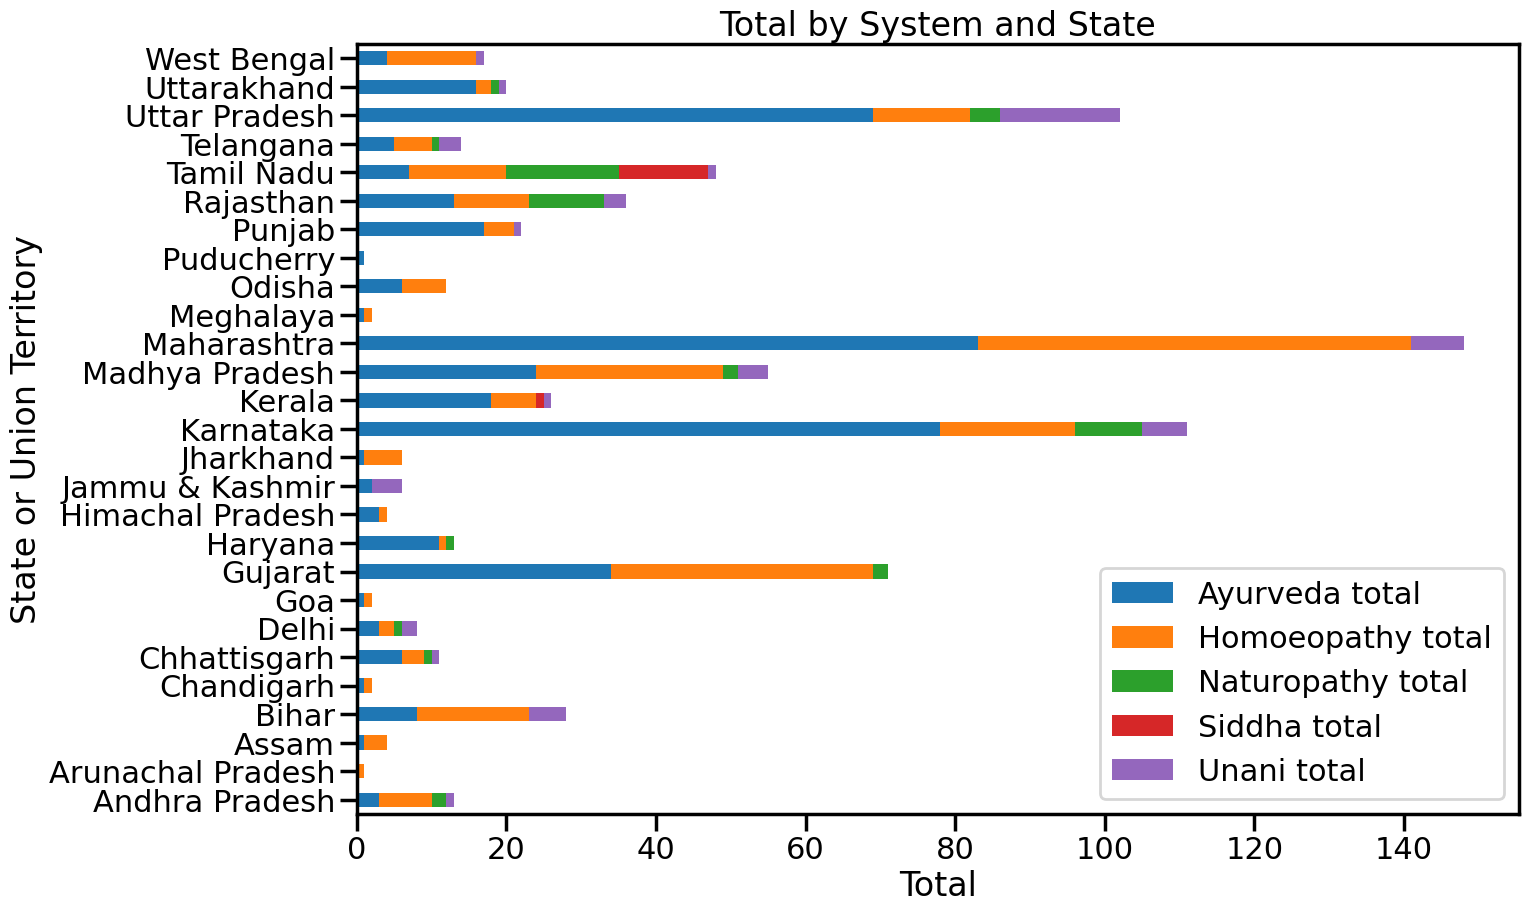

In [ ]:
# Plot a stacked horizontal bar chart
ax = agg_data_pivot.plot(kind='barh', stacked=True, figsize=(15,10))

# Set the x-label
ax.set_xlabel('Total')

# Set the title of the chart
ax.set_title('Total by System and State')

# Show the chart
plt.show()

###screen display print

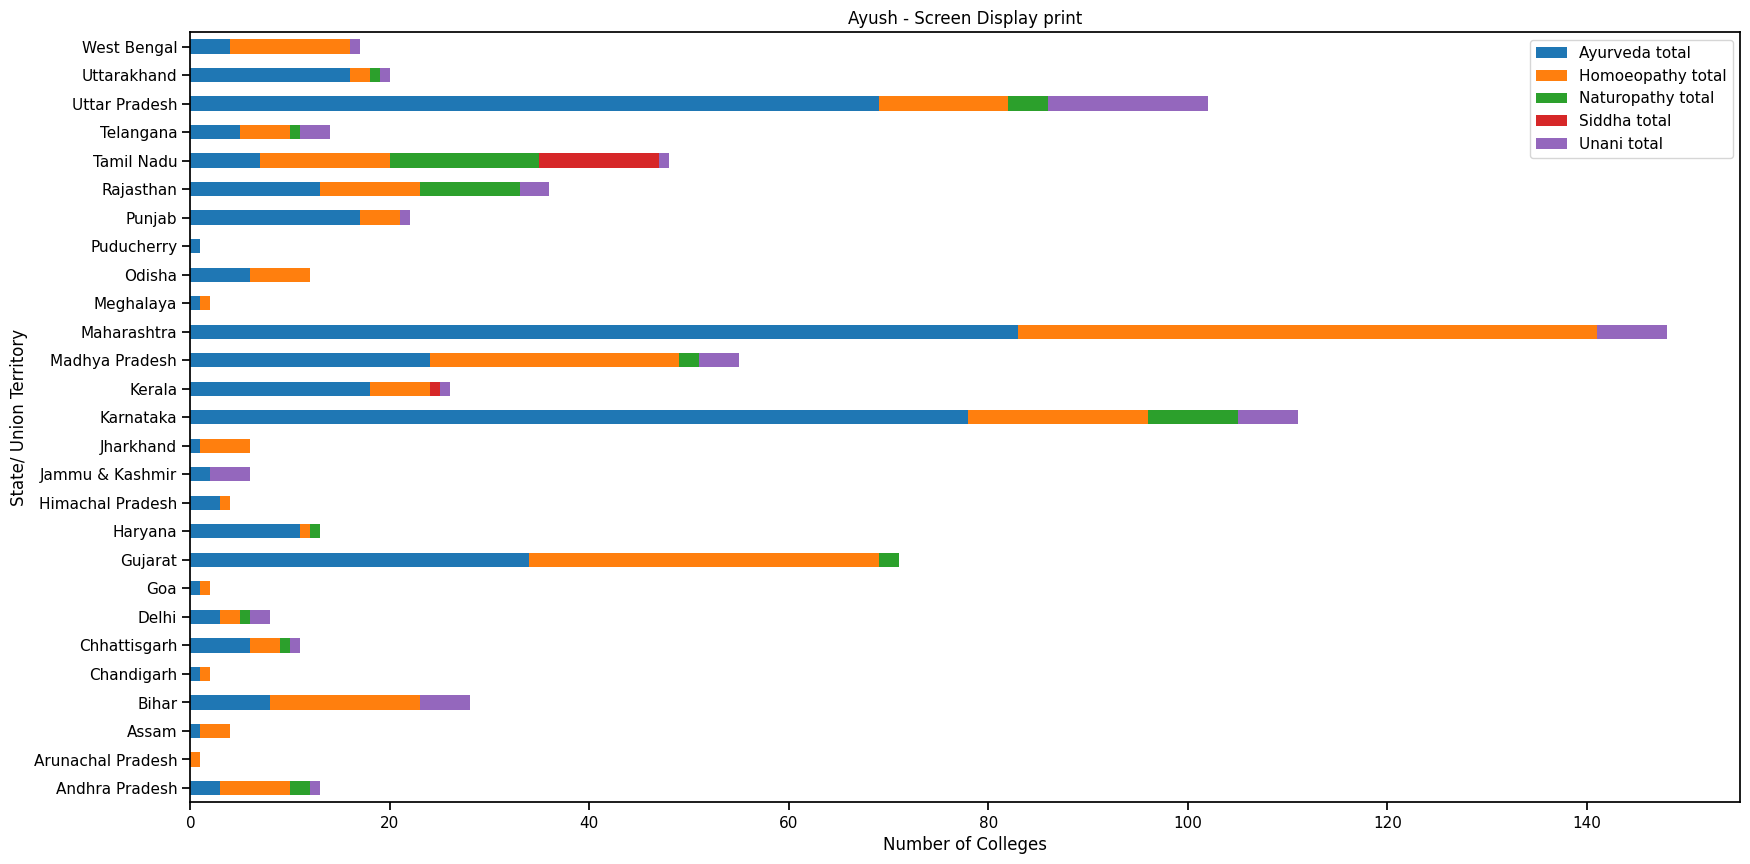

In [ ]:
sns.set_context('notebook')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10))
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.title('Ayush - Screen Display print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###presentation print

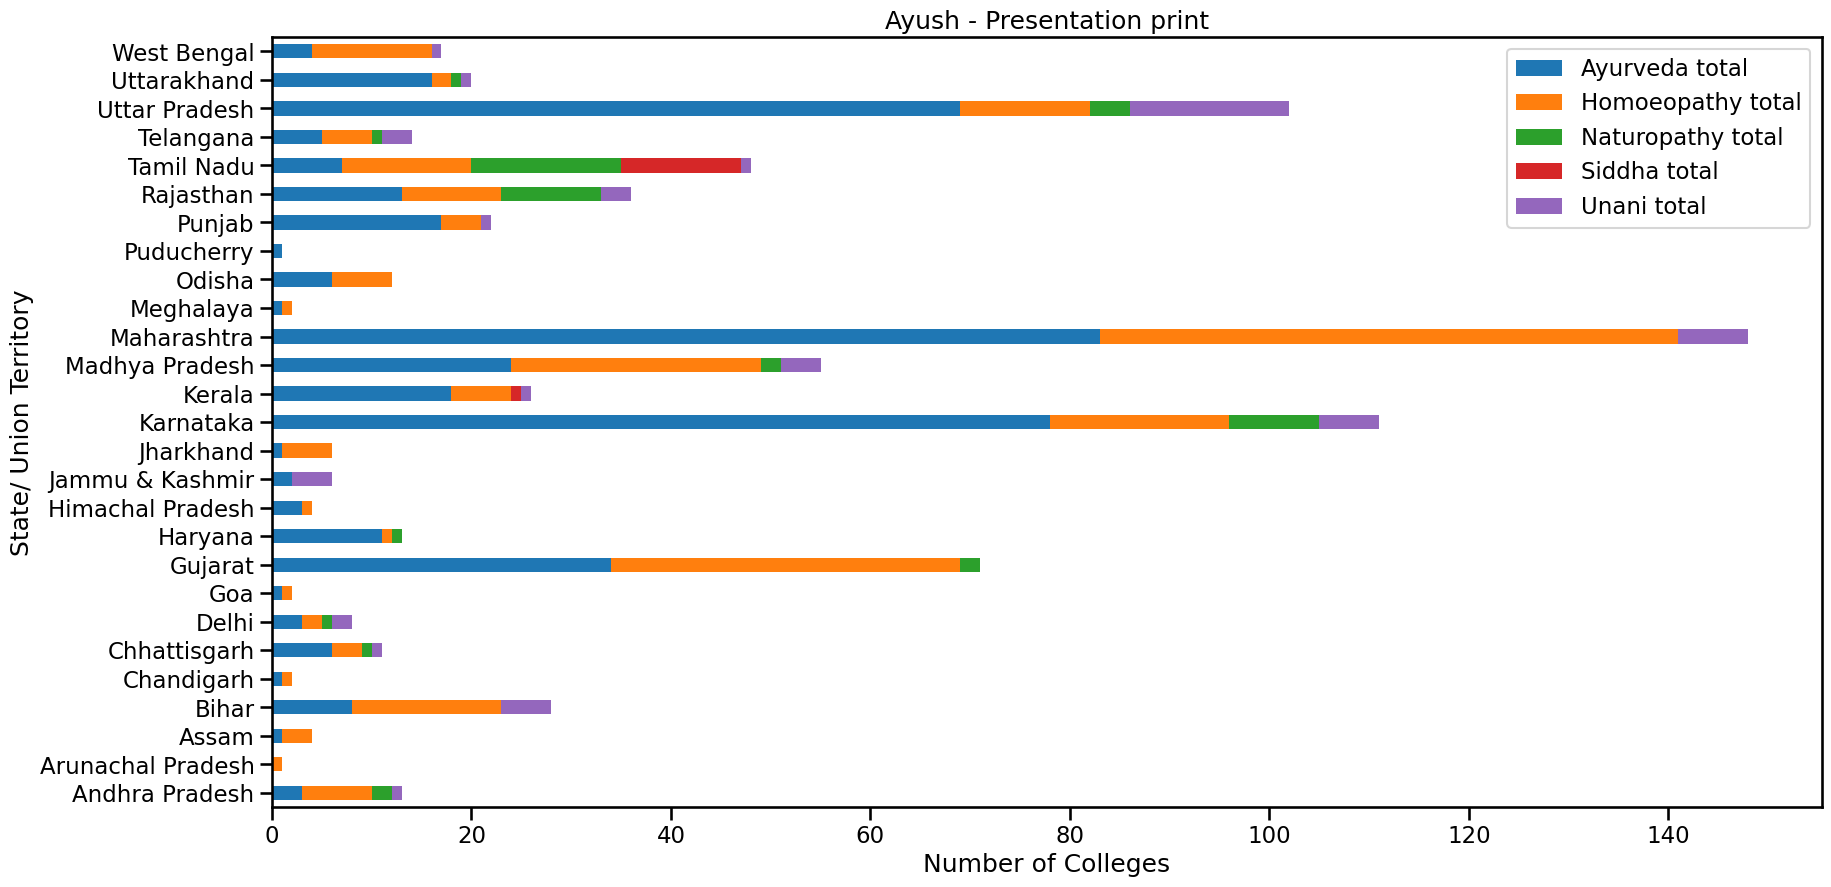

In [ ]:
sns.set_context('talk')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10))
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.title('Ayush - Presentation print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###poster print

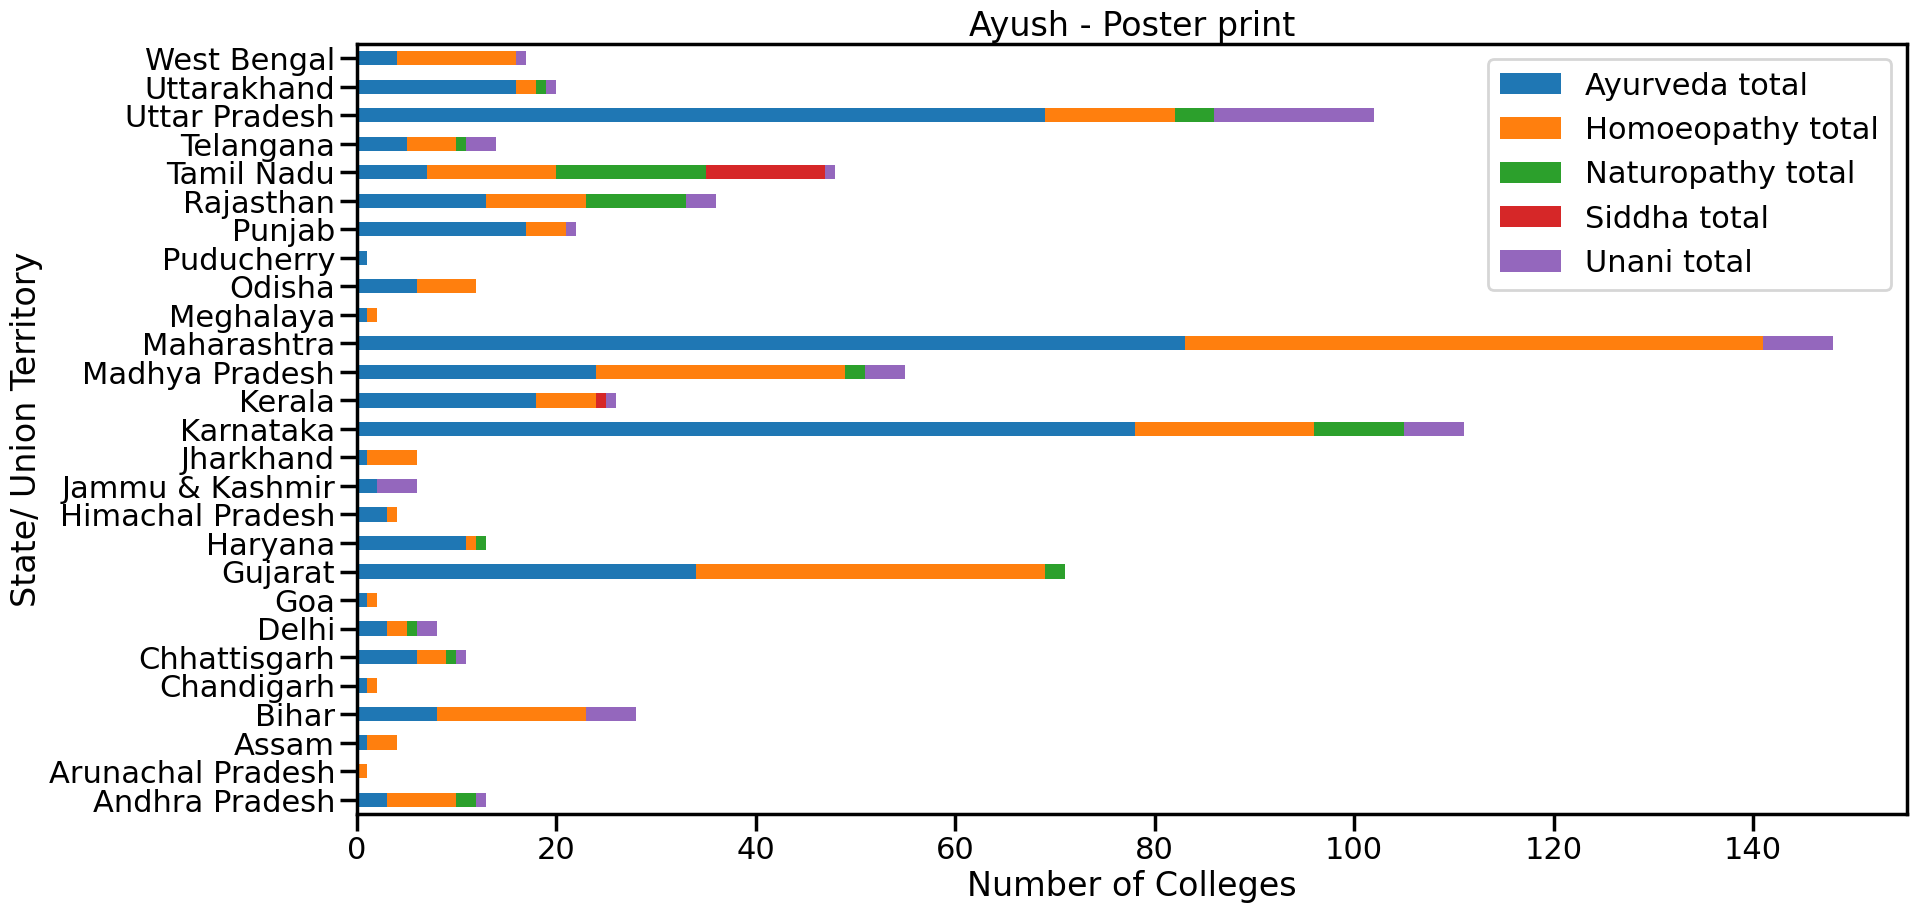

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10))
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.title('Ayush - Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###3 prints side by side

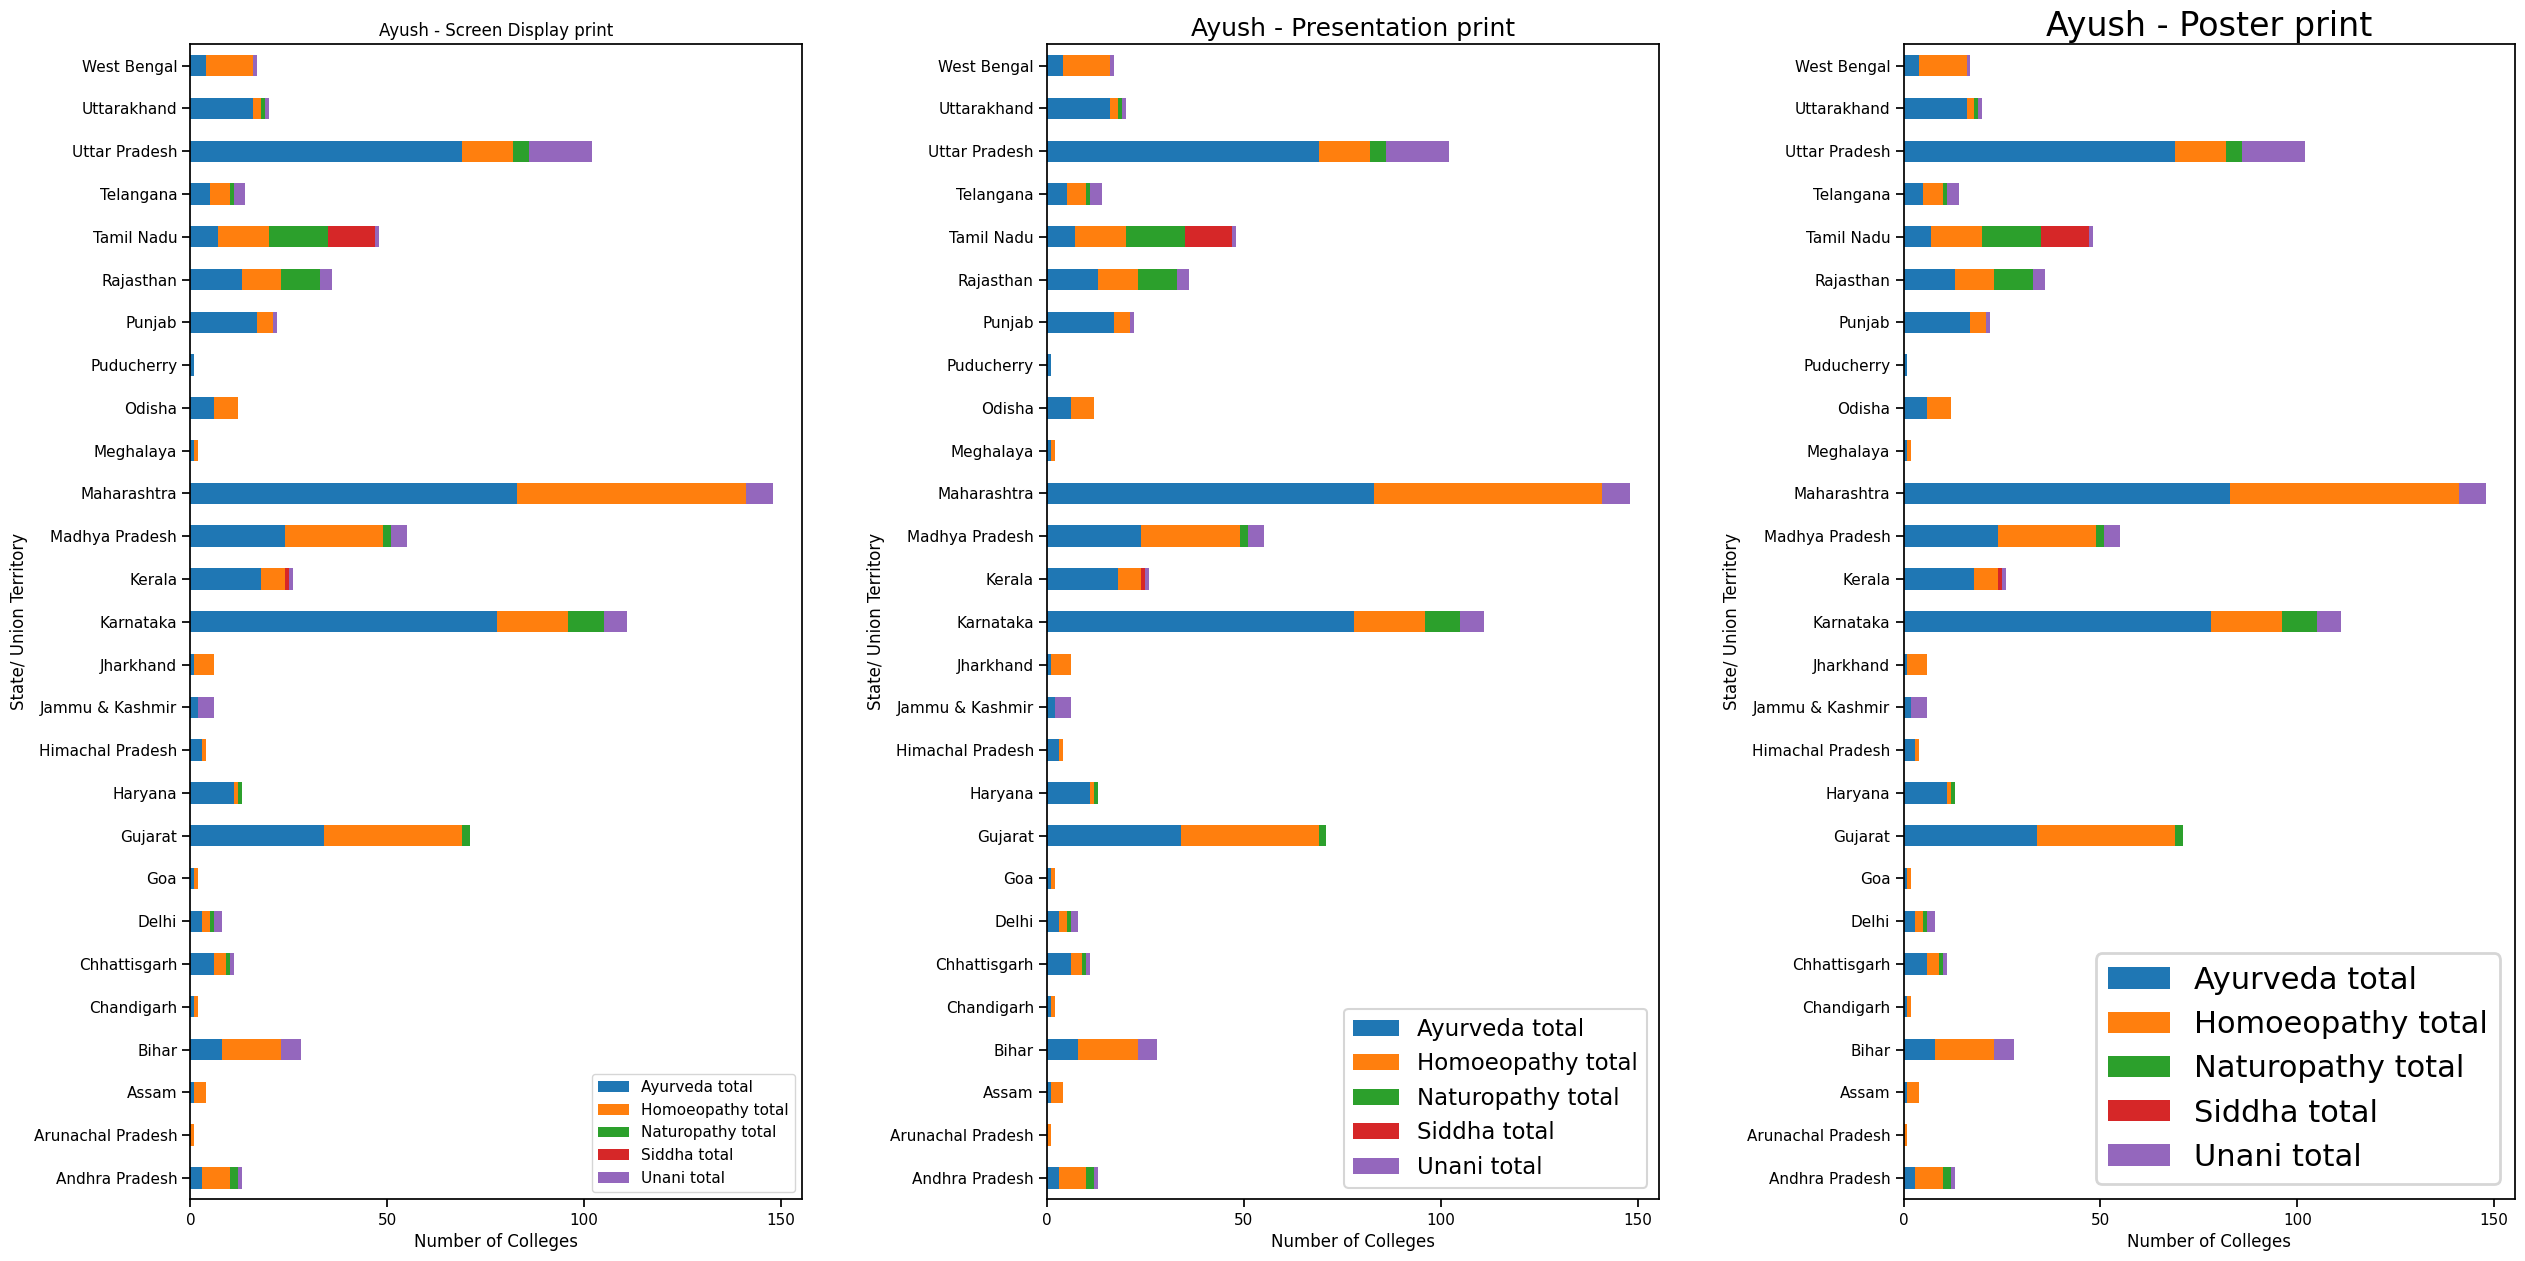

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(30, 15))

# Plot the first graph
agg_data_pivot.plot(kind='barh', stacked=True, ax=axes[0])
axes[0].set_xlabel('Number of Colleges')
axes[0].set_ylabel('State/ Union Territory')
axes[0].set_title('Ayush - Screen Display print')

# Plot the second graph
sns.set_context('talk')
agg_data_pivot.plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_xlabel('Number of Colleges')
axes[1].set_ylabel('State/ Union Territory')
axes[1].set_title('Ayush - Presentation print')

# Plot the third graph
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, ax=axes[2])
axes[2].set_xlabel('Number of Colleges')
axes[2].set_ylabel('State/ Union Territory')
axes[2].set_title('Ayush - Poster print')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()


###continuous colour palette

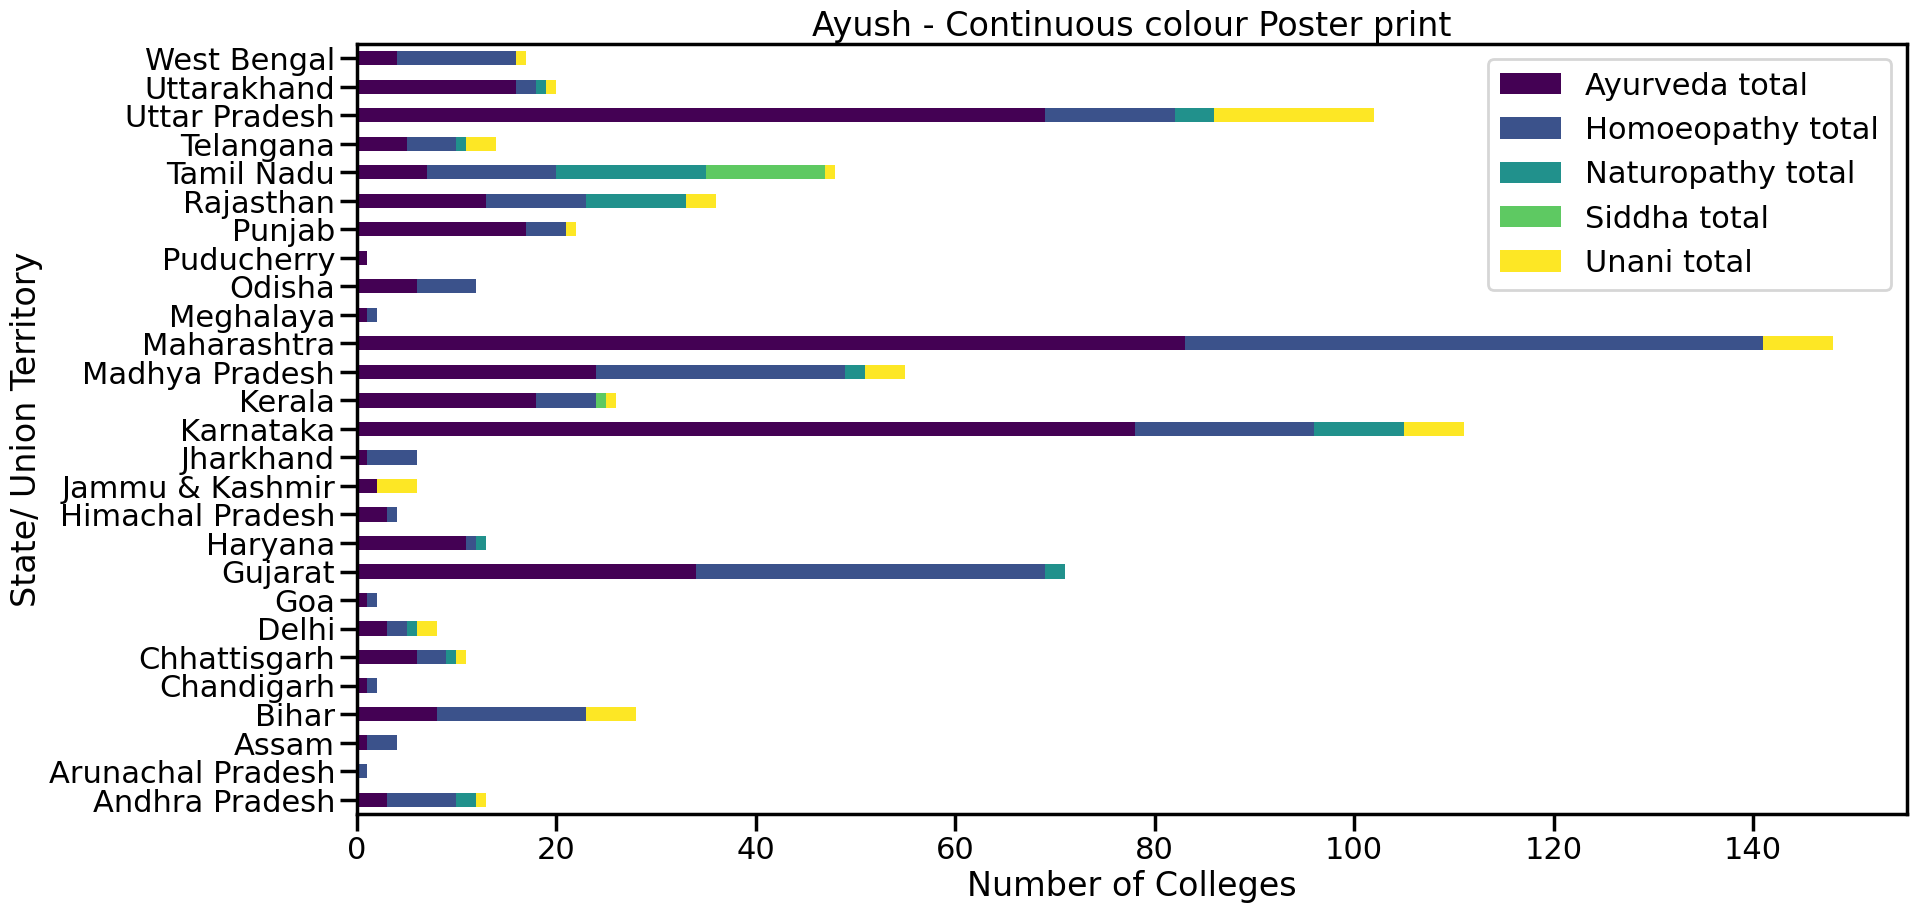

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), cmap='viridis')
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.title('Ayush - Continuous colour Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###one colour sequential 

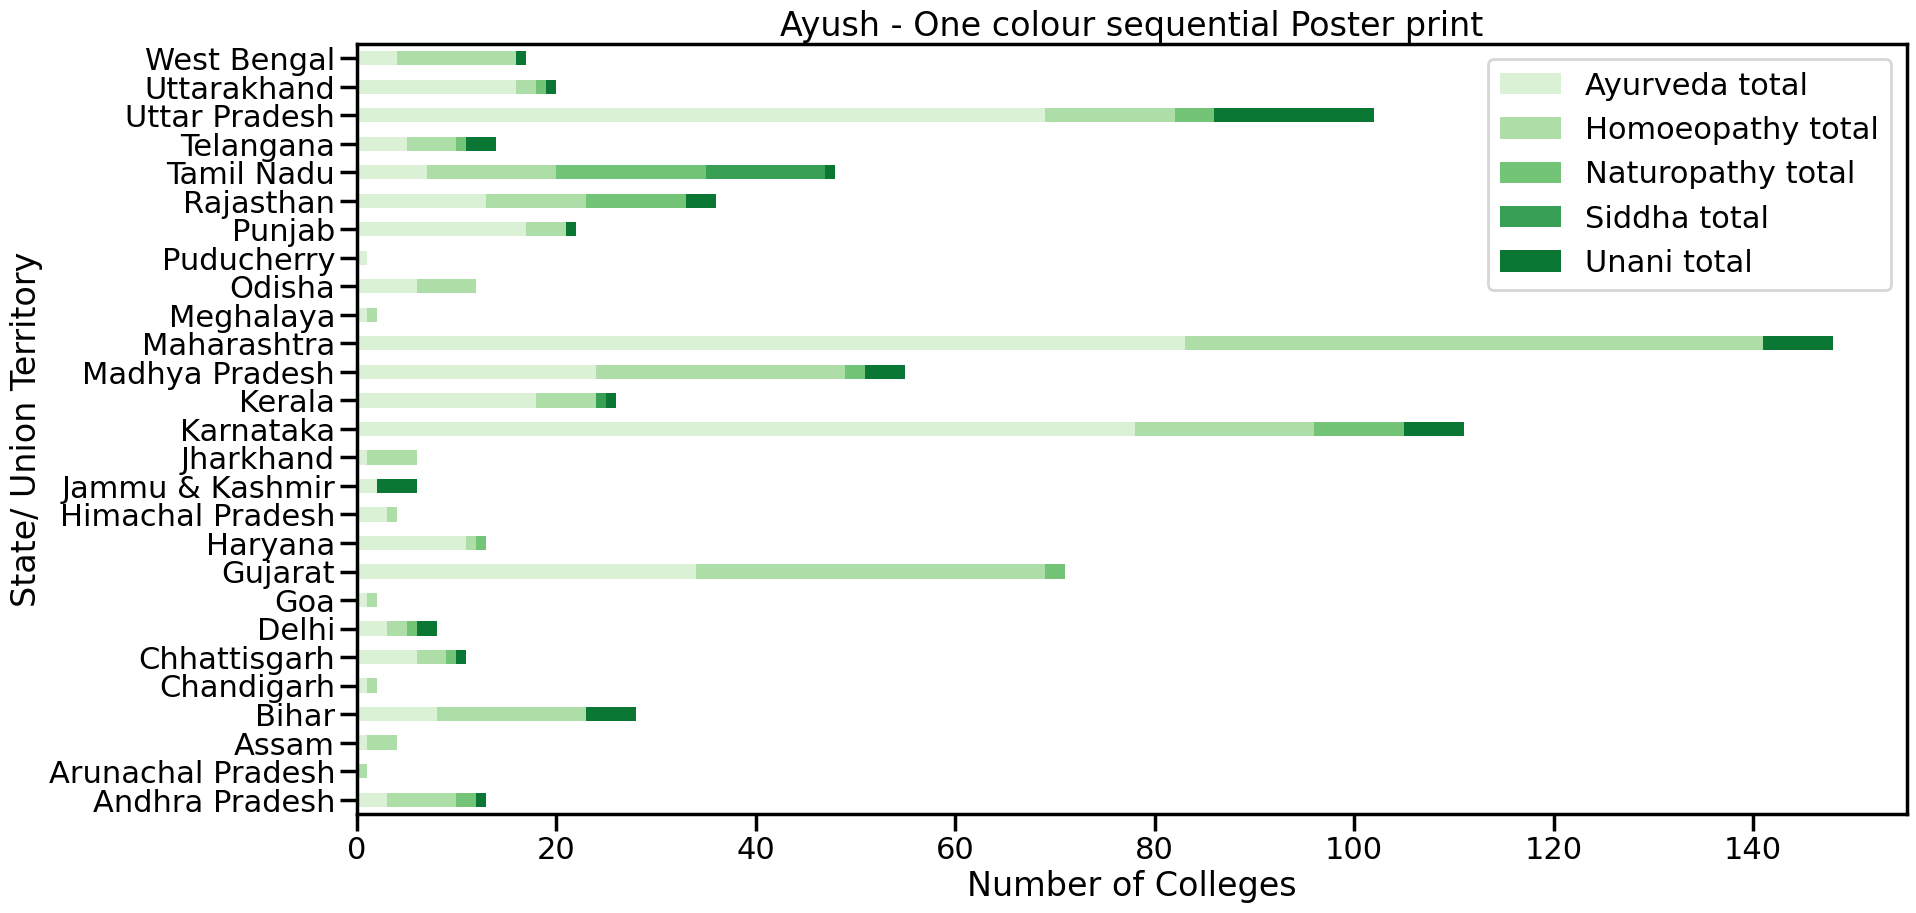

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('Greens', n_colors=len(agg_data_pivot.columns)))
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.title('Ayush - One colour sequential Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###bipolar sequential

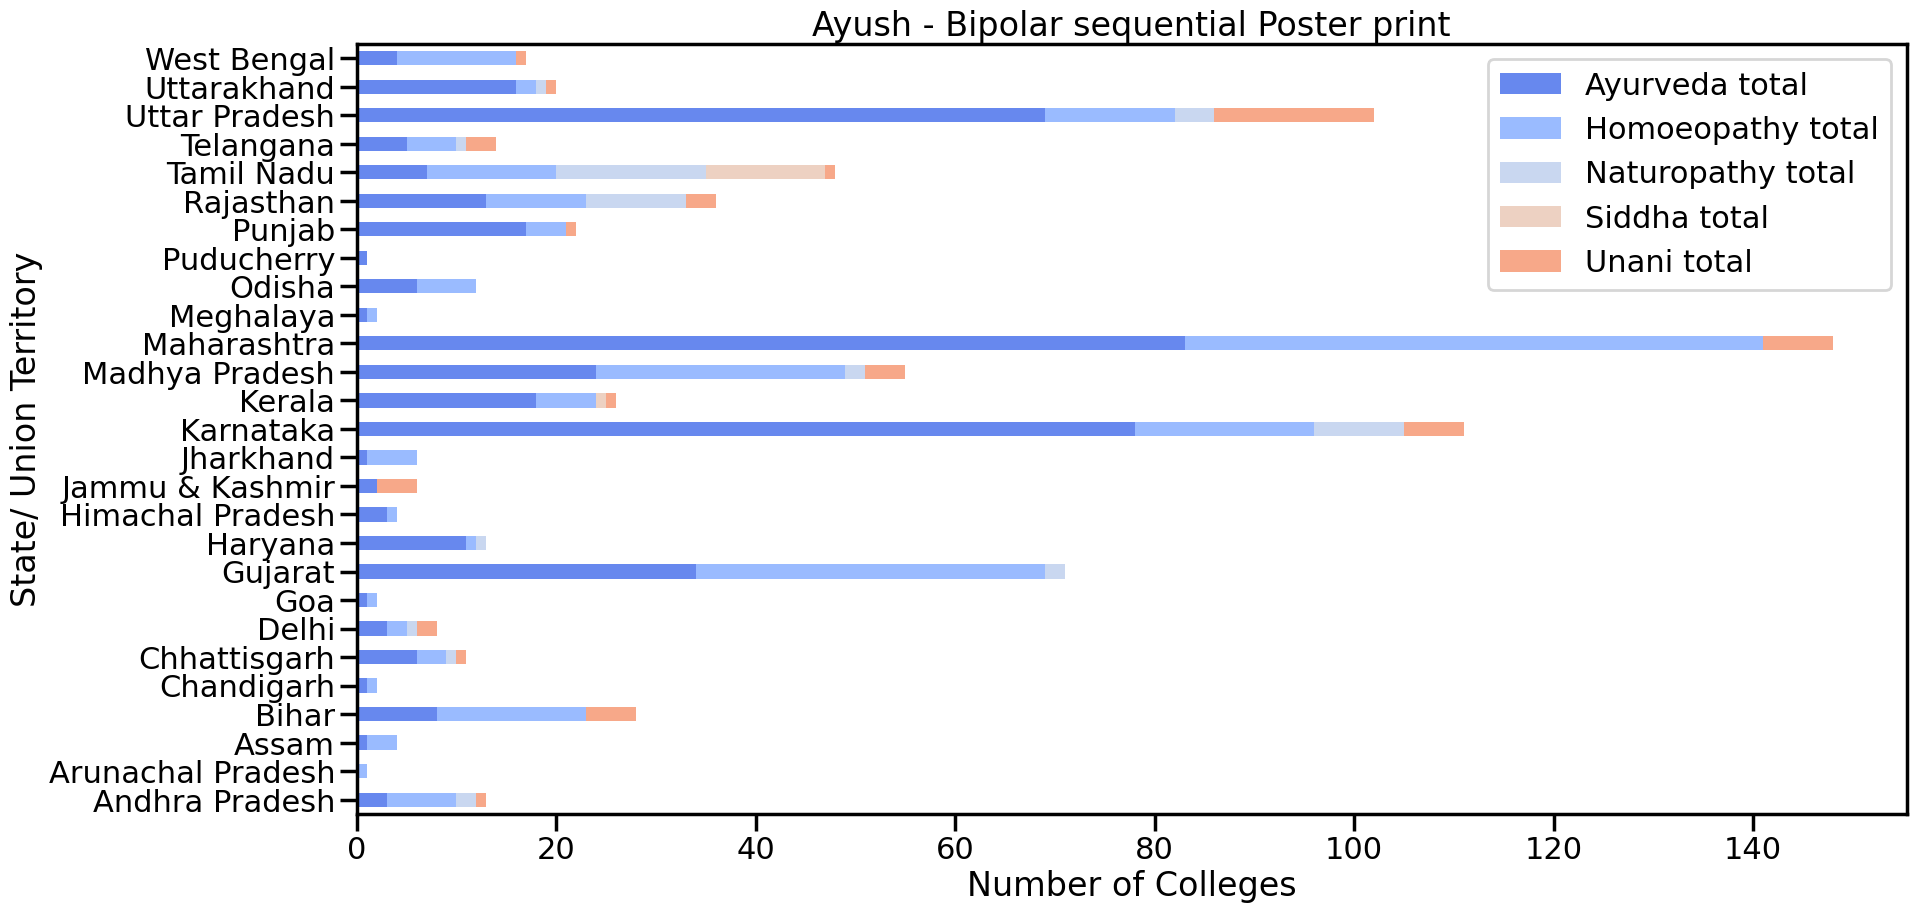

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('coolwarm'))
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.title('Ayush - Bipolar sequential Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###custom colours

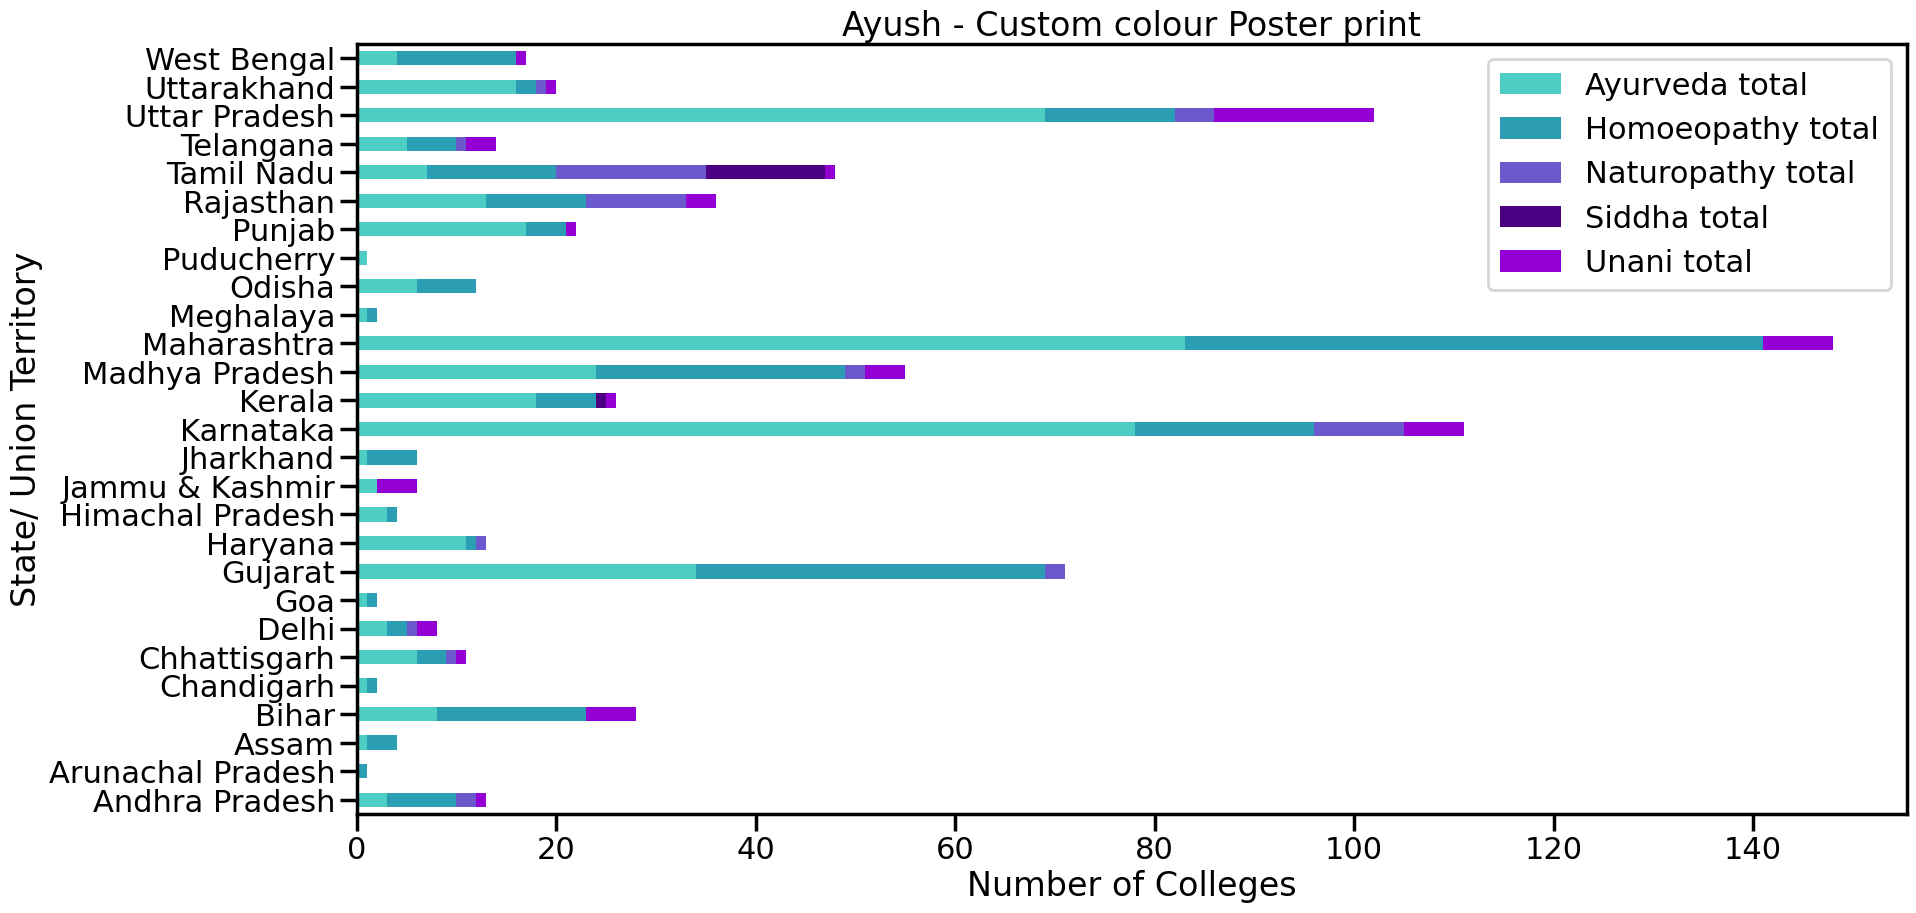

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'])
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.title('Ayush - Custom colour Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###all colours in a subplot

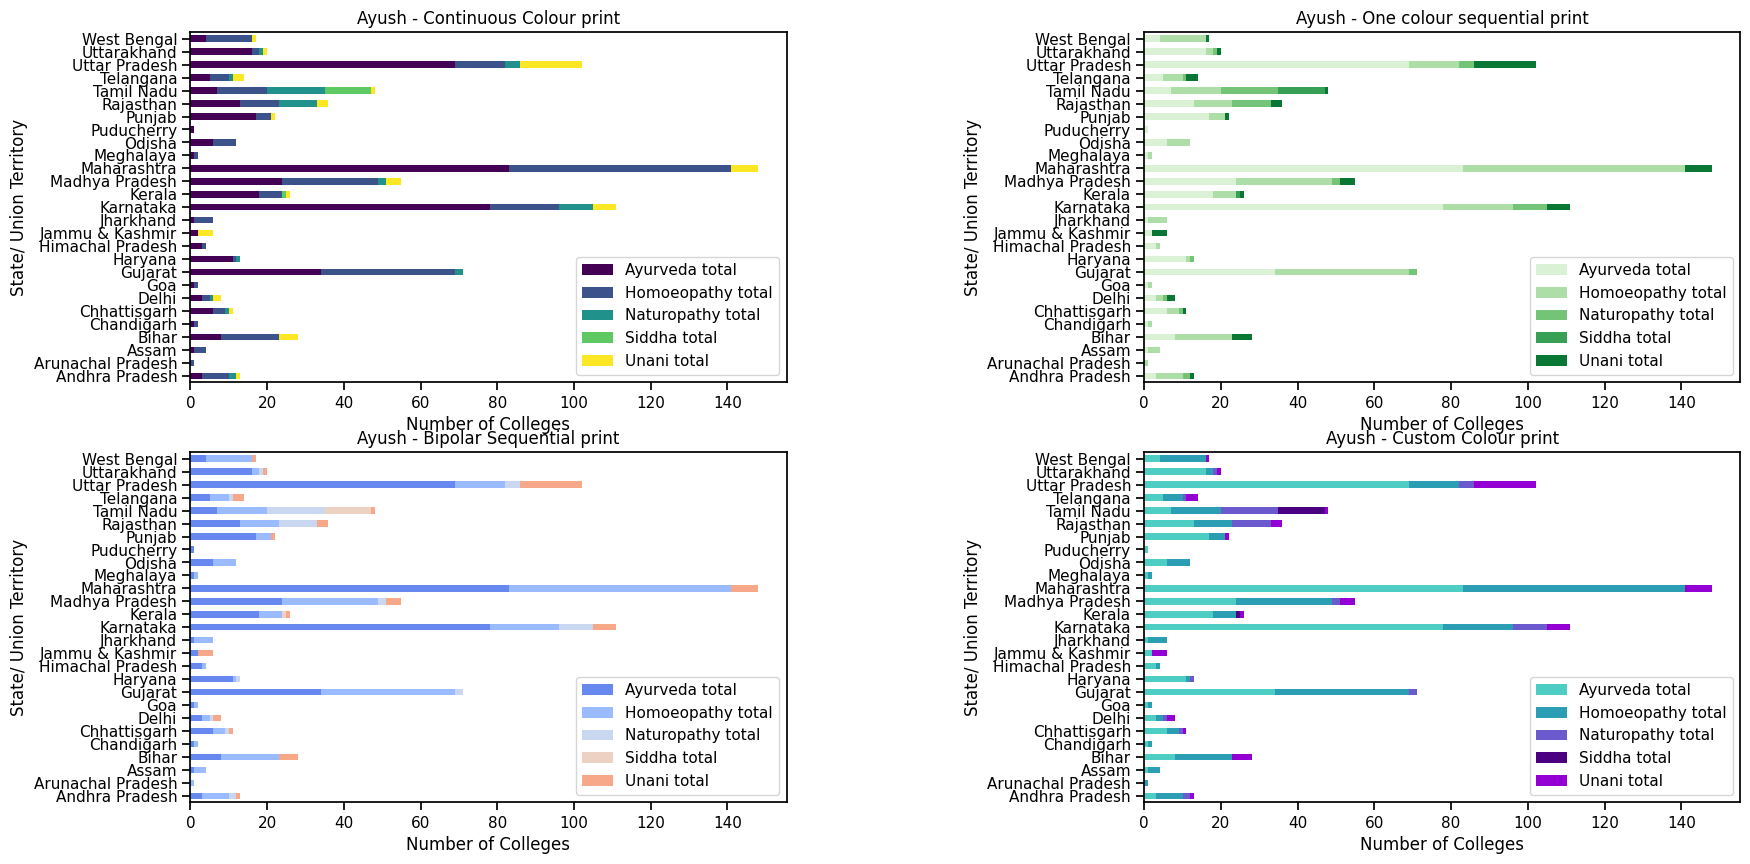

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(50, 50))

# Plot the first graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), cmap='viridis', ax=axes[0][0])
axes[0][0].set_xlabel('Number of Colleges')
axes[0][0].set_ylabel('State/ Union Territory')
axes[0][0].set_title('Ayush - Continuous Colour print')

# Plot the second graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('Greens', n_colors=len(agg_data_pivot.columns)), ax=axes[0][1])
axes[0][1].set_xlabel('Number of Colleges')
axes[0][1].set_ylabel('State/ Union Territory')
axes[0][1].set_title('Ayush - One colour sequential print')

# Plot the third graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('coolwarm'), ax=axes[1][0])
axes[1][0].set_xlabel('Number of Colleges')
axes[1][0].set_ylabel('State/ Union Territory')
axes[1][0].set_title('Ayush - Bipolar Sequential print')

# Plot the fourth graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'], ax=axes[1][1])
axes[1][1].set_xlabel('Number of Colleges')
axes[1][1].set_ylabel('State/ Union Territory')
axes[1][1].set_title('Ayush - Custom Colour print')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.6)

# Show the plots
plt.show()


###log scale

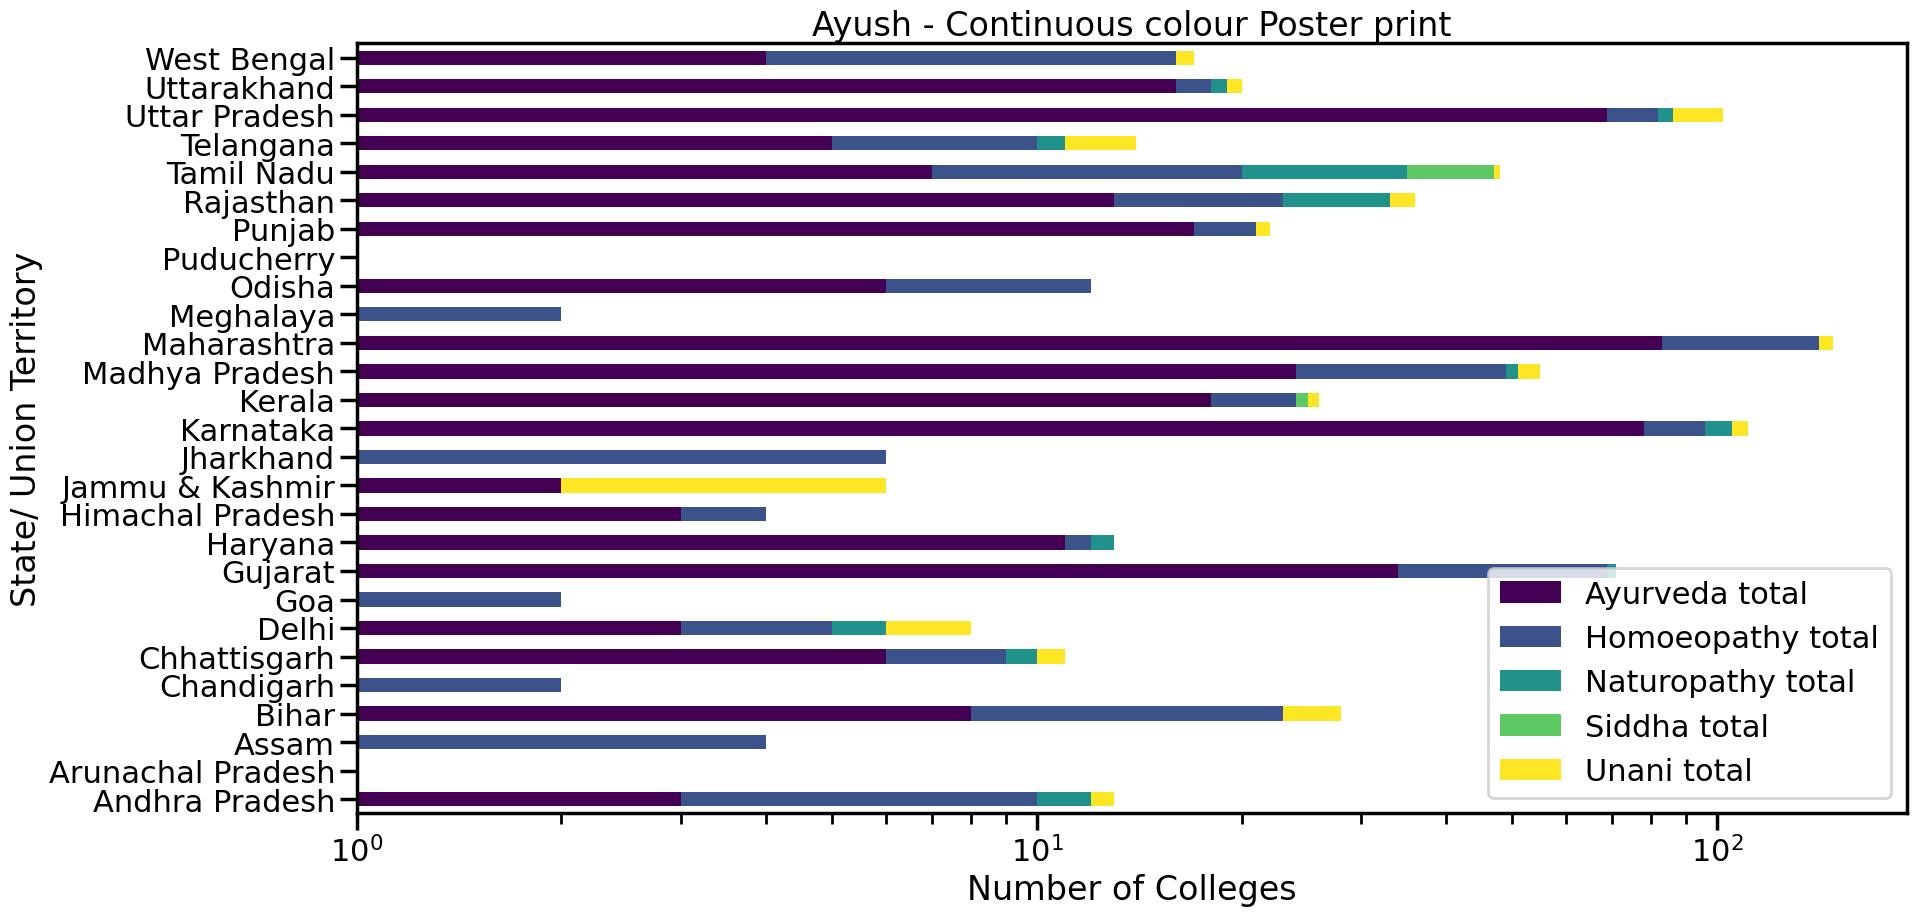

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), cmap='viridis')
plt.xlabel('Number of Colleges')
plt.ylabel('State/ Union Territory')
plt.xscale('log')
plt.title('Ayush - Continuous colour Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###comparison between normal and log scale

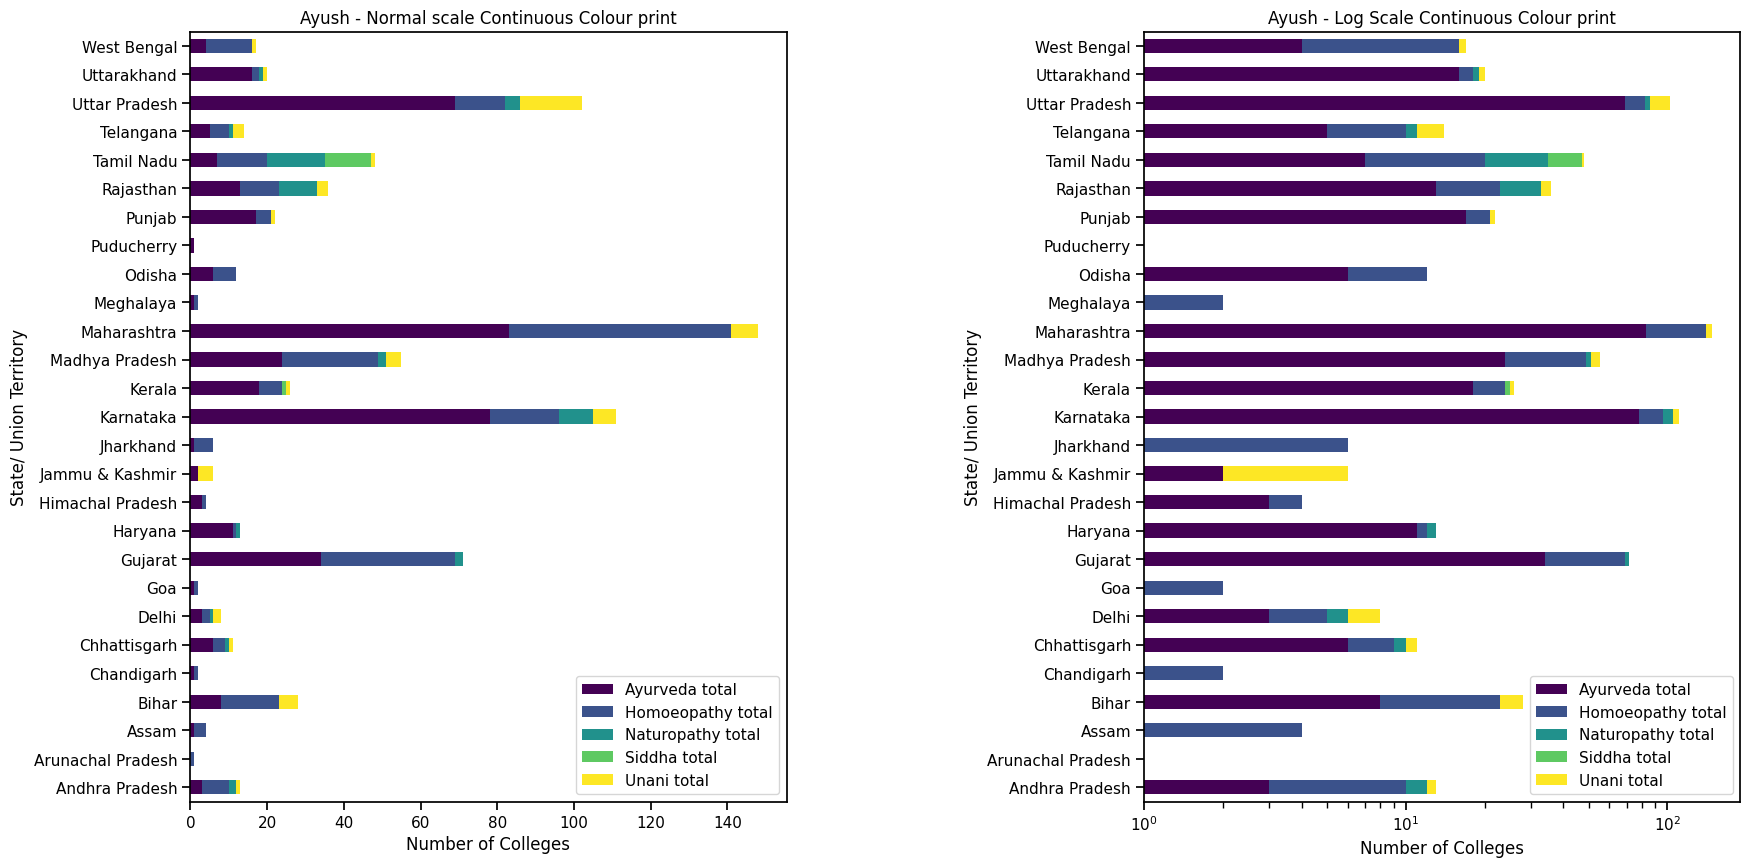

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(50, 50))

# Plot the first graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), cmap='viridis', ax=axes[0])
axes[0].set_xlabel('Number of Colleges')
axes[0].set_ylabel('State/ Union Territory')
axes[0].set_title('Ayush - Normal scale Continuous Colour print')

# Plot the first graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), cmap='viridis', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_xlabel('Number of Colleges')
axes[1].set_ylabel('State/ Union Territory')
axes[1].set_title('Ayush - Log Scale Continuous Colour print')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.6)

# Show the plots
plt.show()

#Agriculture

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DV LAB/lab4/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')

In [ ]:
df

Particulars Frequency    Unit   9-2013  \
0                                 Foodgrains   Monthly  Ton mn    59.24   
1                            Foodgrains Rice   Monthly  Ton mn    19.03   
2  Foodgrains Unmilled Paddy in term of Rice   Monthly  Ton mn     4.11   
3                           Foodgrains Wheat   Monthly  Ton mn    36.10   

    10-2013   11-2013   12-2013   1-2014   2-2014   3-2014   4-2014   5-2014  \
0     62.68     59.69     58.37    55.91    52.48    48.39    63.06    69.85   
1     16.85     14.22     14.70    16.94    18.88    20.28    20.42    20.65   
2     11.73     14.41     15.62    14.77    12.76    10.28     8.24     7.61   
3     34.10     31.07     28.05    24.20    20.84    17.83    34.40    41.59   

    6-2014  
0    65.34  
1    21.24  
2     4.30  
3    39.80

##data manipulation for total number of colleges

In [ ]:
# Only keep the last 3 rows
agg_data_pivot = df.drop(index=0)
agg_data_pivot

Particulars Frequency    Unit   9-2013  \
1                            Foodgrains Rice   Monthly  Ton mn    19.03   
2  Foodgrains Unmilled Paddy in term of Rice   Monthly  Ton mn     4.11   
3                           Foodgrains Wheat   Monthly  Ton mn    36.10   

    10-2013   11-2013   12-2013   1-2014   2-2014   3-2014   4-2014   5-2014  \
1     16.85     14.22     14.70    16.94    18.88    20.28    20.42    20.65   
2     11.73     14.41     15.62    14.77    12.76    10.28     8.24     7.61   
3     34.10     31.07     28.05    24.20    20.84    17.83    34.40    41.59   

    6-2014  
1    21.24  
2     4.30  
3    39.80

##plots


###horizontal bar

In [ ]:
# Transpose the dataframe to have months as rows and Particulars as columns
df_transposed = agg_data_pivot.set_index('Particulars').T.reset_index()

# Rename the index column to 'Month'
df_transposed = df_transposed.rename(columns={'index': 'Month'})

df_transposed = df_transposed.drop(index=0)
df_transposed = df_transposed.drop(index=1)
df_transposed = df_transposed.reset_index()
df_transposed = df_transposed.drop(columns=["index"])

In [ ]:
df_transposed

Particulars     Month Foodgrains Rice  \
0              9-2013           19.03   
1             10-2013           16.85   
2             11-2013           14.22   
3             12-2013            14.7   
4              1-2014           16.94   
5              2-2014           18.88   
6              3-2014           20.28   
7              4-2014           20.42   
8              5-2014           20.65   
9              6-2014           21.24   

Particulars Foodgrains Unmilled Paddy in term of Rice Foodgrains Wheat  
0                                                4.11             36.1  
1                                               11.73             34.1  
2                                               14.41            31.07  
3                                               15.62            28.05  
4                                               14.77             24.2  
5                                               12.76            20.84  
6                                               10.28            17.83  
7                                                8.24             34.4  
8                                                7.61            41.59  
9                                                 4.3             39.8

In [ ]:
agg_data_pivot = df_transposed

Text(0.5, 1.0, 'Agriculture - Produce vs Month')

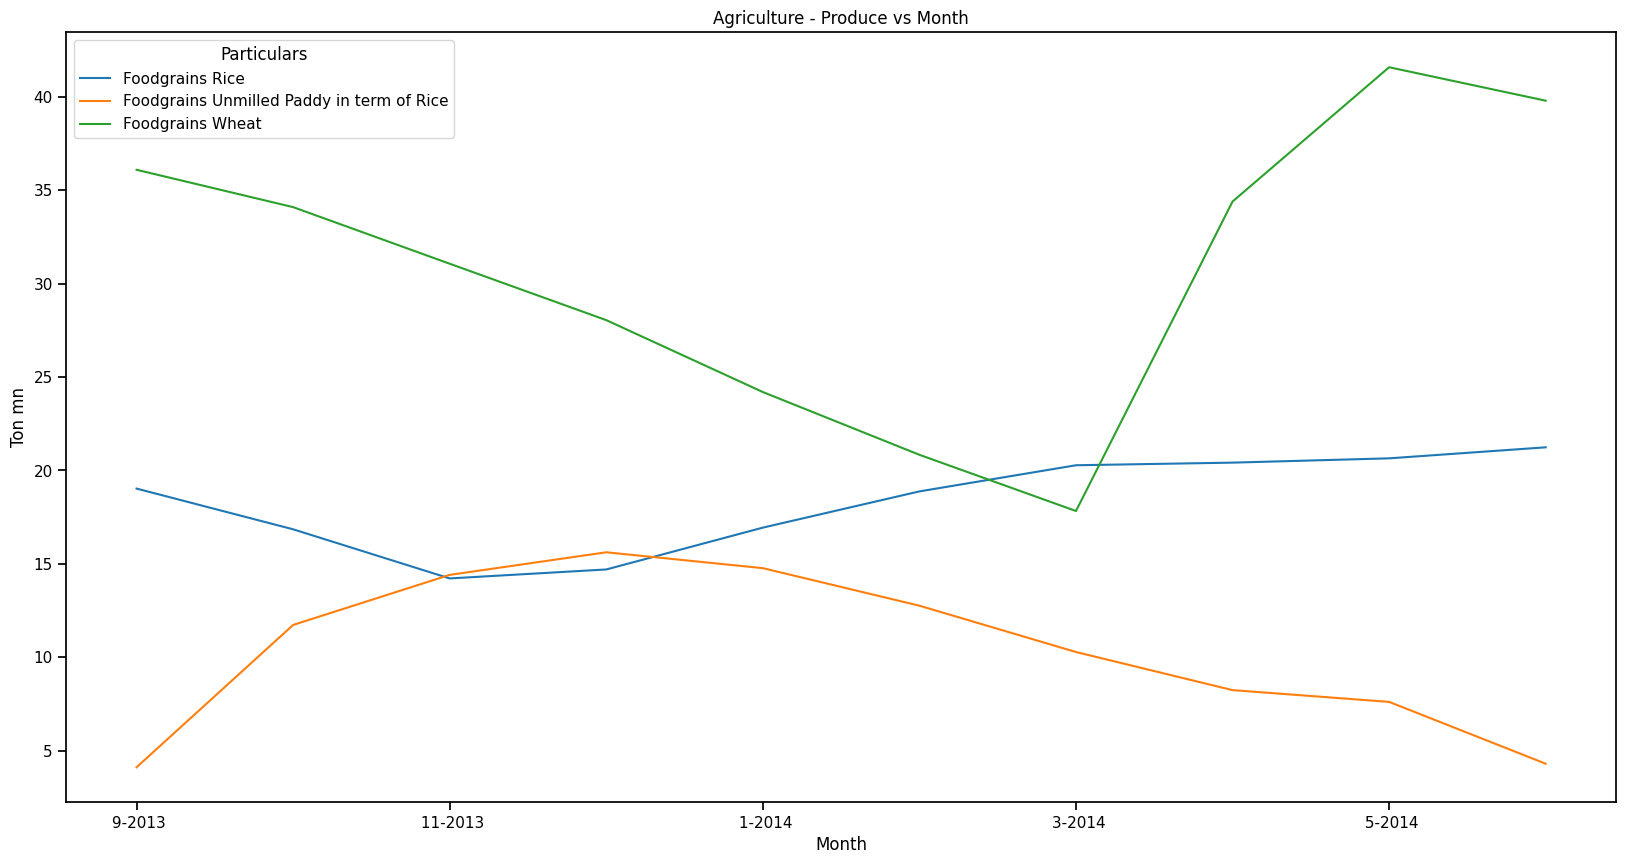

In [ ]:
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10))
ax.set_xticks(range(len(agg_data_pivot['Month'])))
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - Produce vs Month')

###screen display print

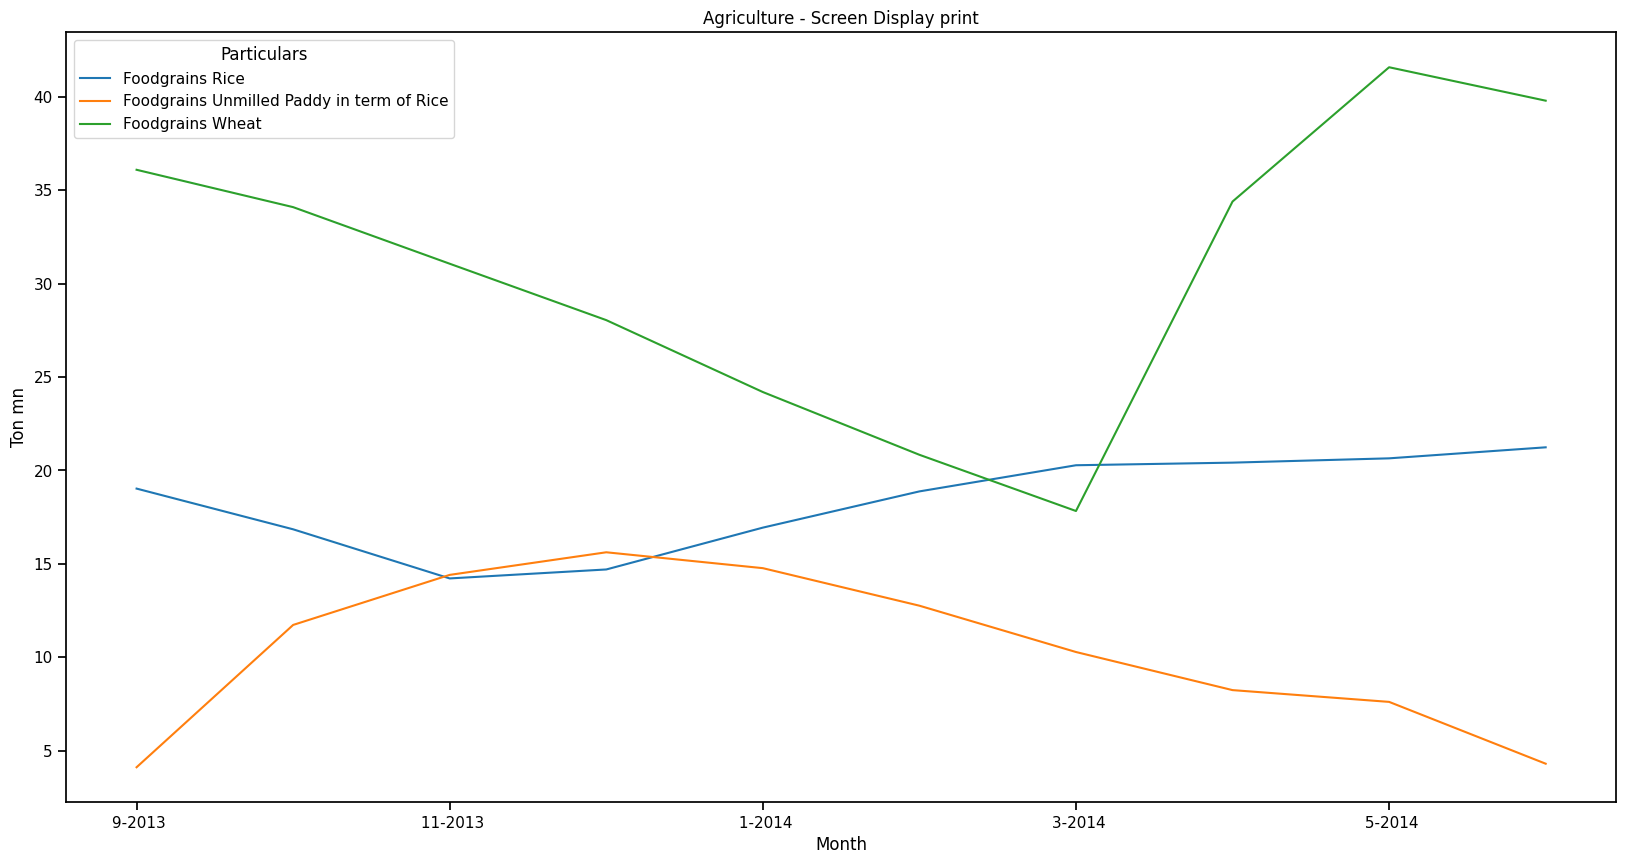

In [ ]:
sns.set_context('notebook')
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10))
ax.set_xticks(range(len(agg_data_pivot['Month'])))
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - Screen Display print')
plt.show()
print()

###presentation print

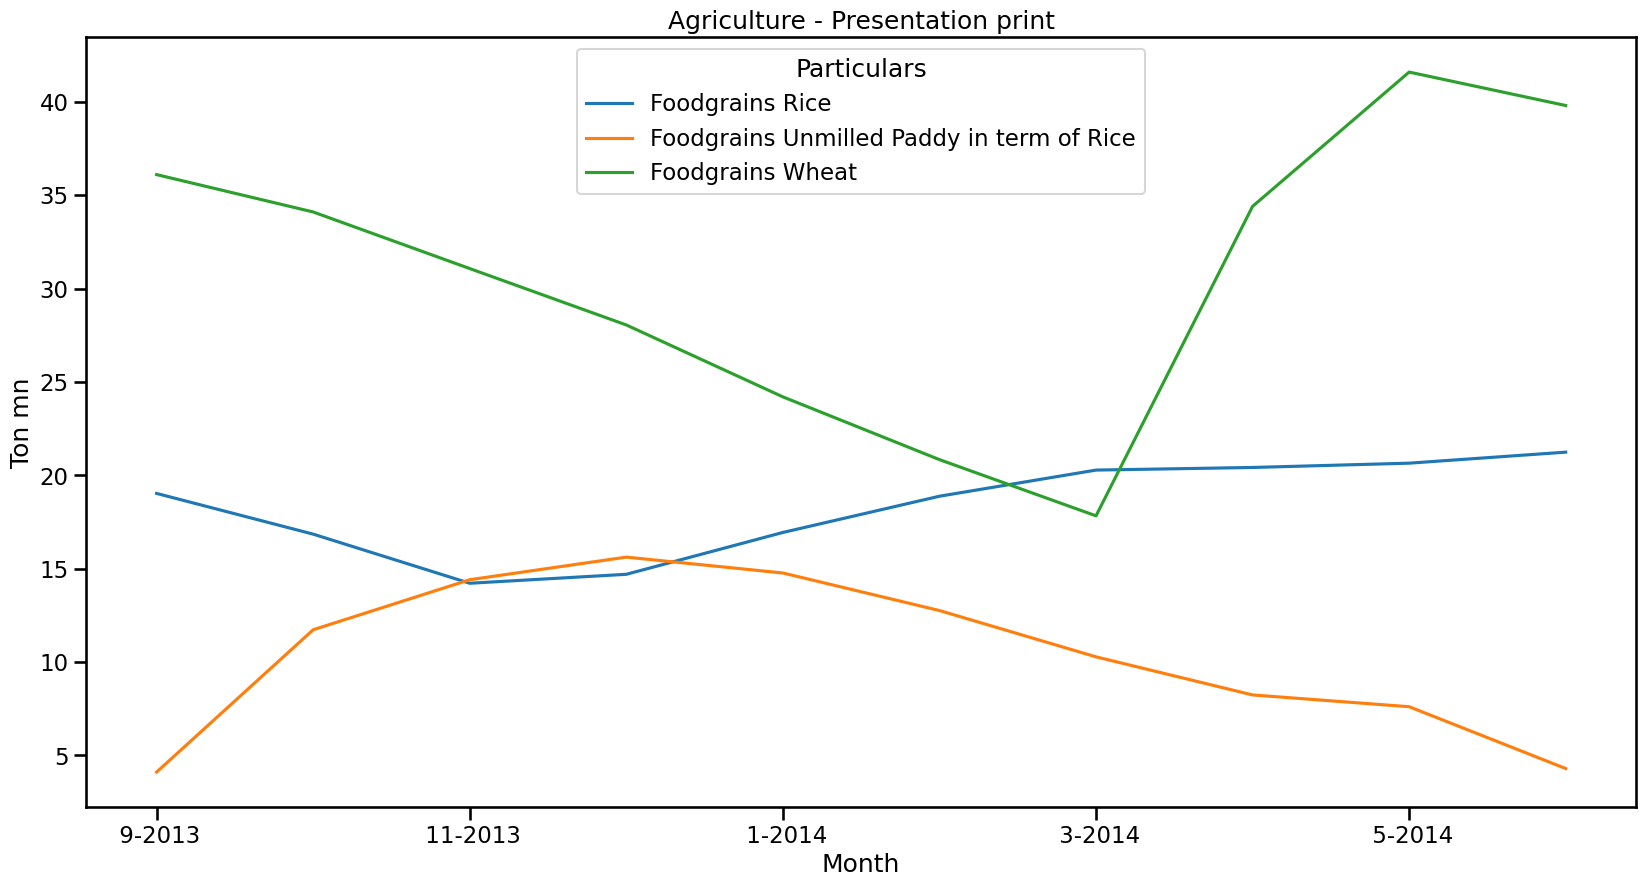

In [ ]:
sns.set_context('talk')
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10))
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - Presentation print')
plt.show()
print()

###poster print

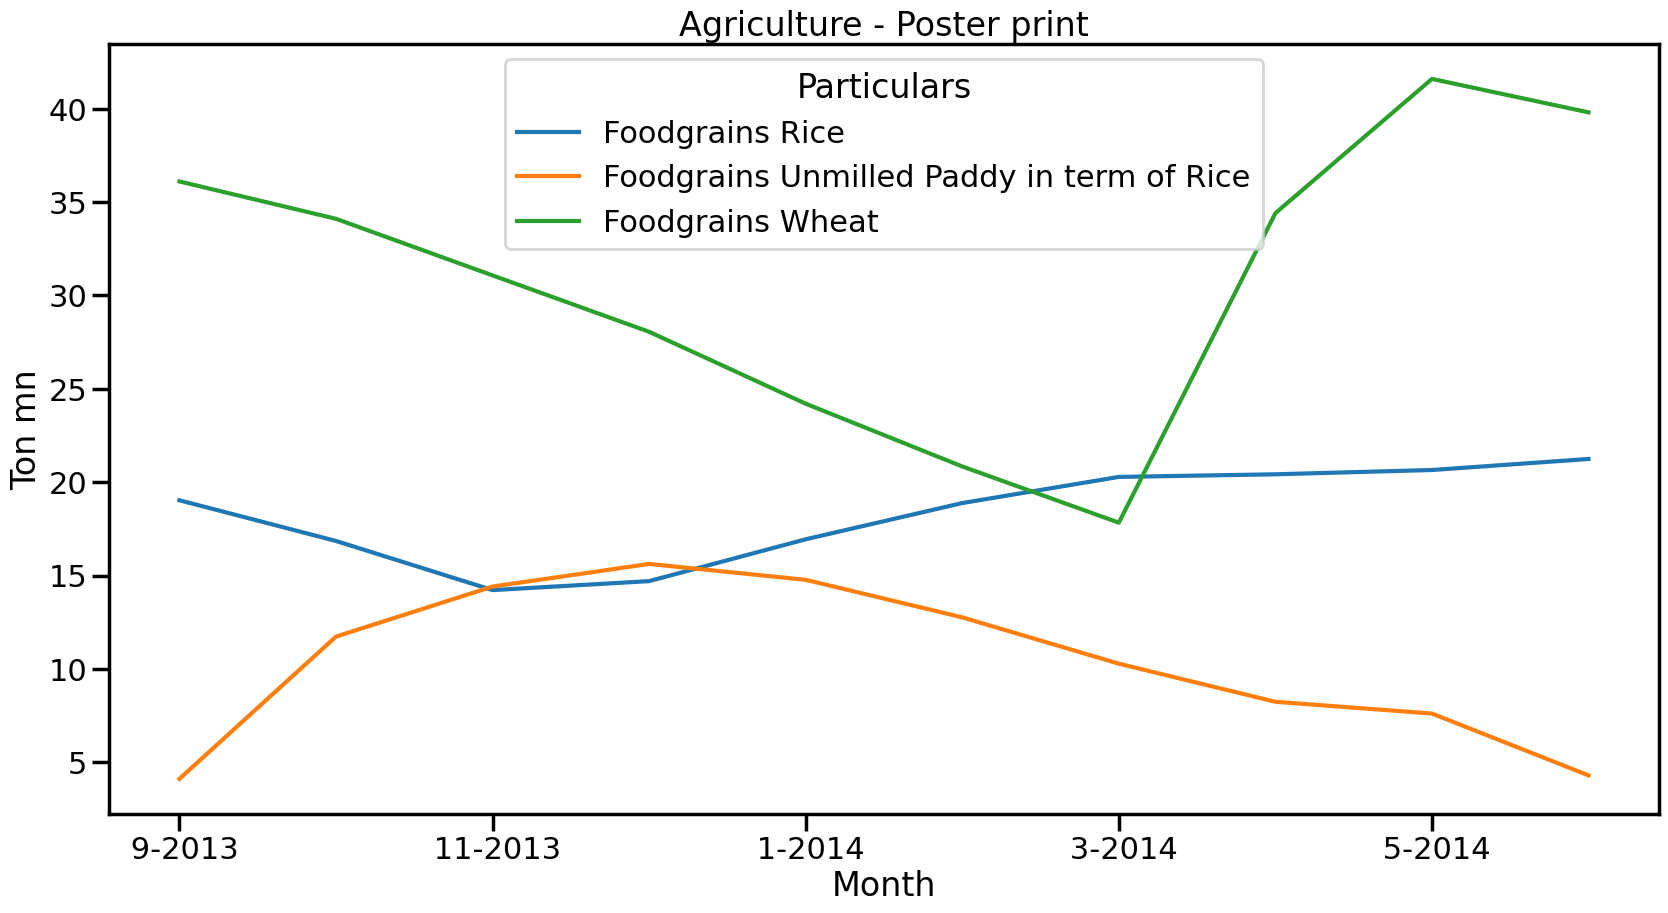

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10))
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - Poster print')
plt.show()
print()

###3 prints side by side

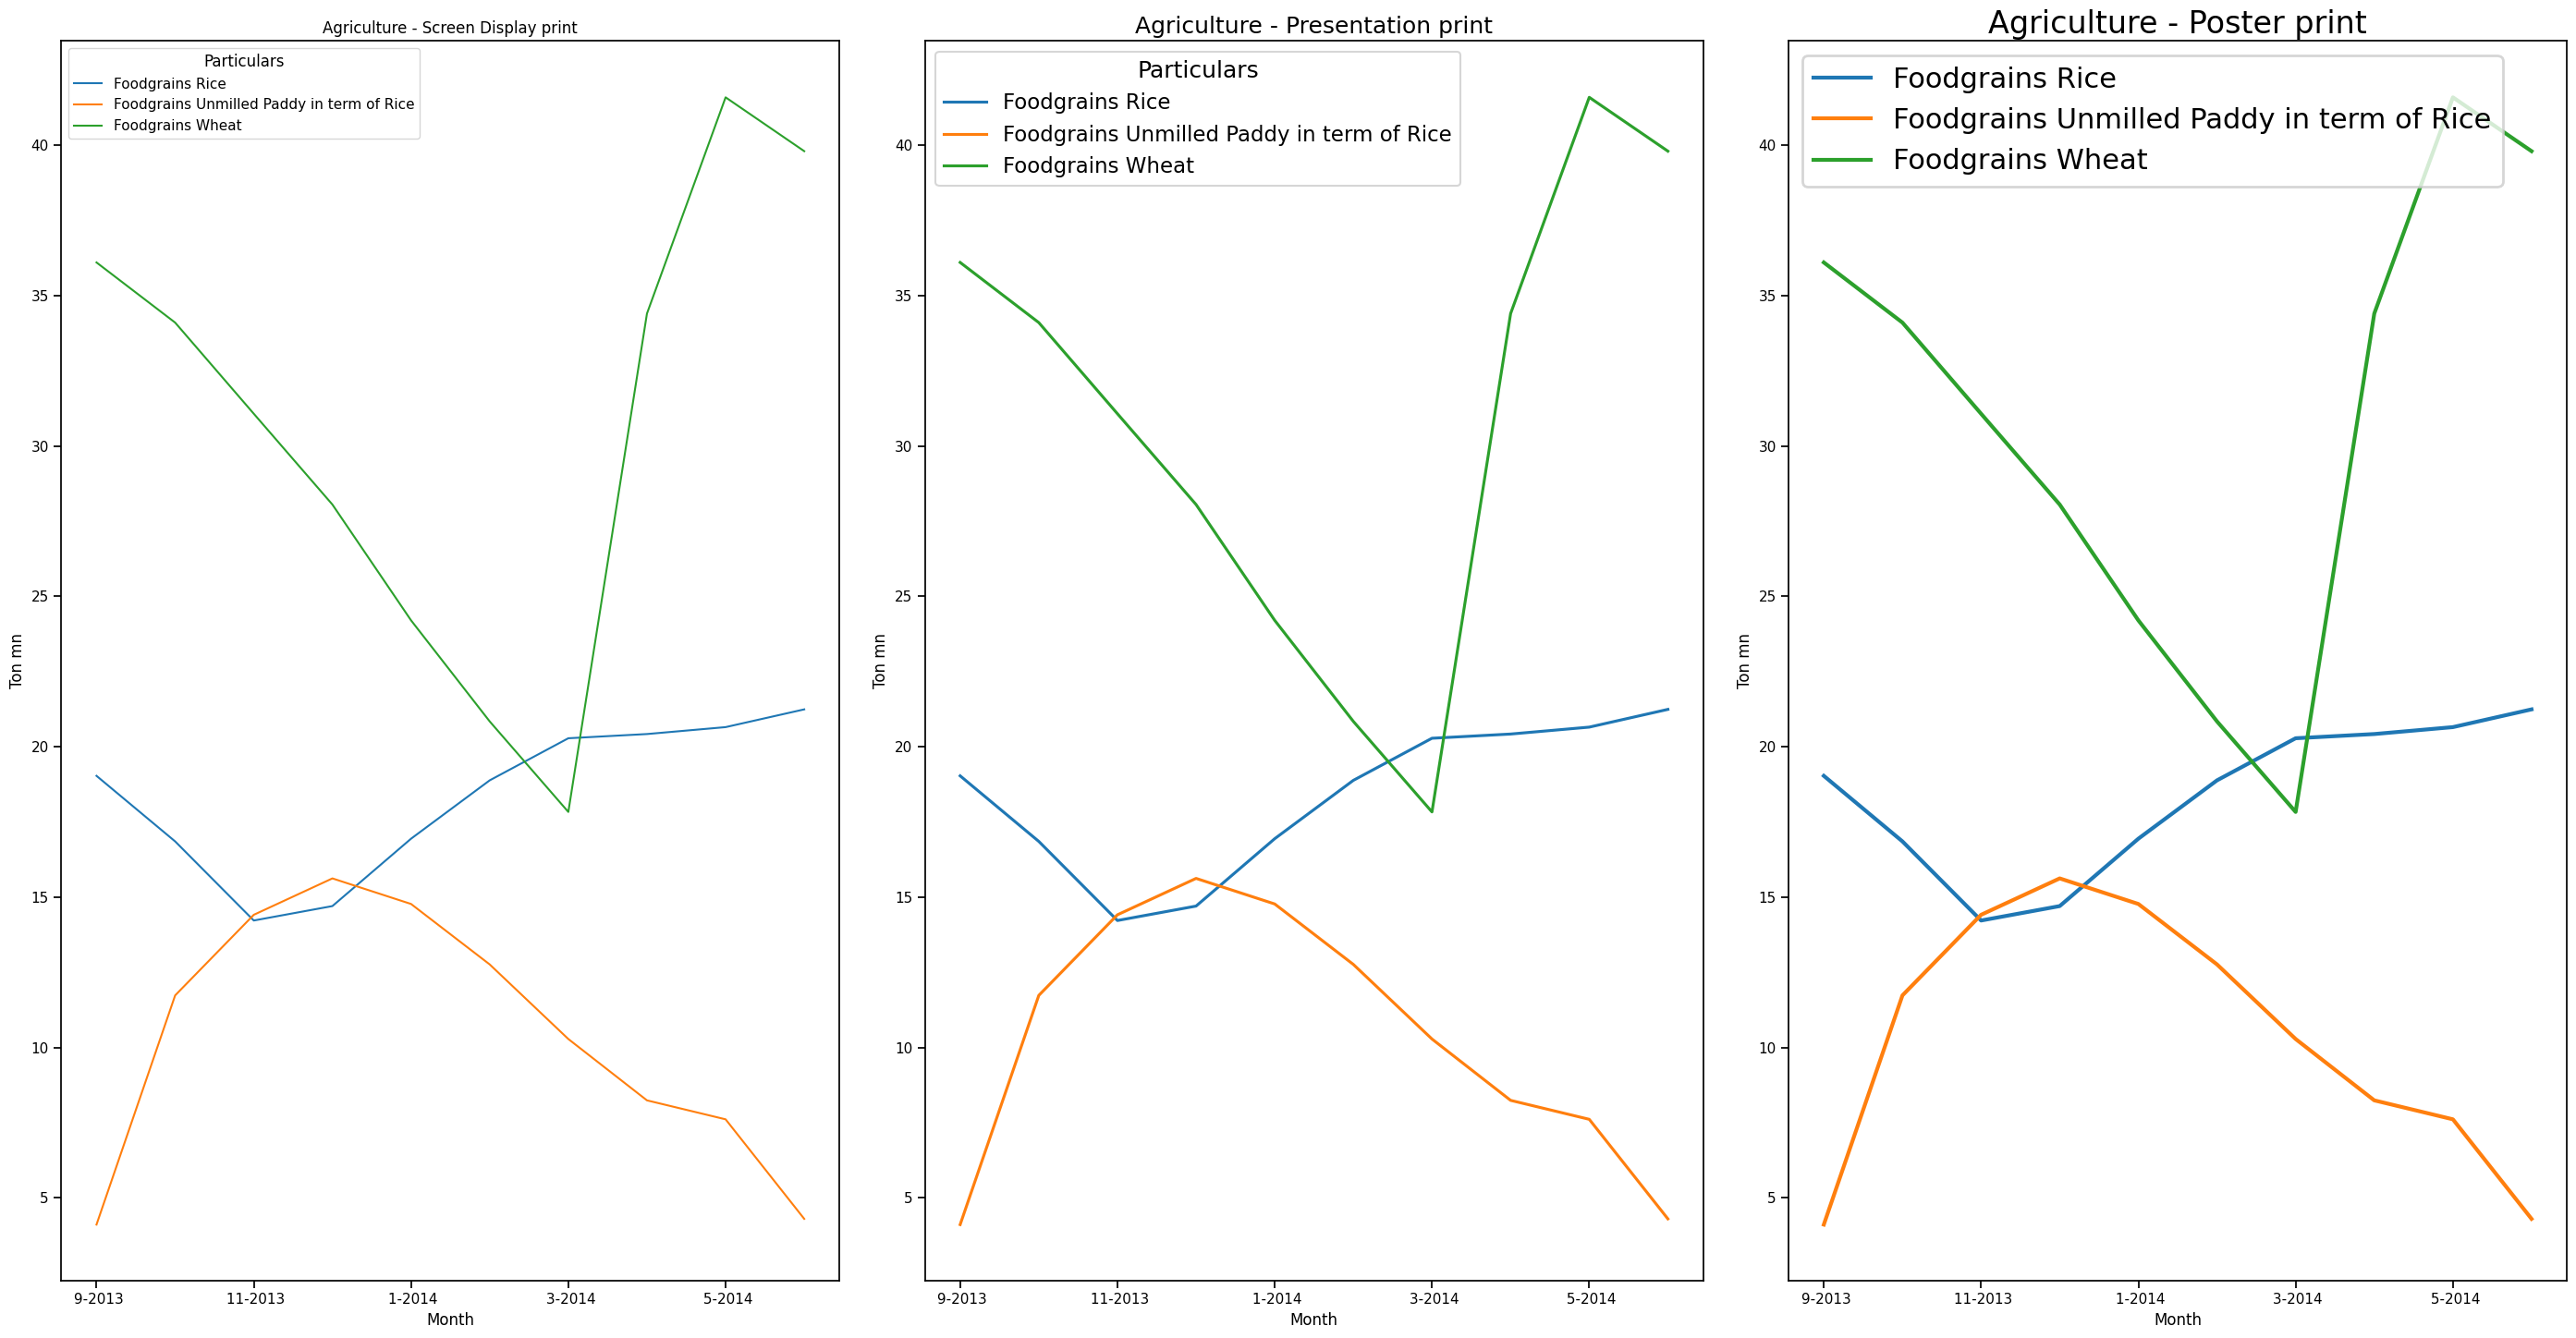

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(30, 15))

# Plot the first graph
agg_data_pivot.plot(kind='line', x='Month', ax=axes[0])
ax.set_xticklabels(agg_data_pivot['Month'])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Ton mn')
axes[0].set_title('Agriculture - Screen Display print')

# Plot the second graph
sns.set_context('talk')
agg_data_pivot.plot(kind='line', x='Month', ax=axes[1])
ax.set_xticklabels(agg_data_pivot['Month'])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Ton mn')
axes[1].set_title('Agriculture - Presentation print')

# Plot the third graph
sns.set_context('poster')
agg_data_pivot.plot(kind='line', x='Month', ax=axes[2])
ax.set_xticklabels(agg_data_pivot['Month'])
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Ton mn')
axes[2].set_title('Agriculture - Poster print')
axes[2].legend(loc='upper left')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.tight_layout()
plt.show()


###continuous colour palette

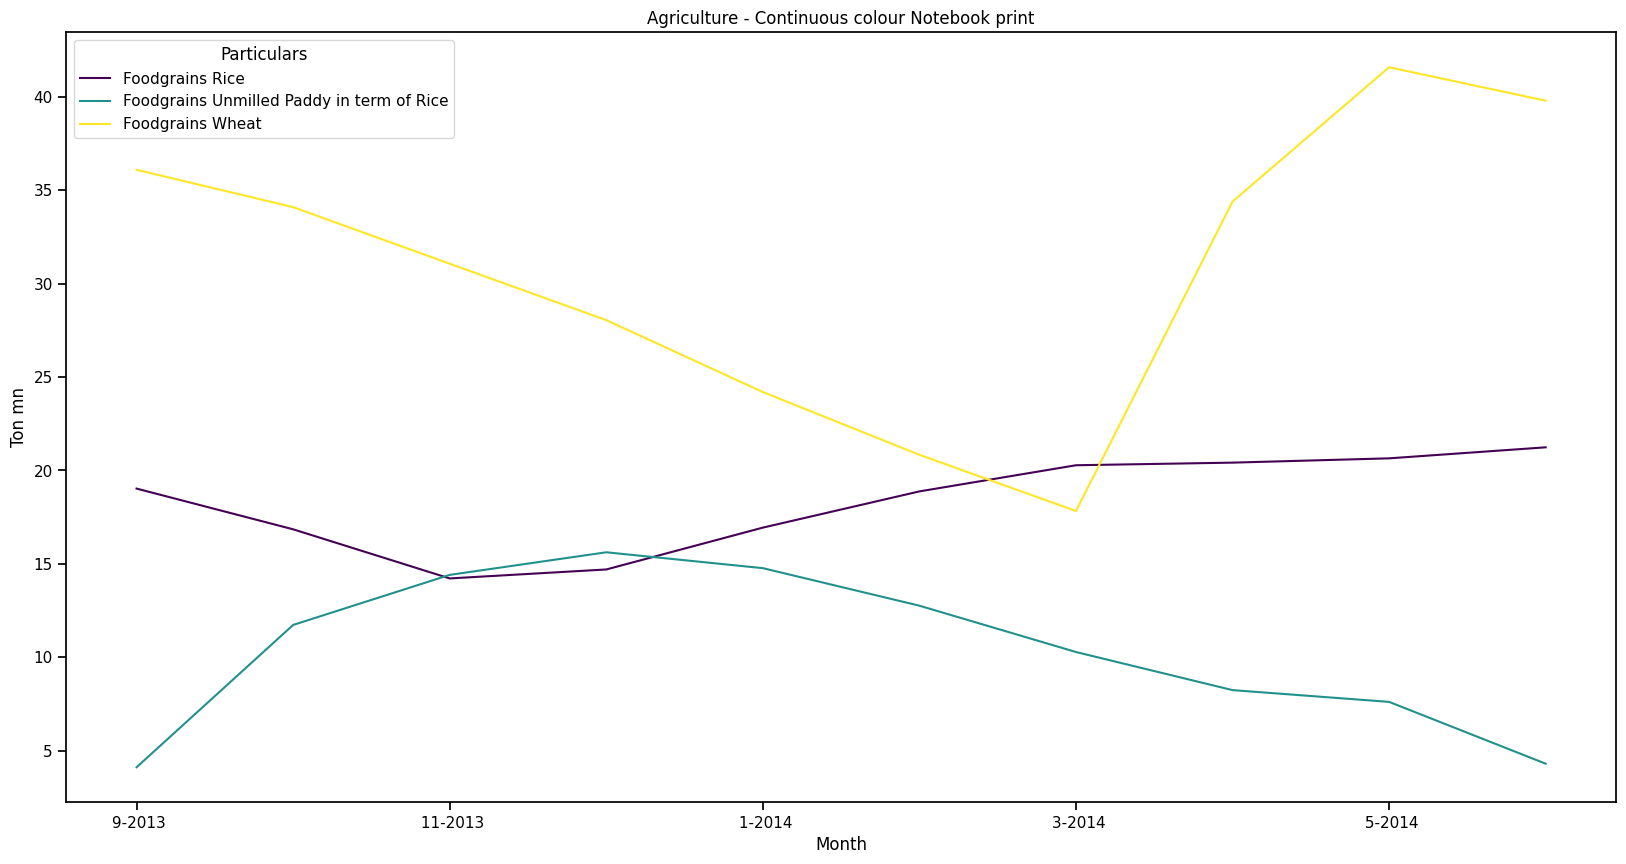

In [ ]:
sns.set_context('notebook')
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10), cmap='viridis')
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - Continuous colour Notebook print')
plt.show()
print()

###one colour sequential 

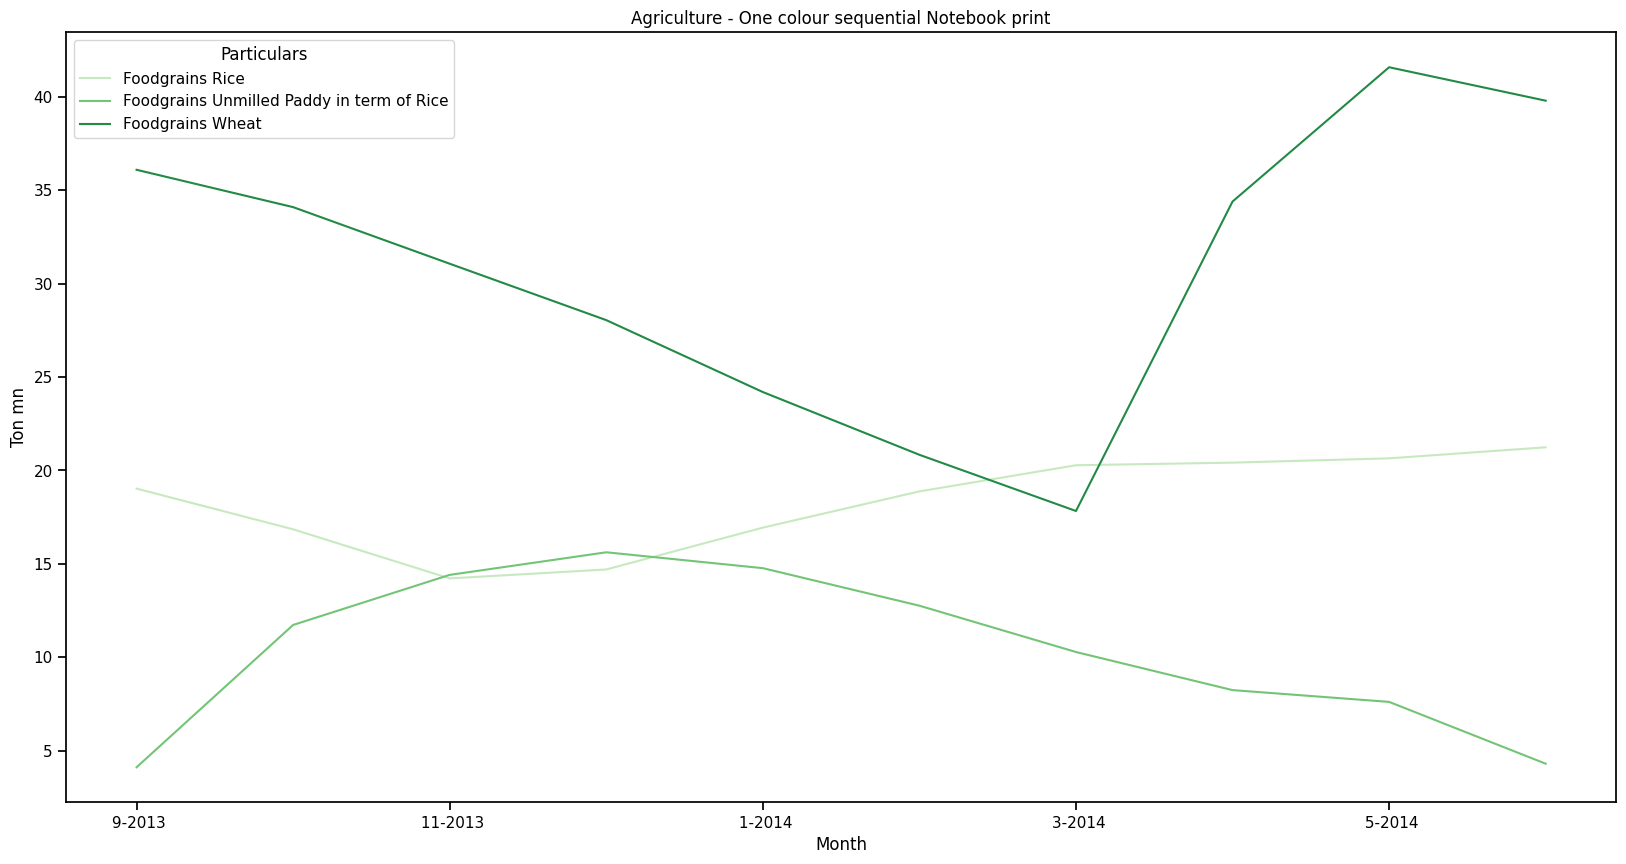

In [ ]:
sns.set_context('notebook')
agg_data_pivot.plot(kind='line', figsize=(20, 10),x='Month', color=sns.color_palette('Greens', n_colors=3))
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - One colour sequential Notebook print')
plt.show()
print()

###bipolar sequential

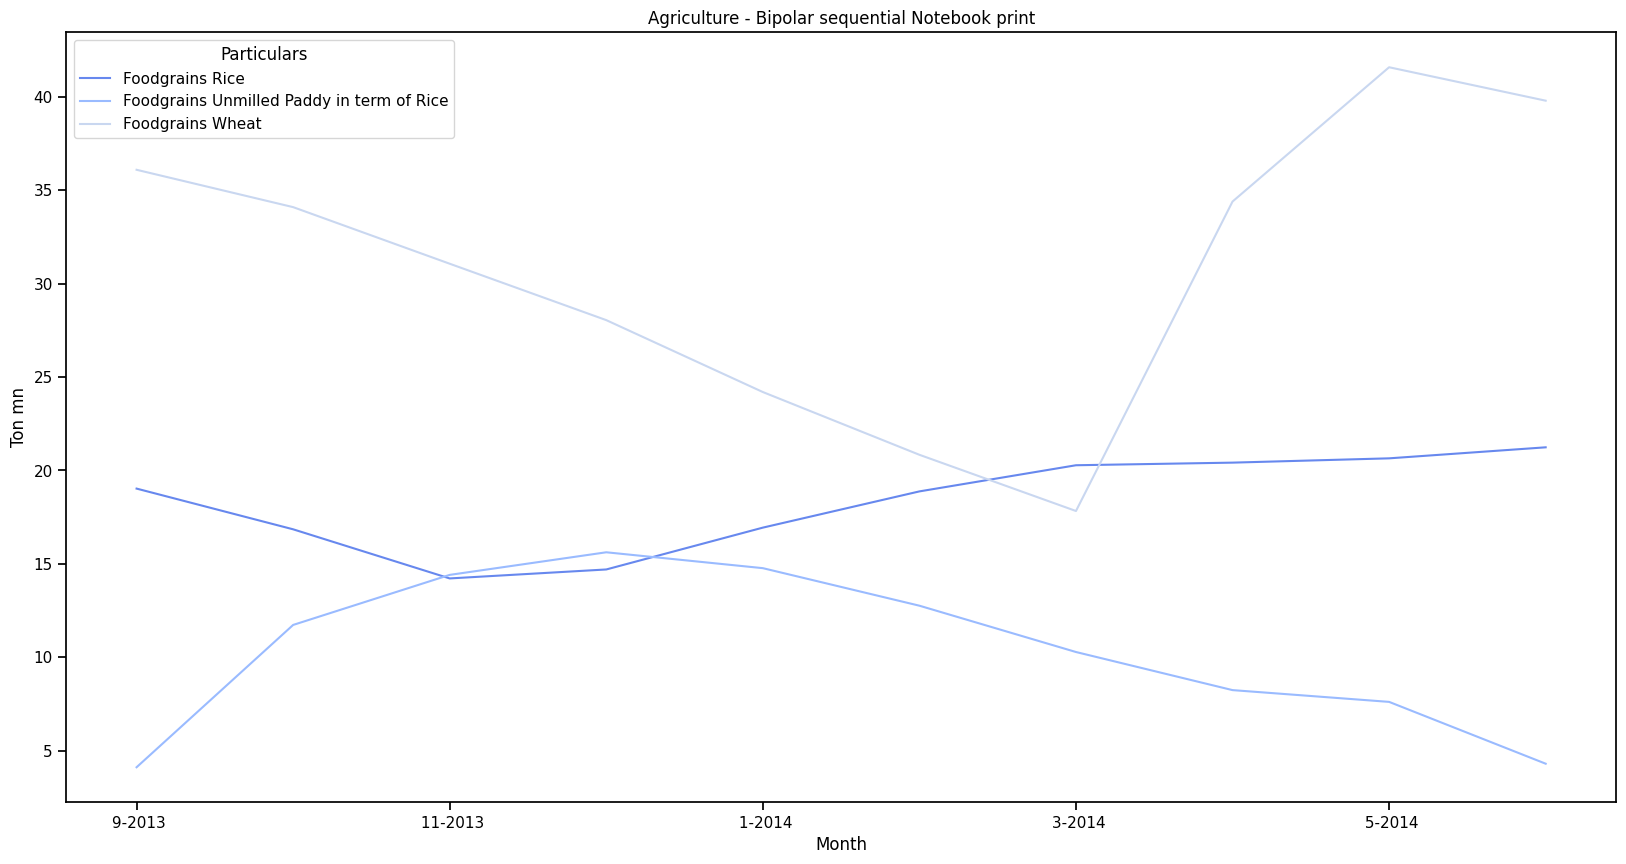

In [ ]:
sns.set_context('notebook')
agg_data_pivot.plot(kind='line', figsize=(20, 10), x='Month', color=sns.color_palette('coolwarm'))
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - Bipolar sequential Notebook print')
plt.show()
print()

###custom colours

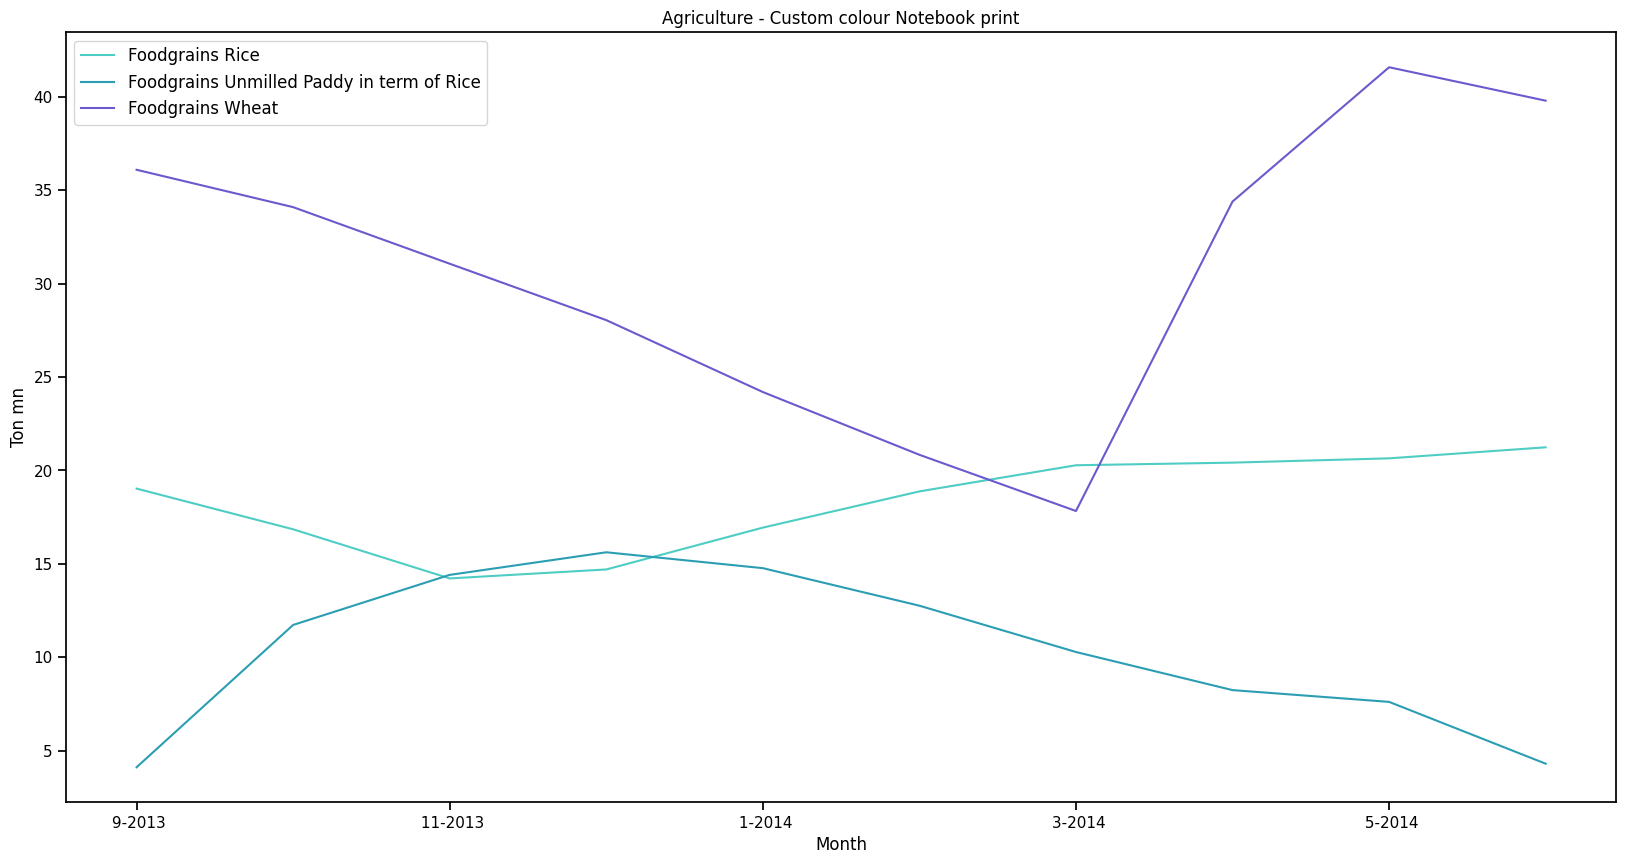

In [ ]:
sns.set_context('notebook')
agg_data_pivot.plot(kind='line',x='Month', figsize=(20, 10), color=['#4ecdc4', '#2b9eb3', '#6a5acd'])
ax.set_xticklabels(agg_data_pivot['Month'])
plt.xlabel('Month')
plt.ylabel('Ton mn')
plt.title('Agriculture - Custom colour Notebook print')
plt.legend(fontsize=12)
plt.show()
print()

###all colours in a subplot

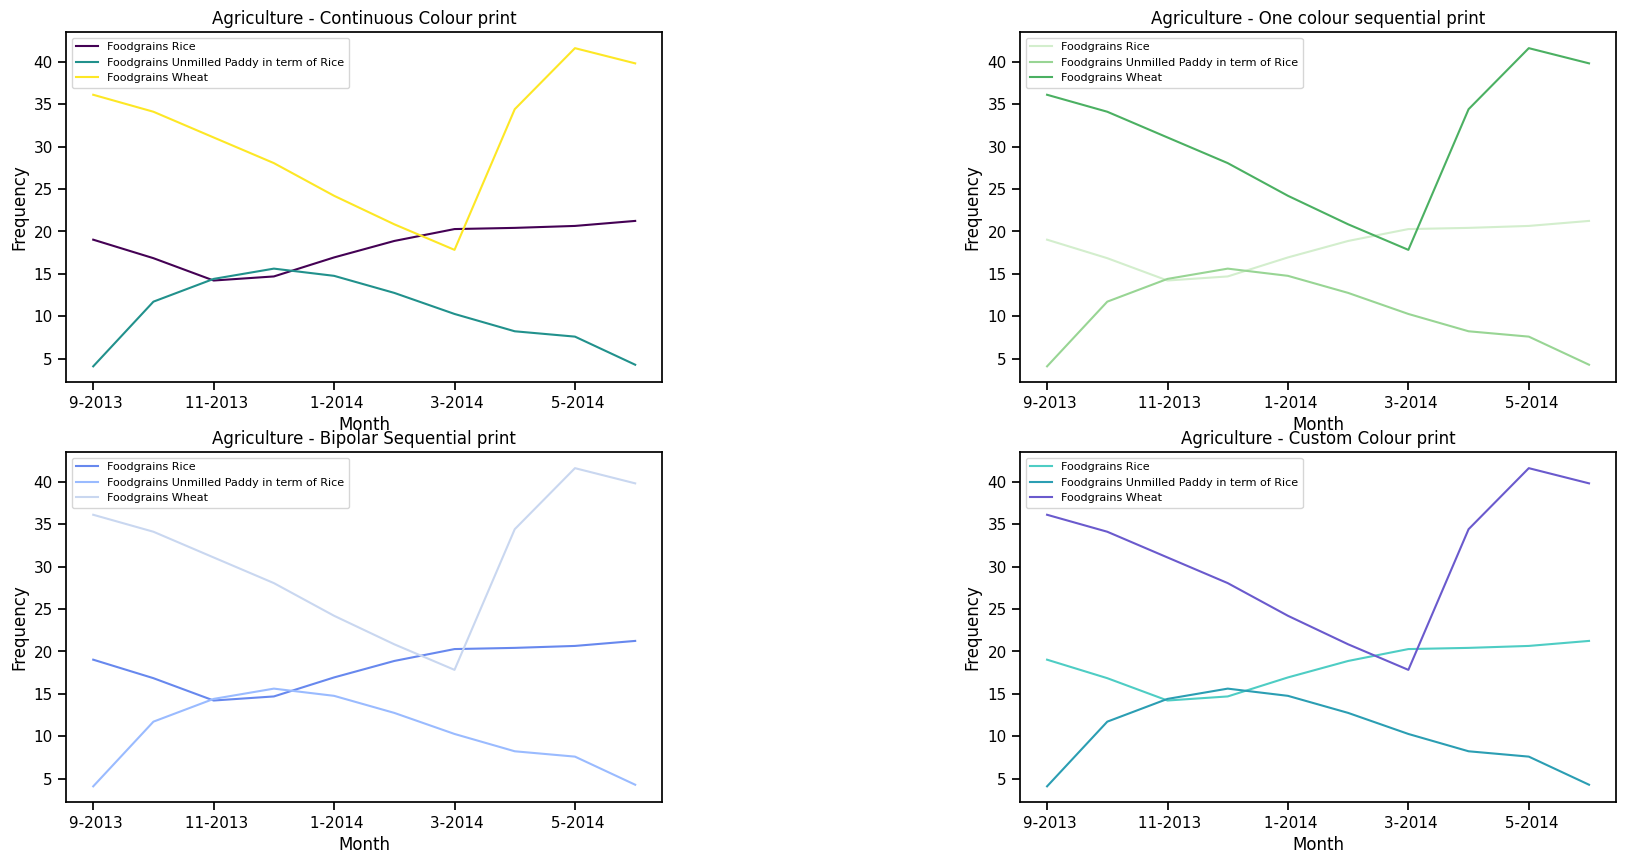

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(50, 50))

# Plot the first graph
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10), cmap='viridis', ax=axes[0][0])
axes[0][0].set_xlabel('Month')
axes[0][0].set_ylabel('Frequency')
axes[0][0].set_title('Agriculture - Continuous Colour print')
axes[0][0].legend(fontsize=8)

# Plot the second graph
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10), color=sns.color_palette('Greens', n_colors=len(agg_data_pivot.columns)), ax=axes[0][1])
axes[0][1].set_xlabel('Month')
axes[0][1].set_ylabel('Frequency')
axes[0][1].set_title('Agriculture - One colour sequential print')
axes[0][1].legend(fontsize=8)

# Plot the third graph
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10), color=sns.color_palette('coolwarm'), ax=axes[1][0])
axes[1][0].set_xlabel('Month')
axes[1][0].set_ylabel('Frequency')
axes[1][0].set_title('Agriculture - Bipolar Sequential print')
axes[1][0].legend(fontsize=8)

# Plot the fourth graph
agg_data_pivot.plot(kind='line', x='Month', figsize=(20, 10), color=['#4ecdc4', '#2b9eb3', '#6a5acd'], ax=axes[1][1])
axes[1][1].set_xlabel('Month')
axes[1][1].set_ylabel('Frequency')
axes[1][1].set_title('Agriculture - Custom Colour print')
axes[1][1].legend(fontsize=8)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.6)

# Show the plots
plt.show()


#Road Transport

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DV LAB/lab4/Road_Transport_BRS_2017-18_Annexure7_9c.csv')

In [ ]:
df

Name of the States  National Highways  State Highways  District Roads  \
0      Andhra Pradesh              10207           15753           58083   
1   Arunachal Pradesh               2537           13500            8731   
2               Assam               3909            2530            6093   
3               Bihar               4877            4006           11145   
4        Chhattisgarh               3592            4176           11965   
5                 Goa                293             280            1191   
6             Gujarat               6050           17201           30809   
7             Haryana               2788            1801           21897   
8    Himachal Pradesh               2607             827            3647   
9     Jammu & Kashmir               2327             310           19695   
10          Jharkhand               2686            1232           10476   
11          Karnataka               7266           19521           49952   
12             Kerala               1781            4342           27470   
13     Madhya Pradesh               8219           11389           45524   
14        Maharashtra              17728           38999          109530   
15            Manipur               1751             715            9467   
16          Meghalaya               1155             781            5023   
17            Mizoram               1423             170            1714   
18           Nagaland               1548             722            6467   
19             Odisha               5430            4138           17877   
20             Punjab               3269            1103            6980   
21          Rajasthan               8916           15085           23670   
22             Sikkim                463             663            1469   
23         Tamil Nadu               6741           11830           46496   
24            Tripura                854            1057             461   
25      Uttar Pradesh               2949            4387            4906   
26        Uttarakhand              11376            6810           56314   
27        West Bengal               3074            3262           10449   
28      A.& N.Islands                332             257             180   
29         Chandigarh                 15               9              83   
30       D.& N.Haveli                 31              30             190   
31        Daman & Diu                 22              22              59   
32              Delhi                 70               0            2462   
33        Lakshadweep                  0               0               0   
34         Puducherry                 64               0             793   
35       INDIA (1) ++             126350          186908          611268   

    Rural Roads  Urban Roads  Project Roads  Total road Length  \
0        217892        34878           9447             346260   
1         20807           56           4924              50555   
2        303672         5603          21803             343609   
3        258800         9184           2559             290571   
4         54308        12765          15772             102578   
5         15618          902            323              18607   
6         86030        30305          31347             201742   
7          7027        14914           1594              50021   
8         43490         3536           7792              61899   
9         65848         1939          18557             108677   
10        43564         6998          14106              79062   
11       215928        41403          20435             354505   
12       181335        33174           8983             257085   
13       232331        30691          35818             363972   
14       414728        23543          21993             626521   
15        15817          132           1298              29180   
16        36348           69            460              43836   
17

##data manipulation for total number of colleges

In [ ]:
# Aggregate the data by state and type of system
agg_data_pivot = df.iloc[:, :4]
agg_data_pivot

Name of the States  National Highways  State Highways  District Roads
0      Andhra Pradesh              10207           15753           58083
1   Arunachal Pradesh               2537           13500            8731
2               Assam               3909            2530            6093
3               Bihar               4877            4006           11145
4        Chhattisgarh               3592            4176           11965
5                 Goa                293             280            1191
6             Gujarat               6050           17201           30809
7             Haryana               2788            1801           21897
8    Himachal Pradesh               2607             827            3647
9     Jammu & Kashmir               2327             310           19695
10          Jharkhand               2686            1232           10476
11          Karnataka               7266           19521           49952
12             Kerala               1781            4342           27470
13     Madhya Pradesh               8219           11389           45524
14        Maharashtra              17728           38999          109530
15            Manipur               1751             715            9467
16          Meghalaya               1155             781            5023
17            Mizoram               1423             170            1714
18           Nagaland               1548             722            6467
19             Odisha               5430            4138           17877
20             Punjab               3269            1103            6980
21          Rajasthan               8916           15085           23670
22             Sikkim                463             663            1469
23         Tamil Nadu               6741           11830           46496
24            Tripura                854            1057             461
25      Uttar Pradesh               2949            4387            4906
26        Uttarakhand              11376            6810           56314
27        West Bengal               3074            3262           10449
28      A.& N.Islands                332             257             180
29         Chandigarh                 15               9              83
30       D.& N.Haveli                 31              30             190
31        Daman & Diu                 22              22              59
32              Delhi                 70               0            2462
33        Lakshadweep                  0               0               0
34         Puducherry                 64               0             793
35       INDIA (1) ++             126350          186908          611268

In [ ]:
agg_data_pivot.drop(index = 35, inplace = True)

In [ ]:
agg_data_pivot.set_index('Name of the States', inplace=True)

##plots


###horizontal bar

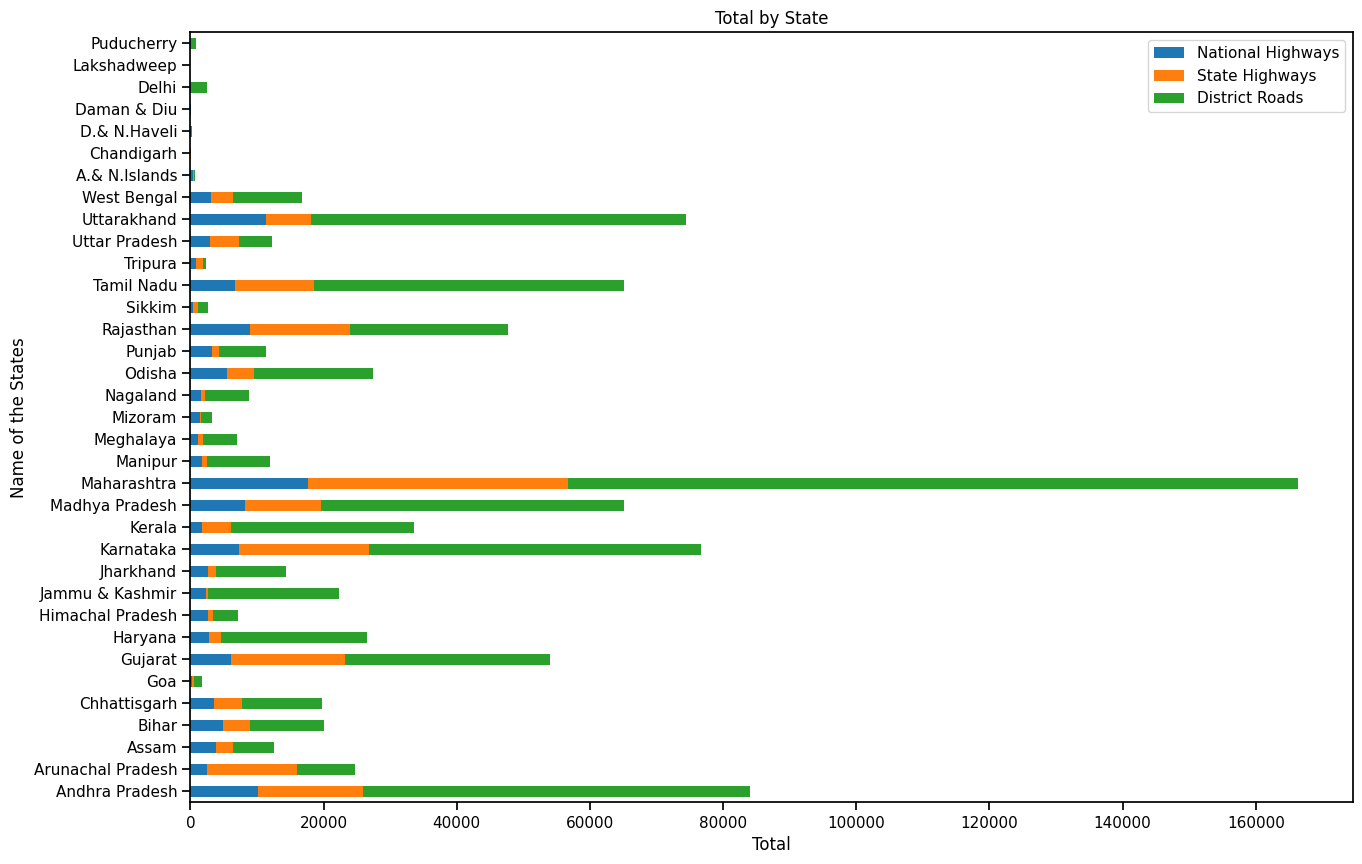

In [ ]:
# Plot a stacked horizontal bar chart
ax = agg_data_pivot.plot(kind='barh', stacked=True, figsize=(15,10))

# Set the x-label
ax.set_xlabel('Total')

# Set the title of the chart
ax.set_title('Total by State')

# Show the chart
plt.show()

###screen display print

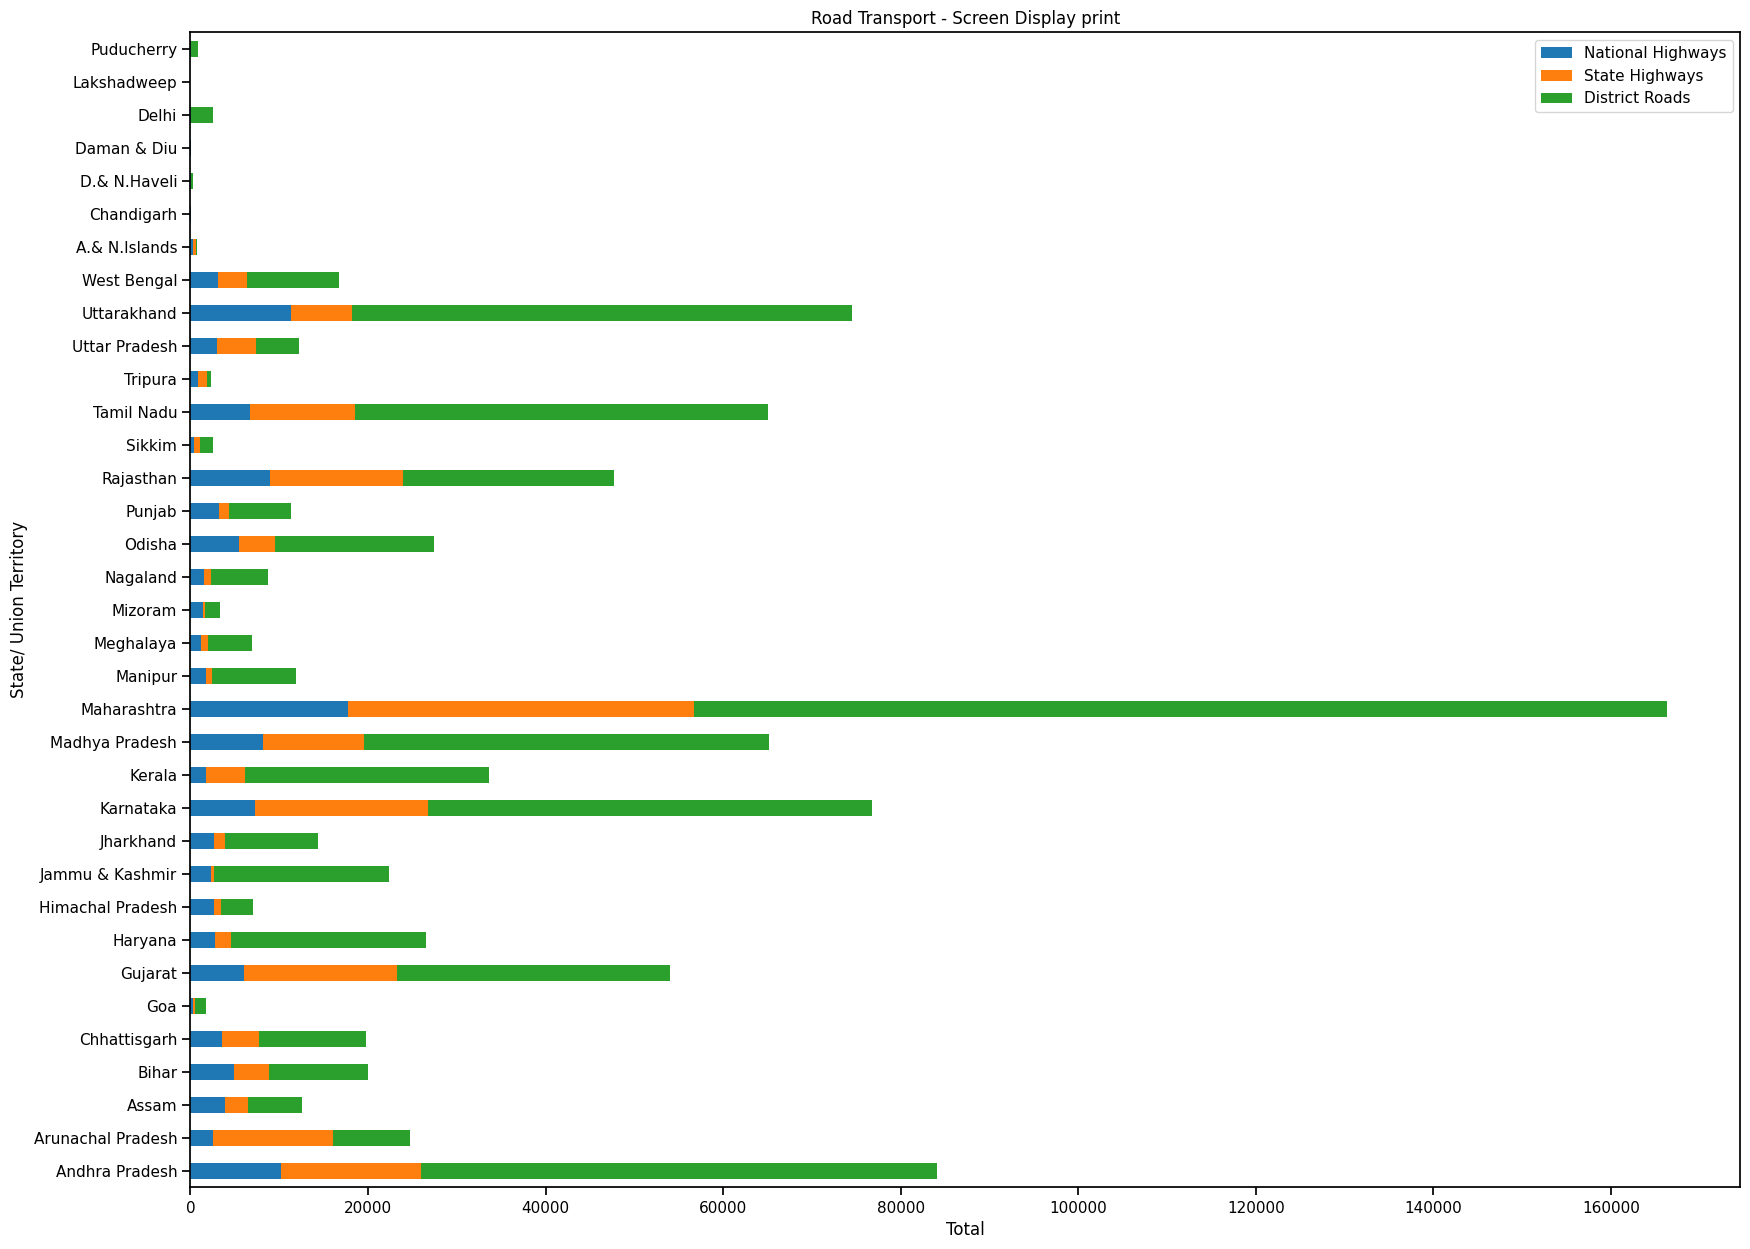

In [ ]:
sns.set_context('notebook')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15))
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - Screen Display print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###presentation print

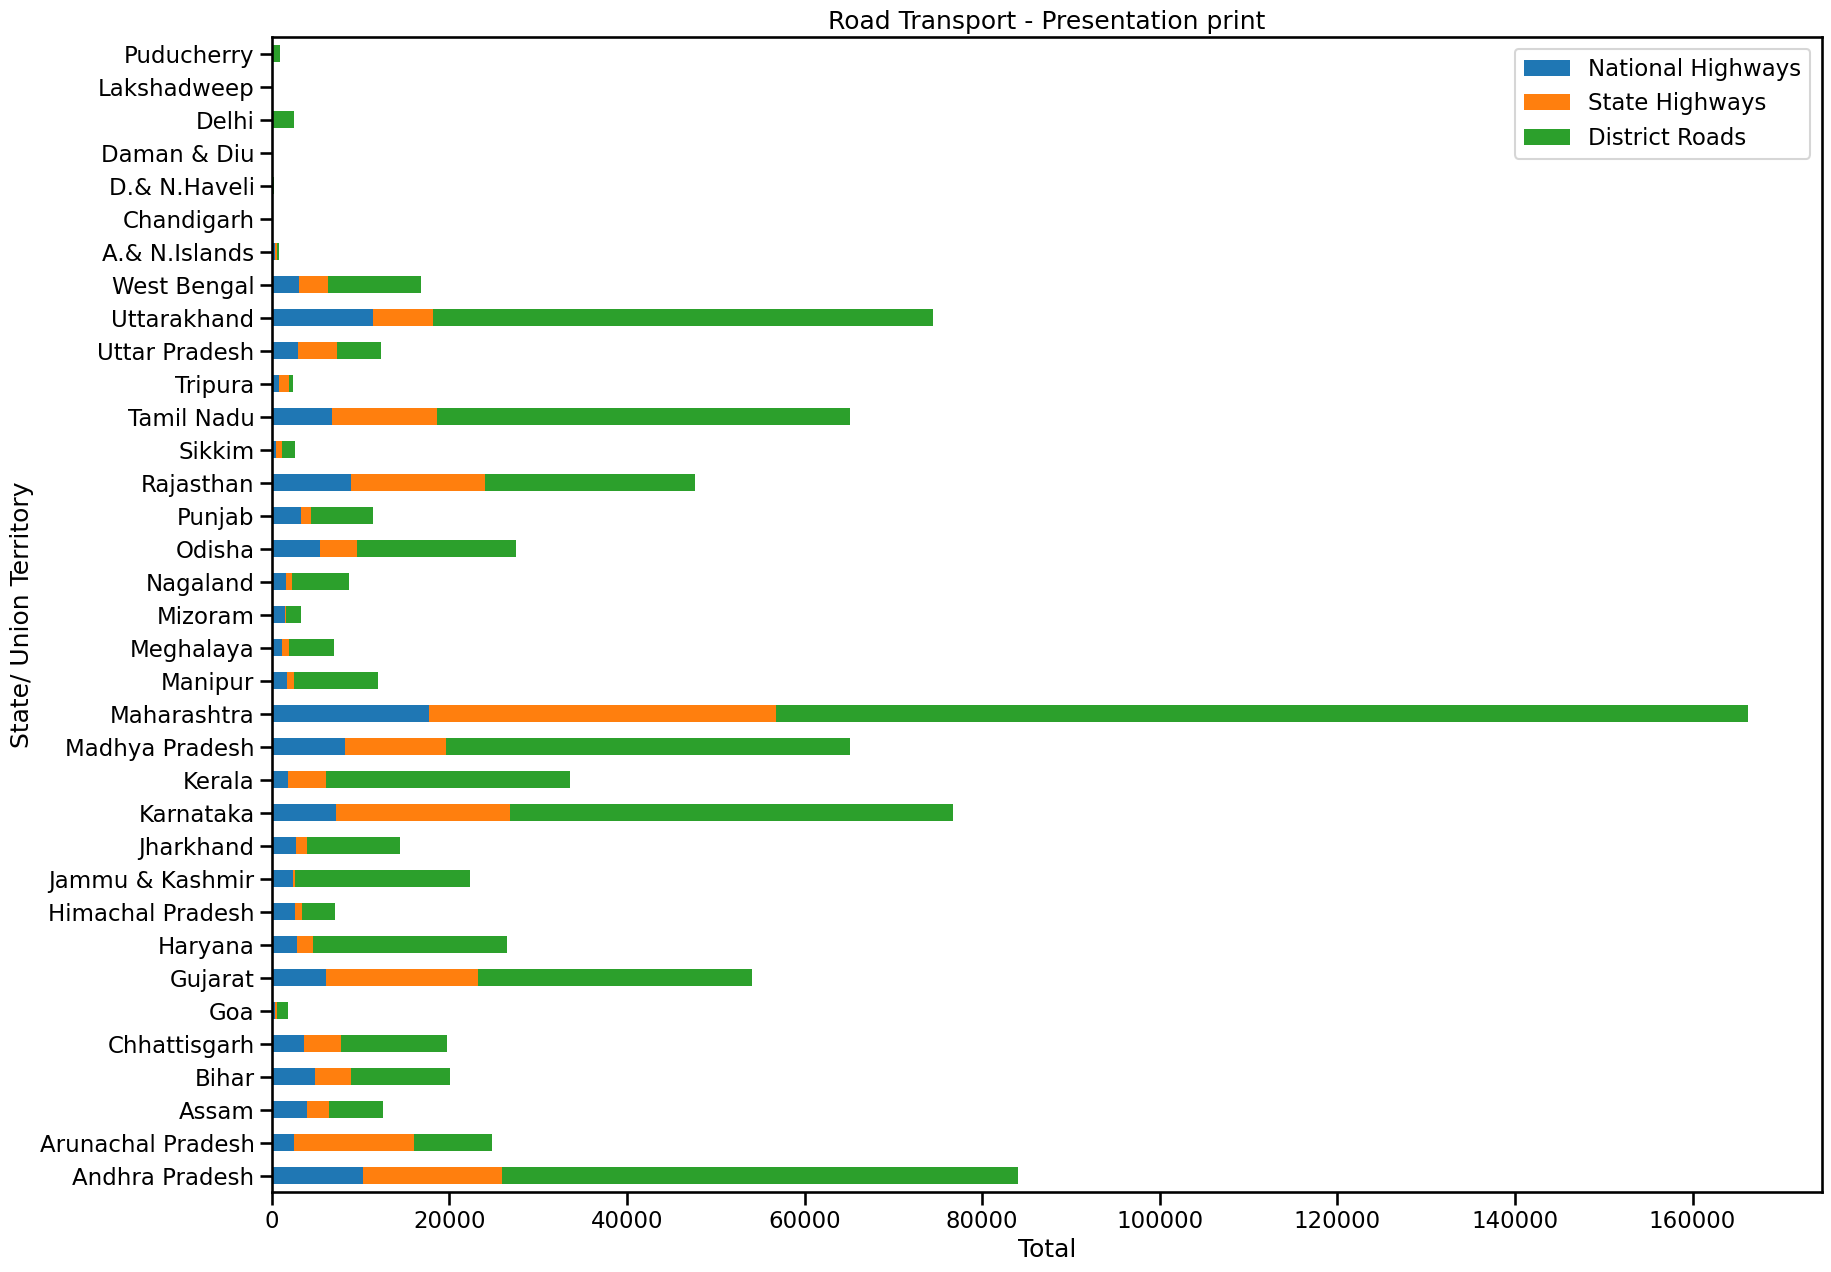

In [ ]:
sns.set_context('talk')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15))
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - Presentation print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###poster print

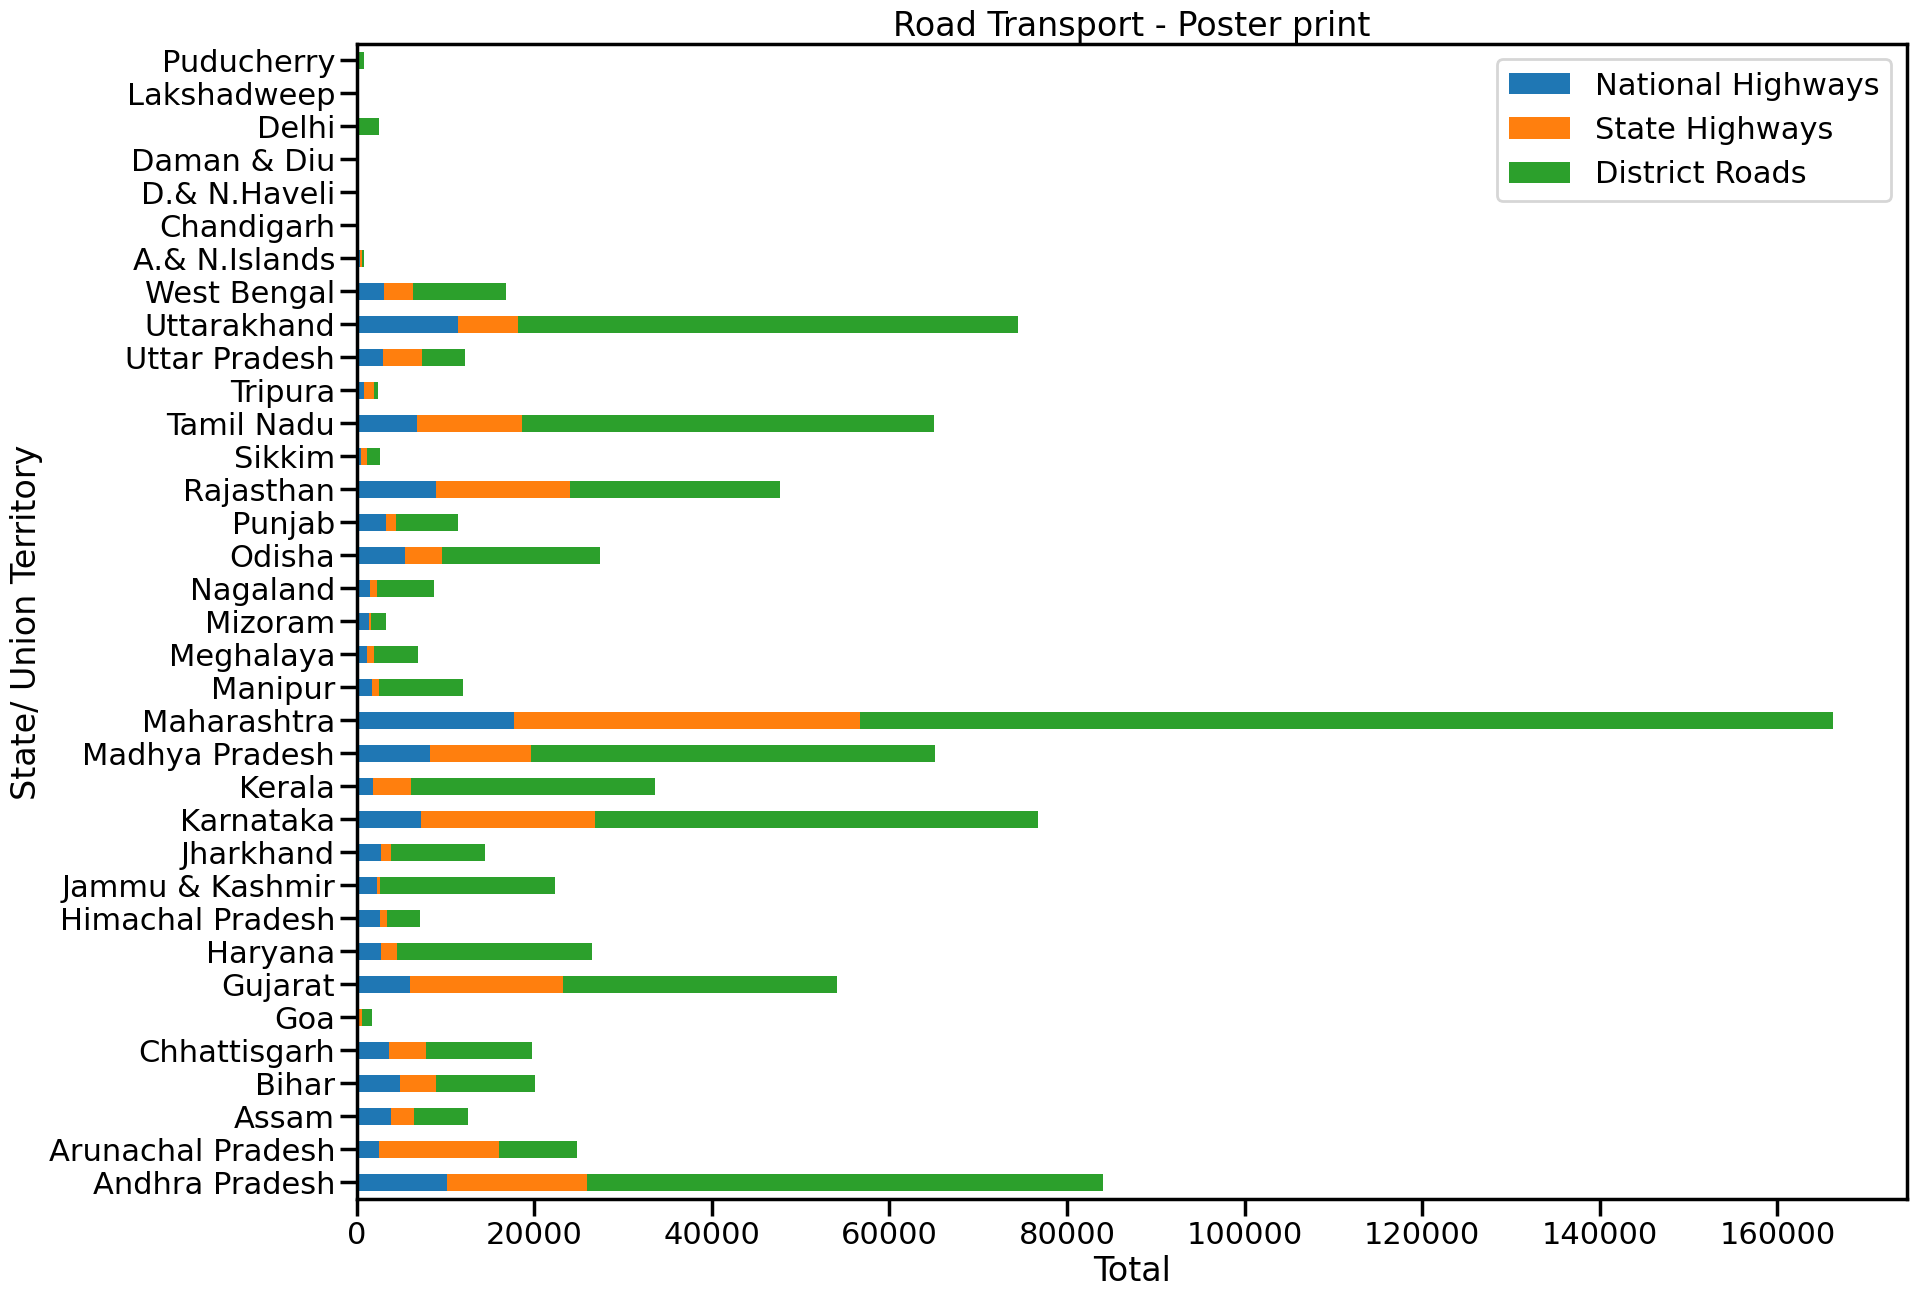

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15))
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###3 prints side by side

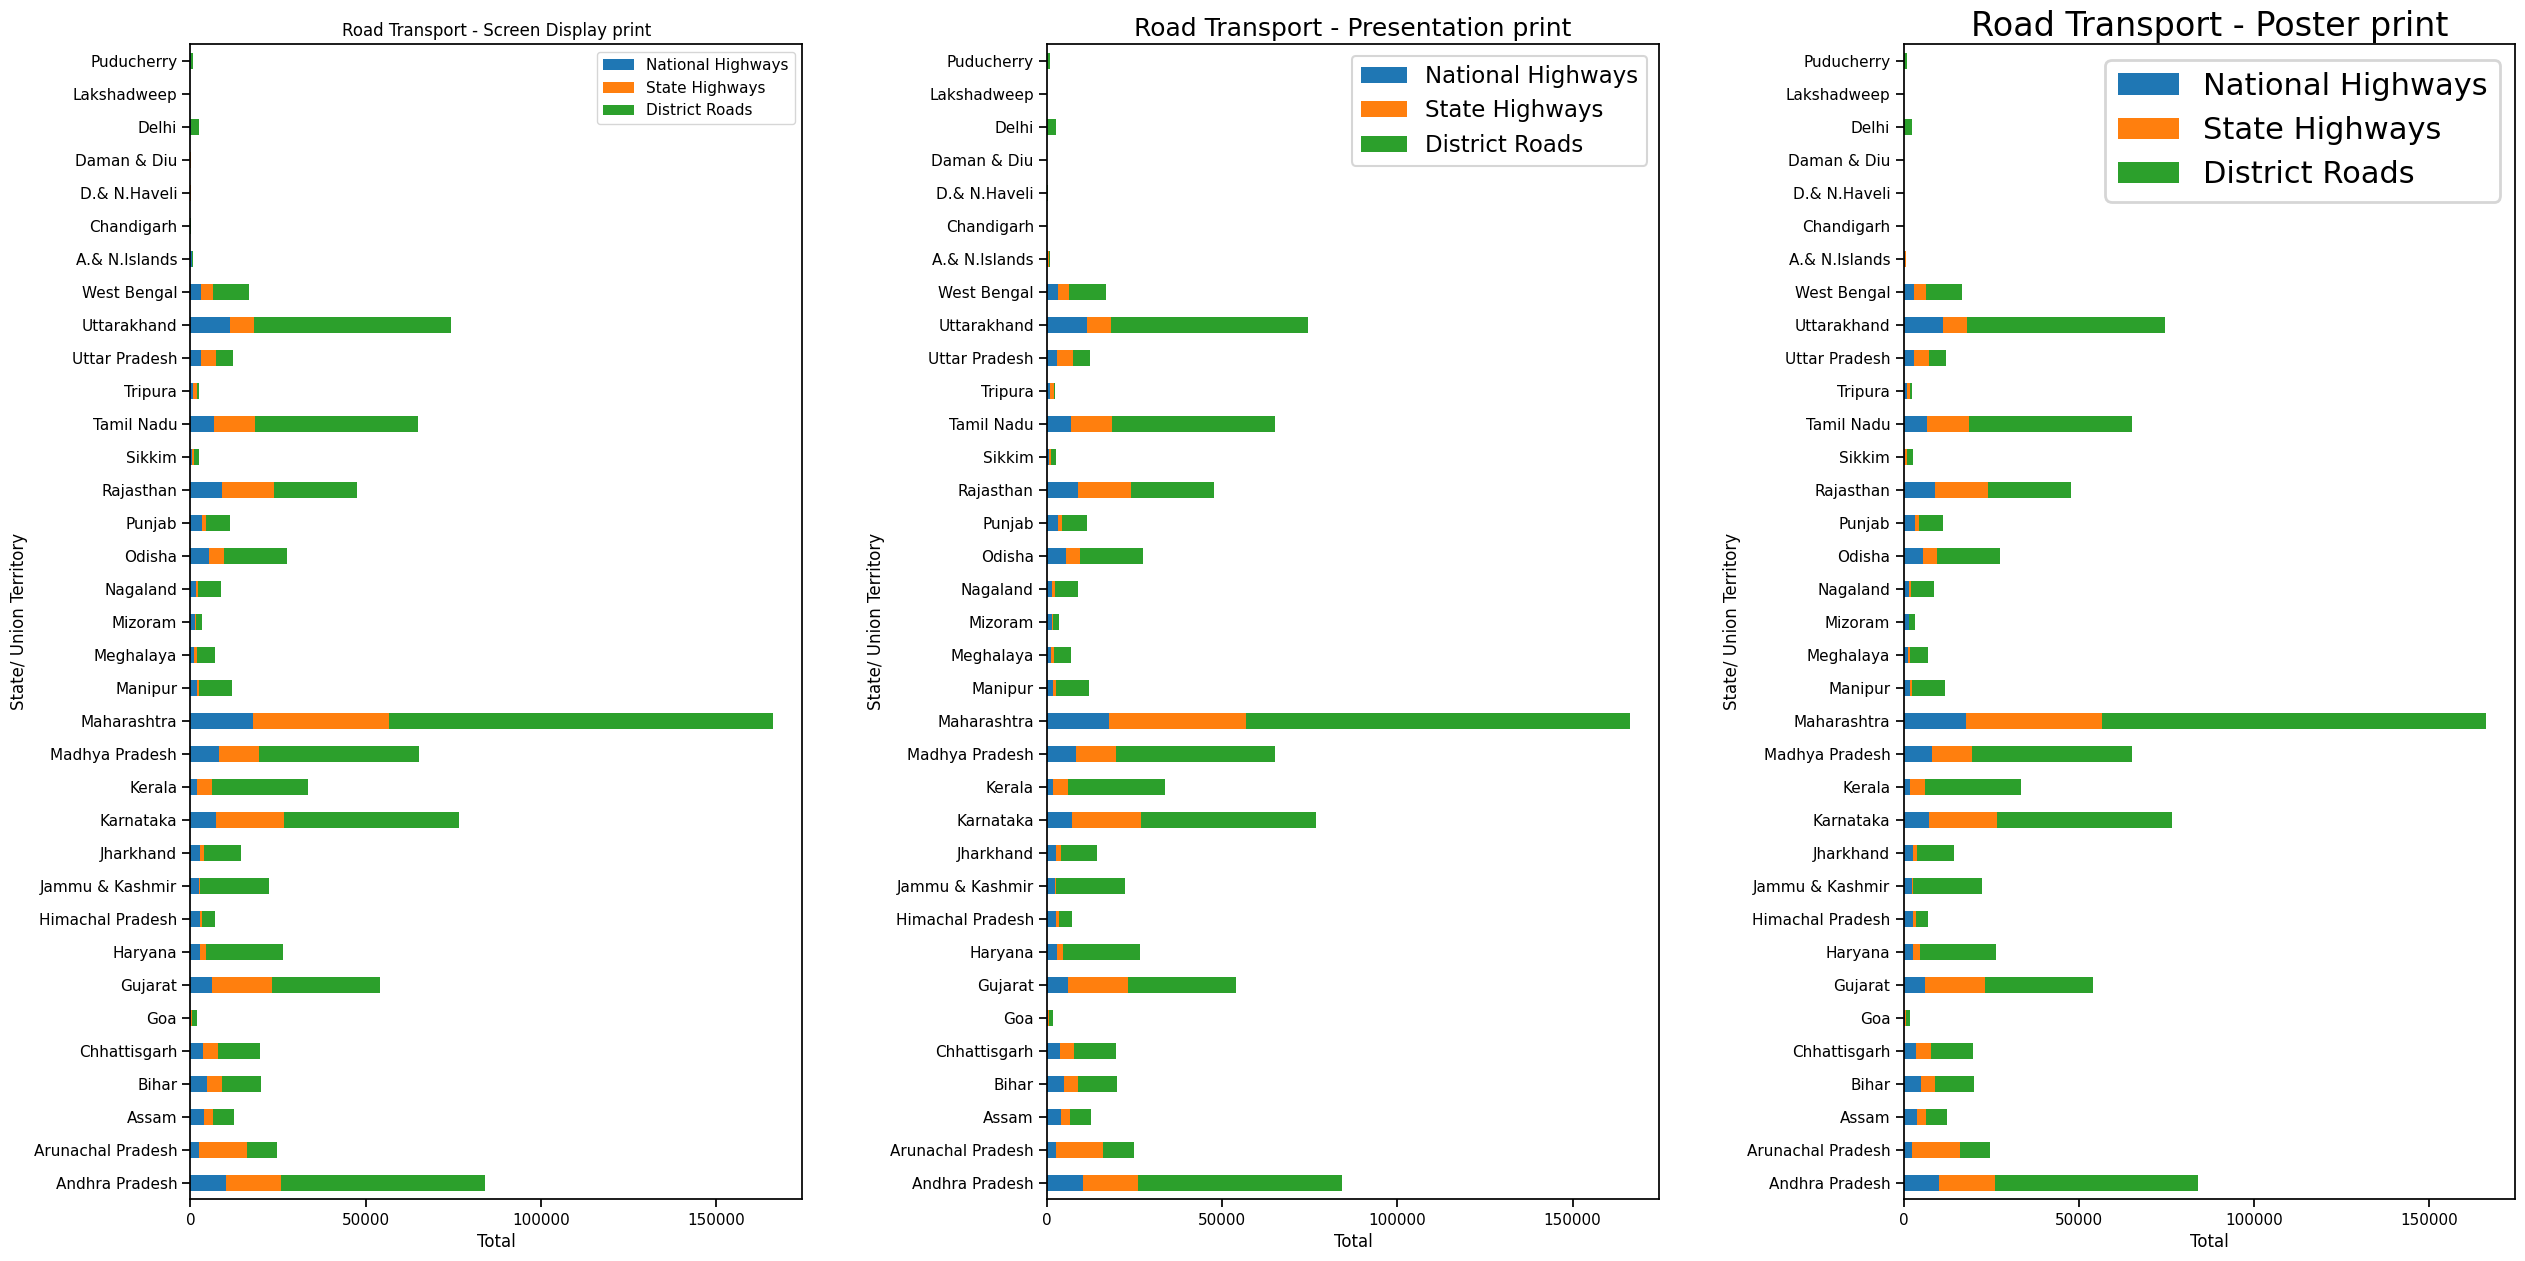

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(30, 15))

# Plot the first graph
agg_data_pivot.plot(kind='barh', stacked=True, ax=axes[0])
axes[0].set_xlabel('Total')
axes[0].set_ylabel('State/ Union Territory')
axes[0].set_title('Road Transport - Screen Display print')

# Plot the second graph
sns.set_context('talk')
agg_data_pivot.plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_xlabel('Total')
axes[1].set_ylabel('State/ Union Territory')
axes[1].set_title('Road Transport - Presentation print')

# Plot the third graph
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, ax=axes[2])
axes[2].set_xlabel('Total')
axes[2].set_ylabel('State/ Union Territory')
axes[2].set_title('Road Transport - Poster print')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()


###continuous colour palette

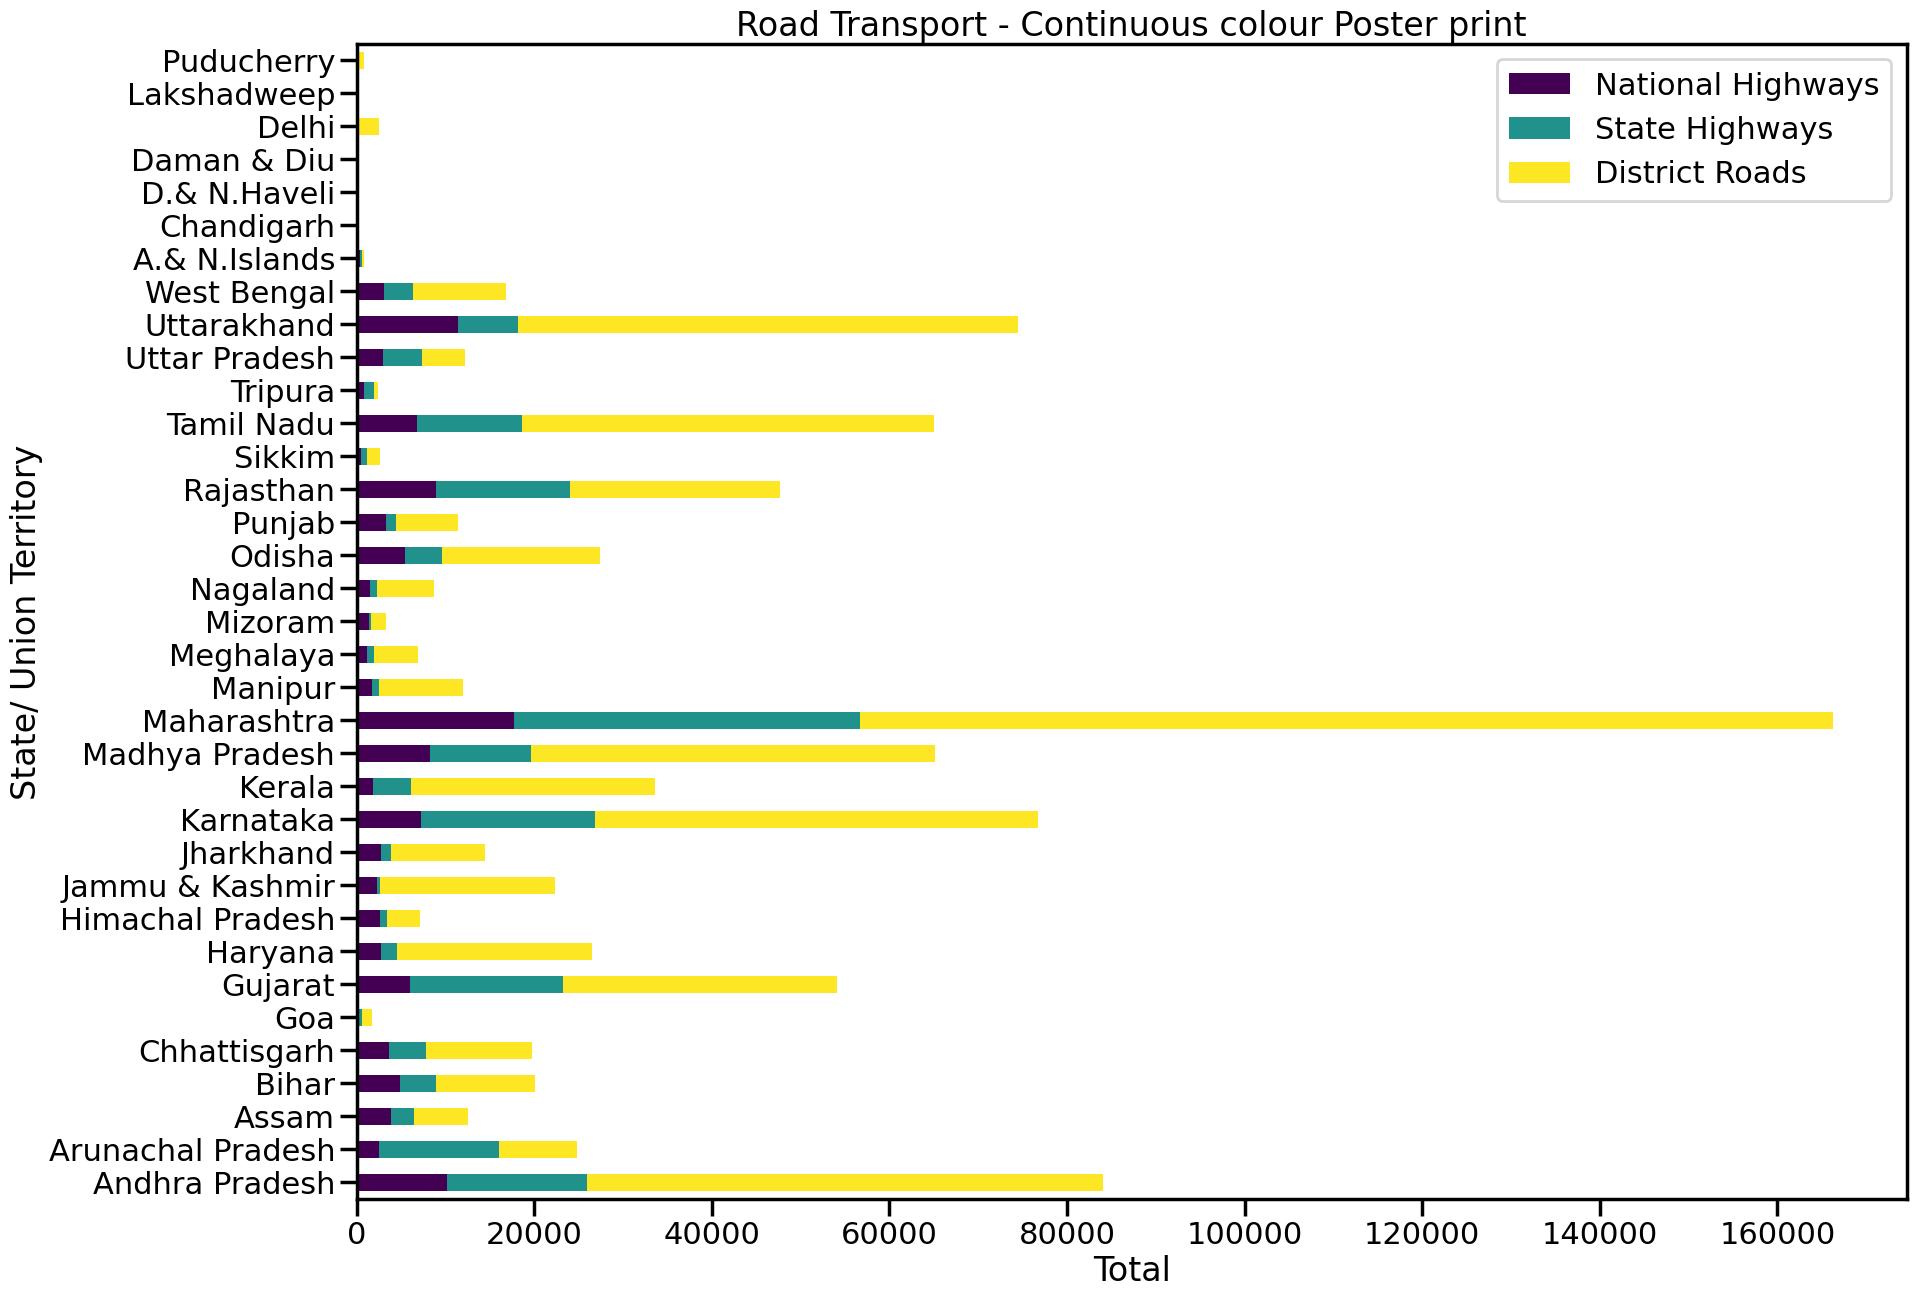

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), cmap='viridis')
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - Continuous colour Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###one colour sequential 

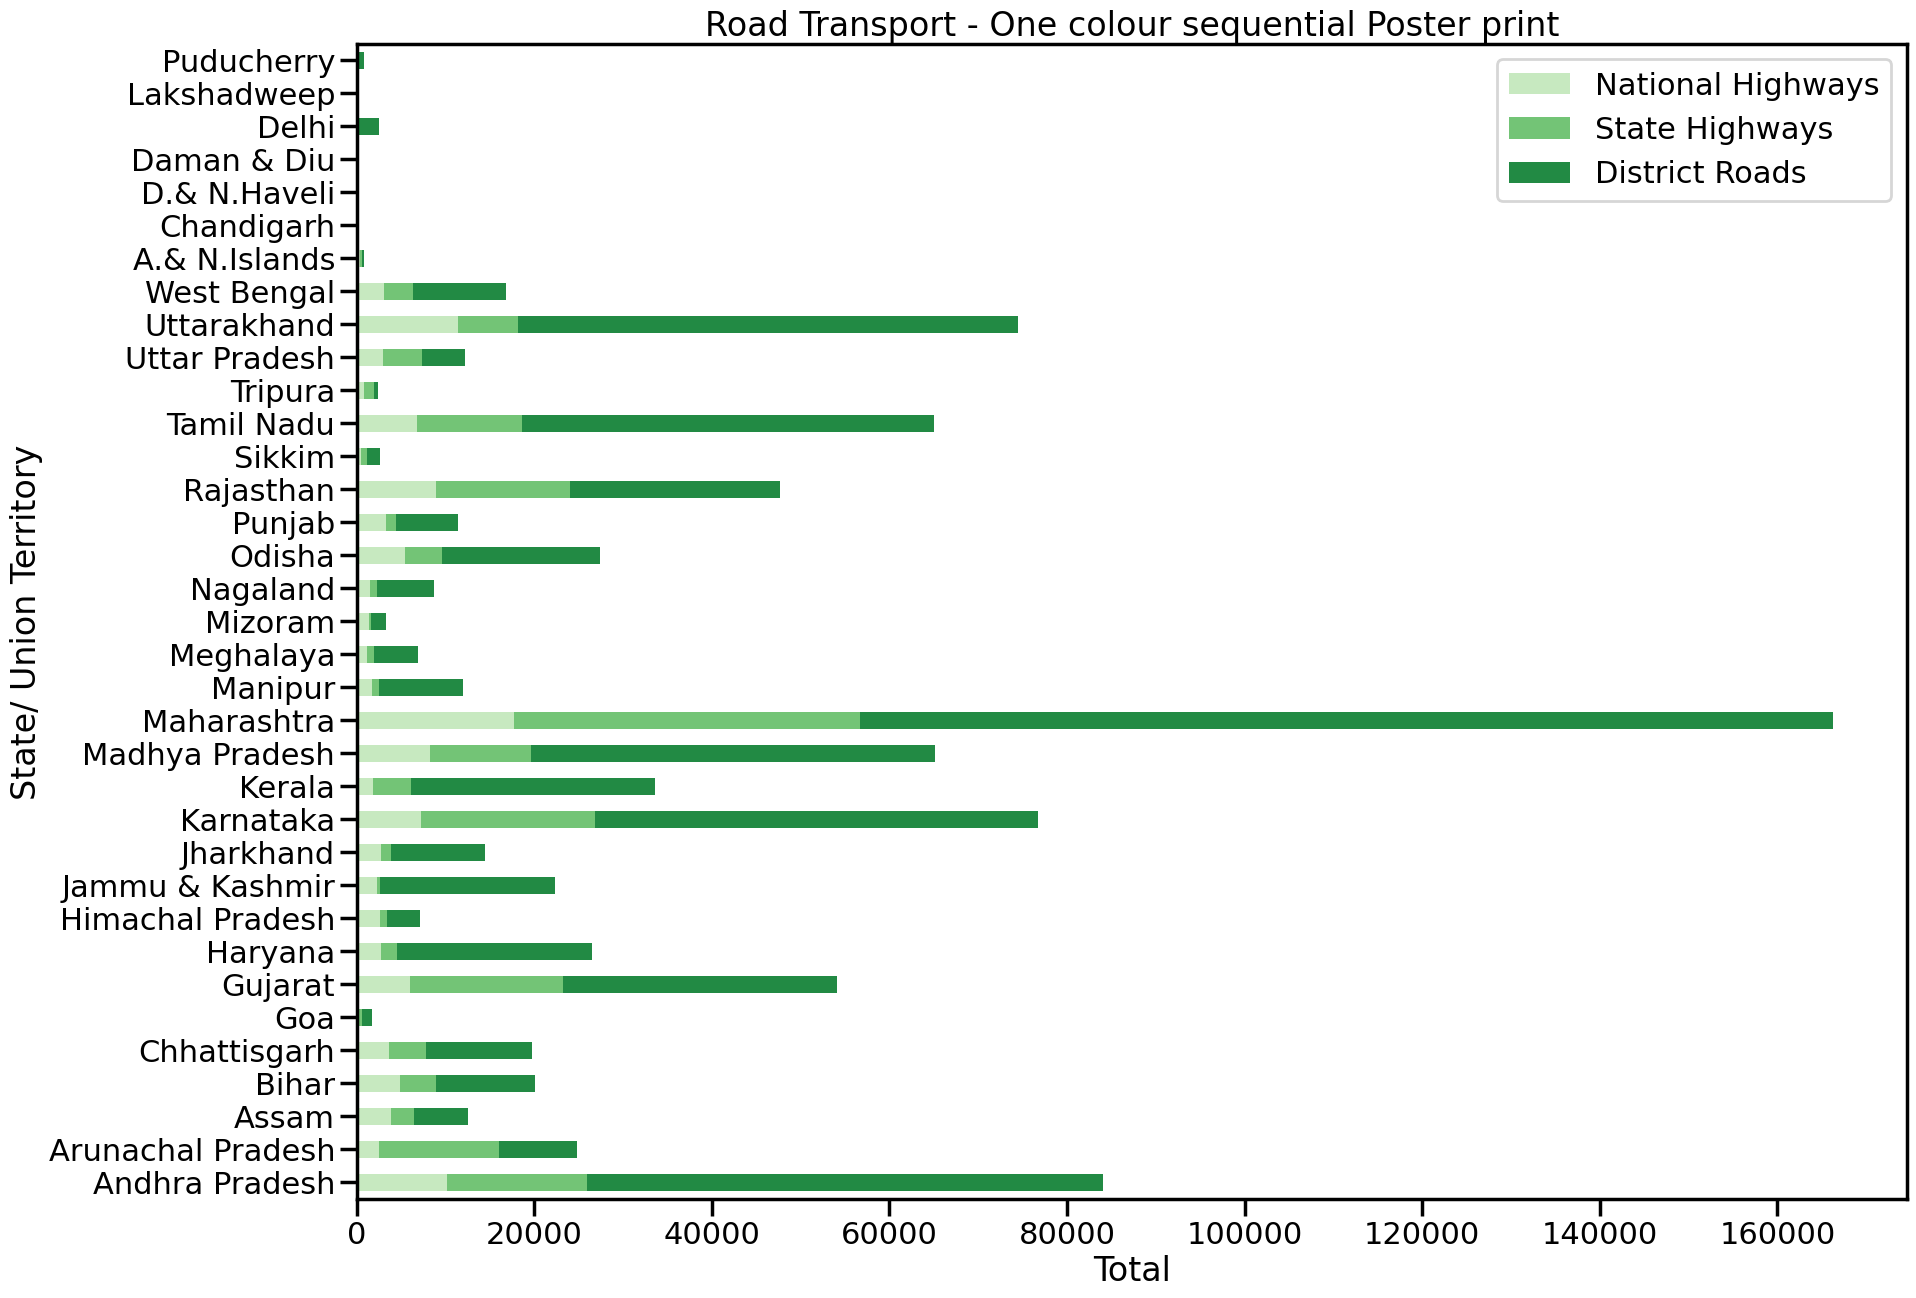

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), color=sns.color_palette('Greens', n_colors=len(agg_data_pivot.columns)))
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - One colour sequential Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###bipolar sequential

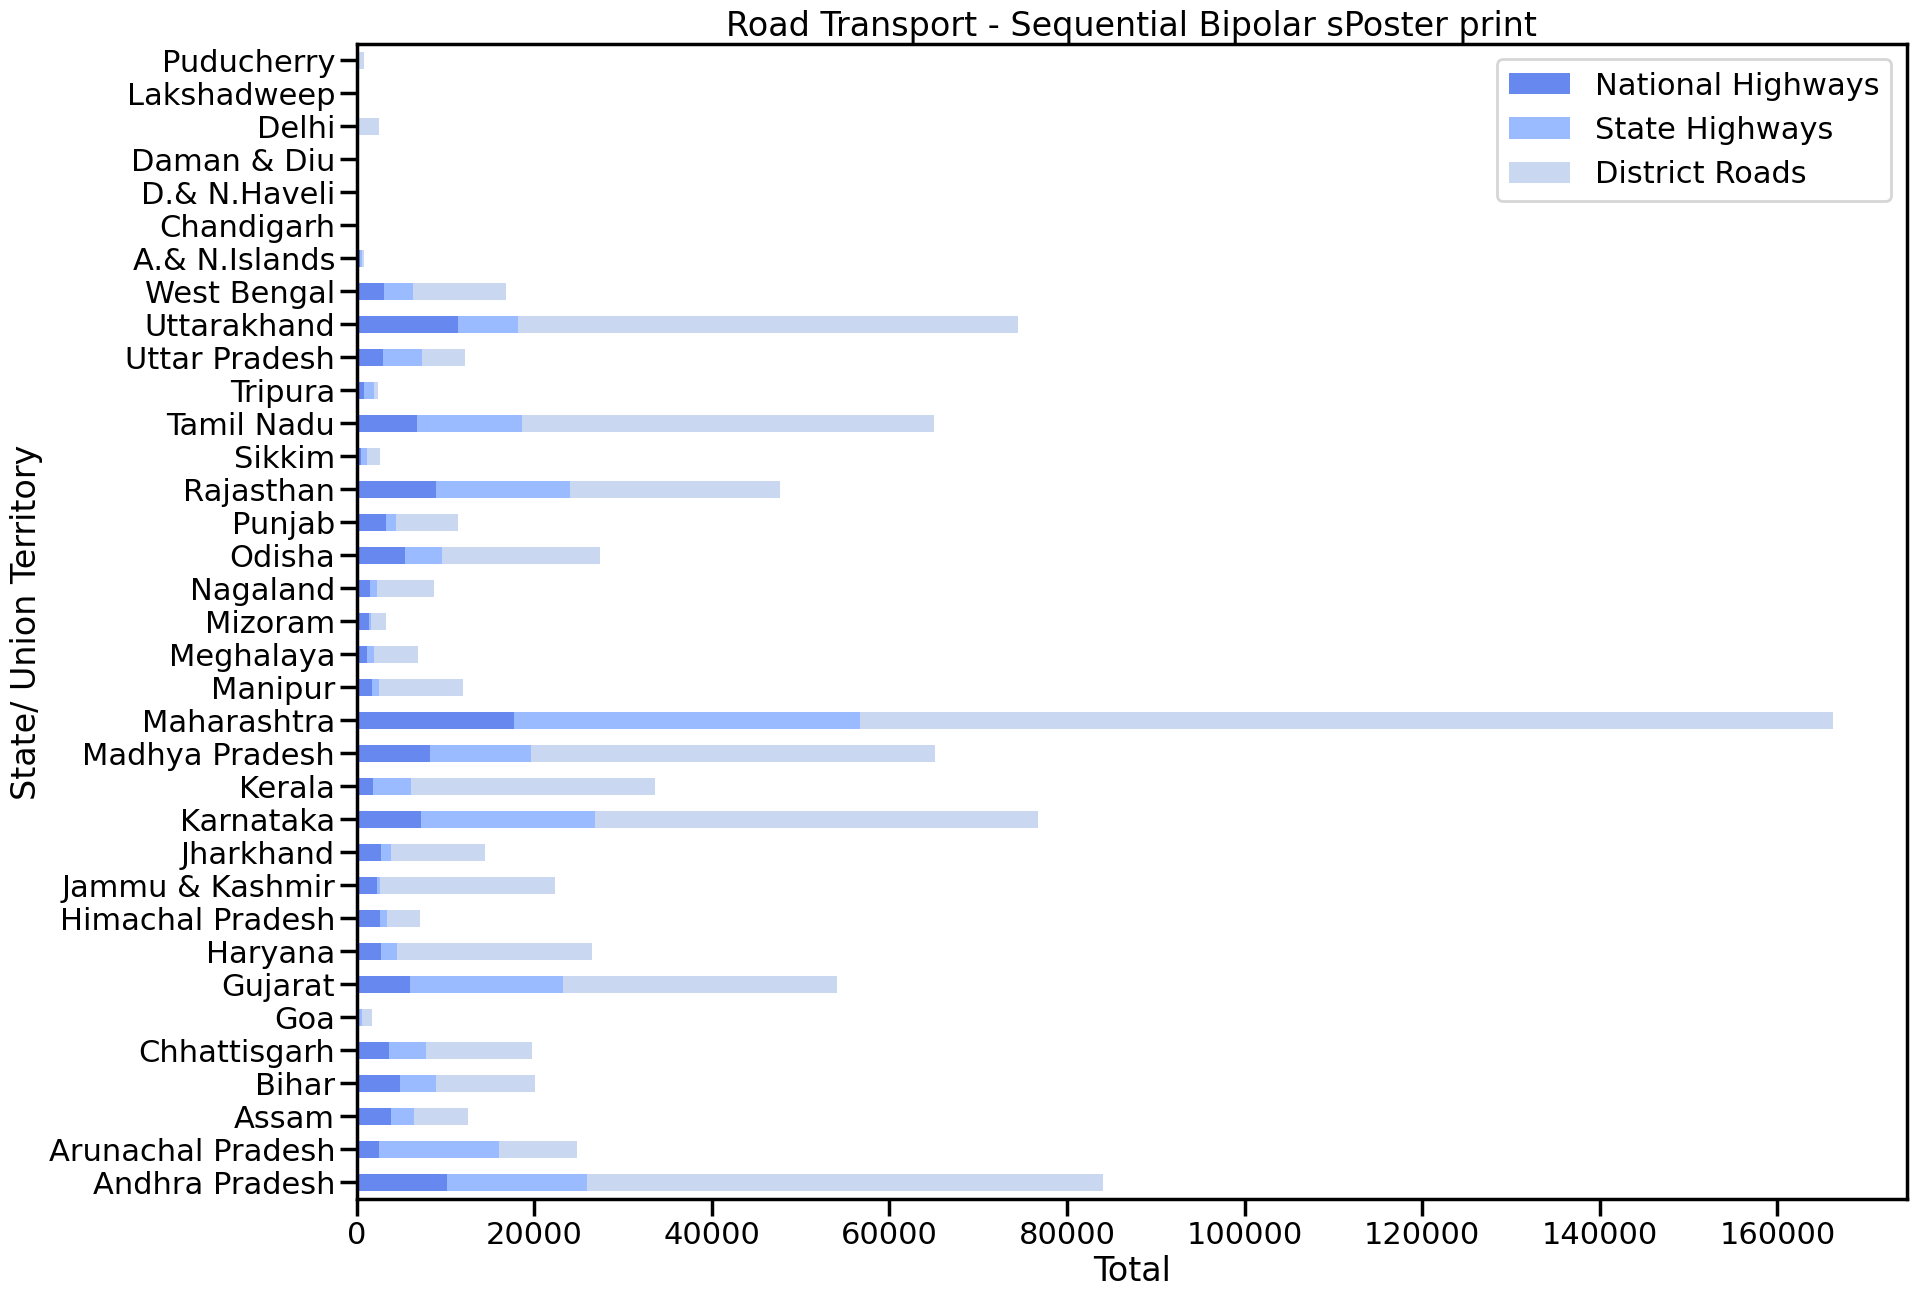

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), color=sns.color_palette('coolwarm'))
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - Sequential Bipolar sPoster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###custom colours

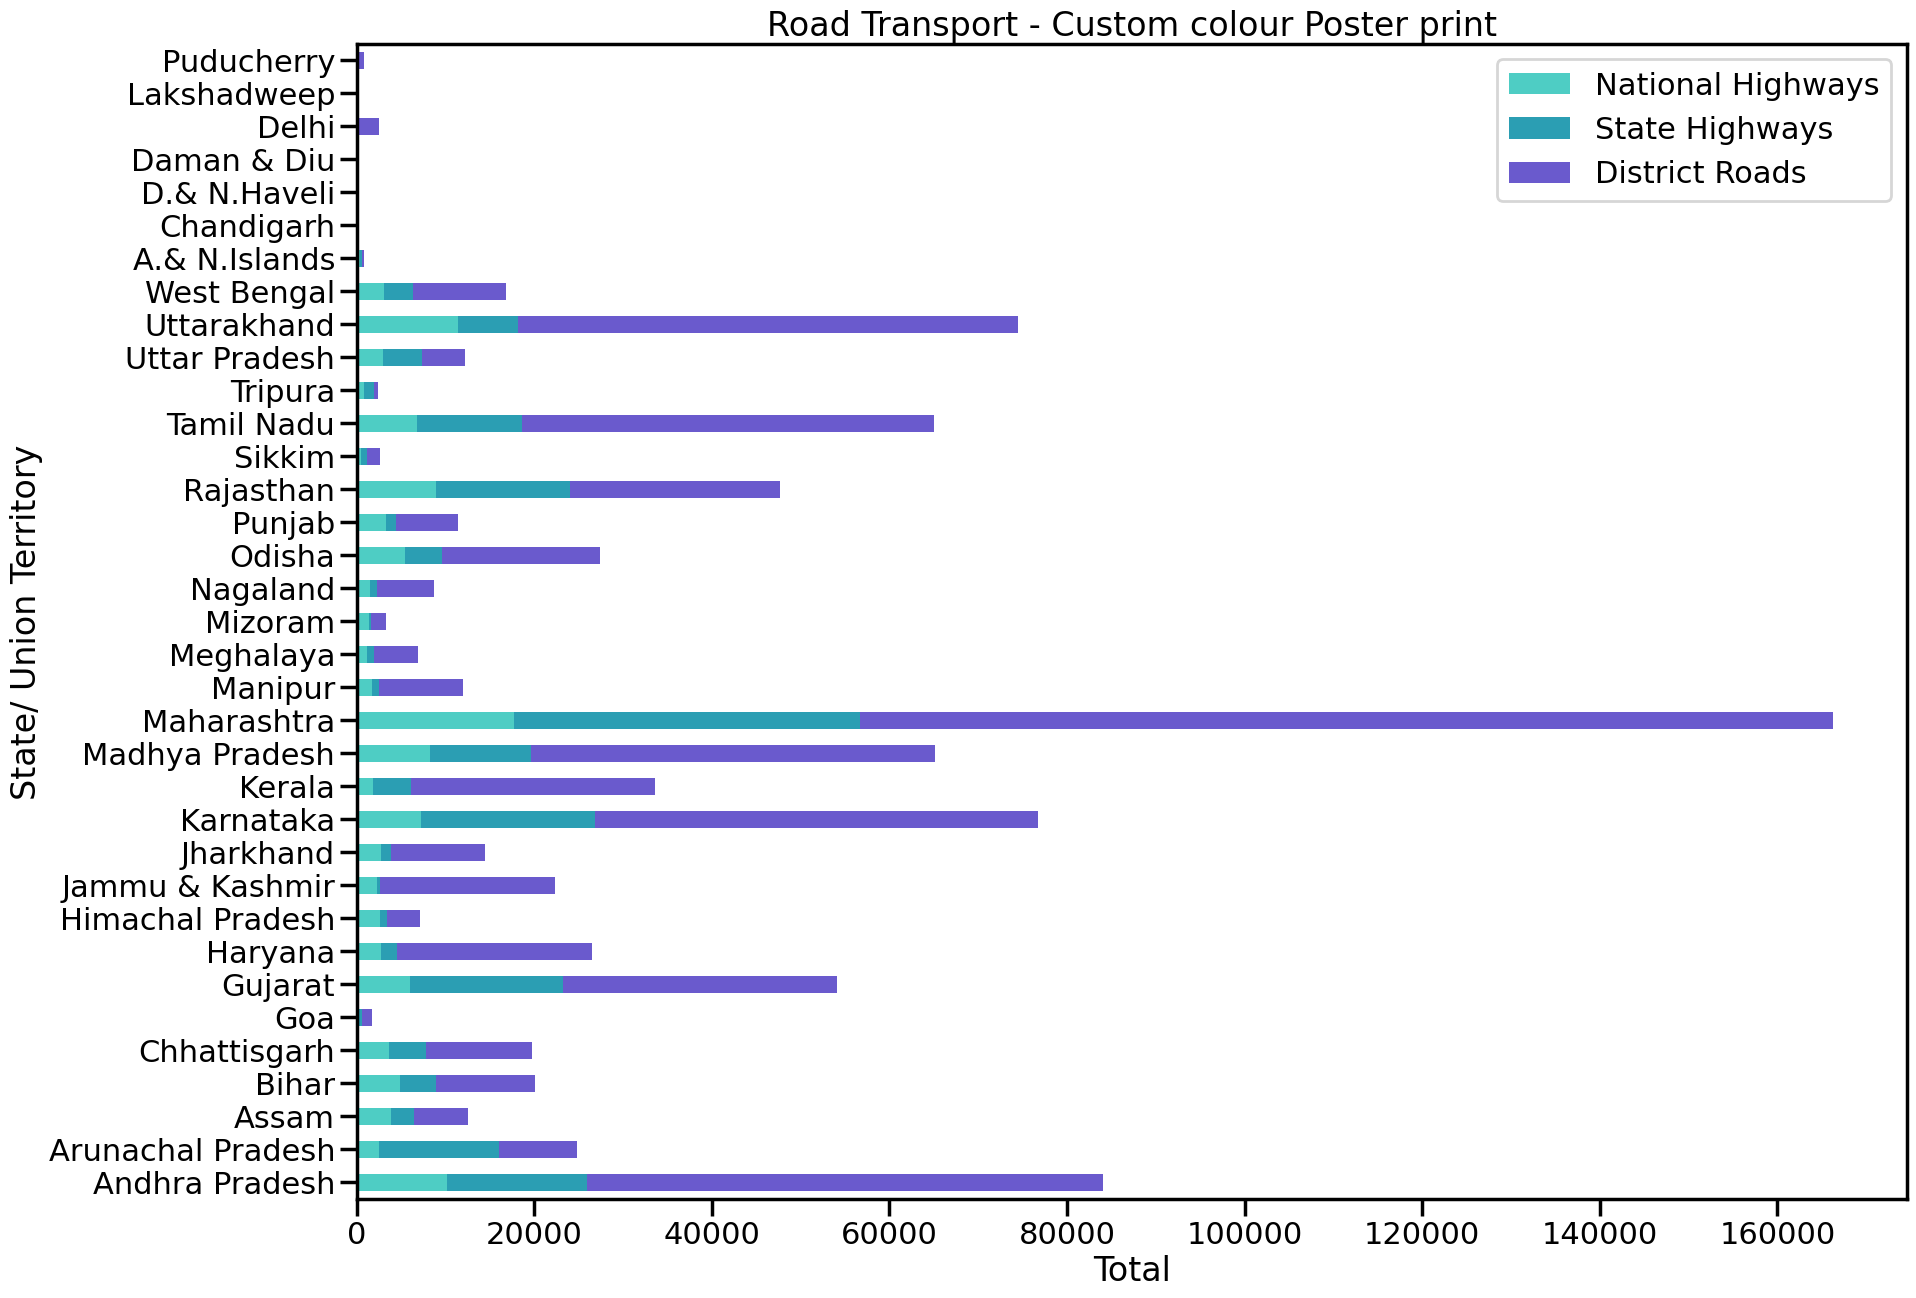

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'])
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - Custom colour Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###all colours in a subplot

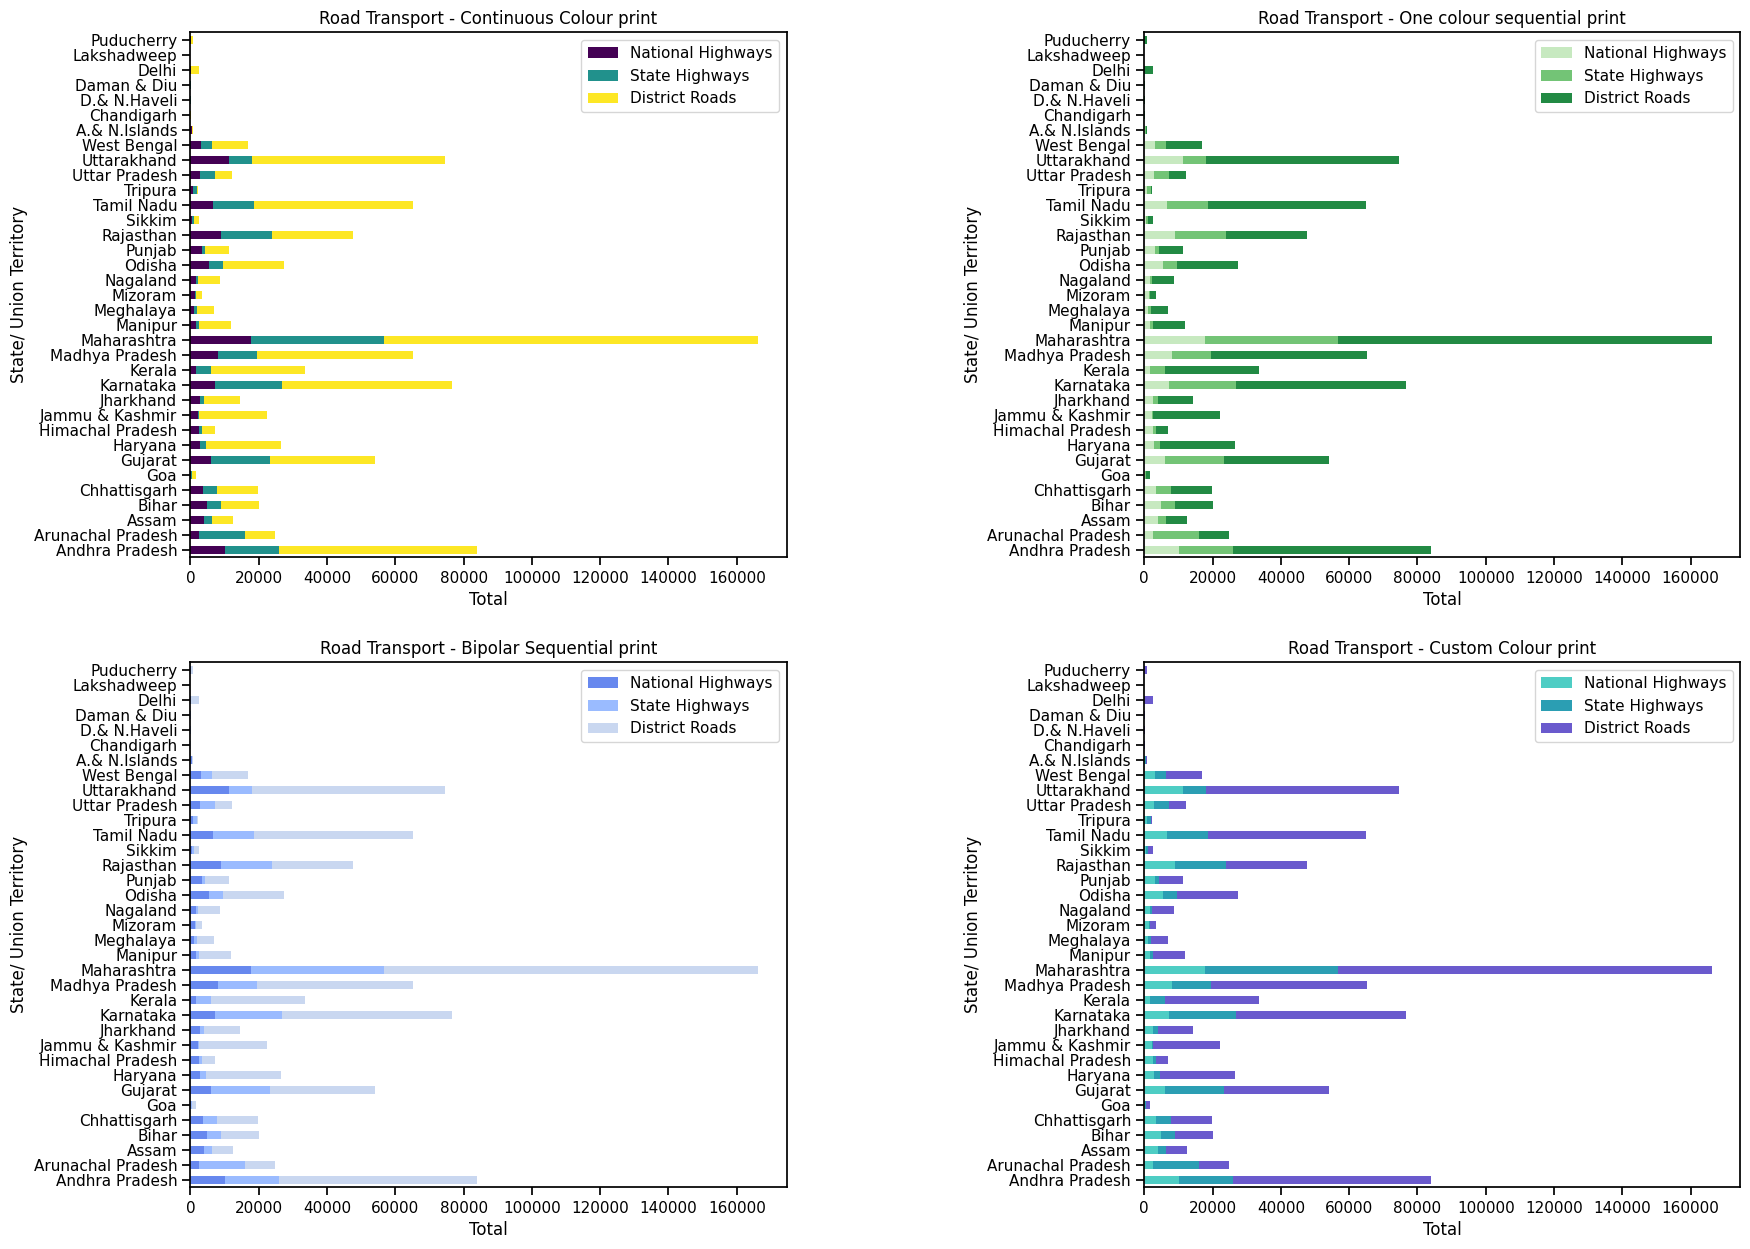

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(50, 50))

# Plot the first graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), cmap='viridis', ax=axes[0][0])
axes[0][0].set_xlabel('Total')
axes[0][0].set_ylabel('State/ Union Territory')
axes[0][0].set_title('Road Transport - Continuous Colour print')

# Plot the second graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), color=sns.color_palette('Greens', n_colors=len(agg_data_pivot.columns)), ax=axes[0][1])
axes[0][1].set_xlabel('Total')
axes[0][1].set_ylabel('State/ Union Territory')
axes[0][1].set_title('Road Transport - One colour sequential print')

# Plot the third graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), color=sns.color_palette('coolwarm'), ax=axes[1][0])
axes[1][0].set_xlabel('Total')
axes[1][0].set_ylabel('State/ Union Territory')
axes[1][0].set_title('Road Transport - Bipolar Sequential print')

# Plot the fourth graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'], ax=axes[1][1])
axes[1][1].set_xlabel('Total')
axes[1][1].set_ylabel('State/ Union Territory')
axes[1][1].set_title('Road Transport - Custom Colour print')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.6)

# Show the plots
plt.show()


###log scale

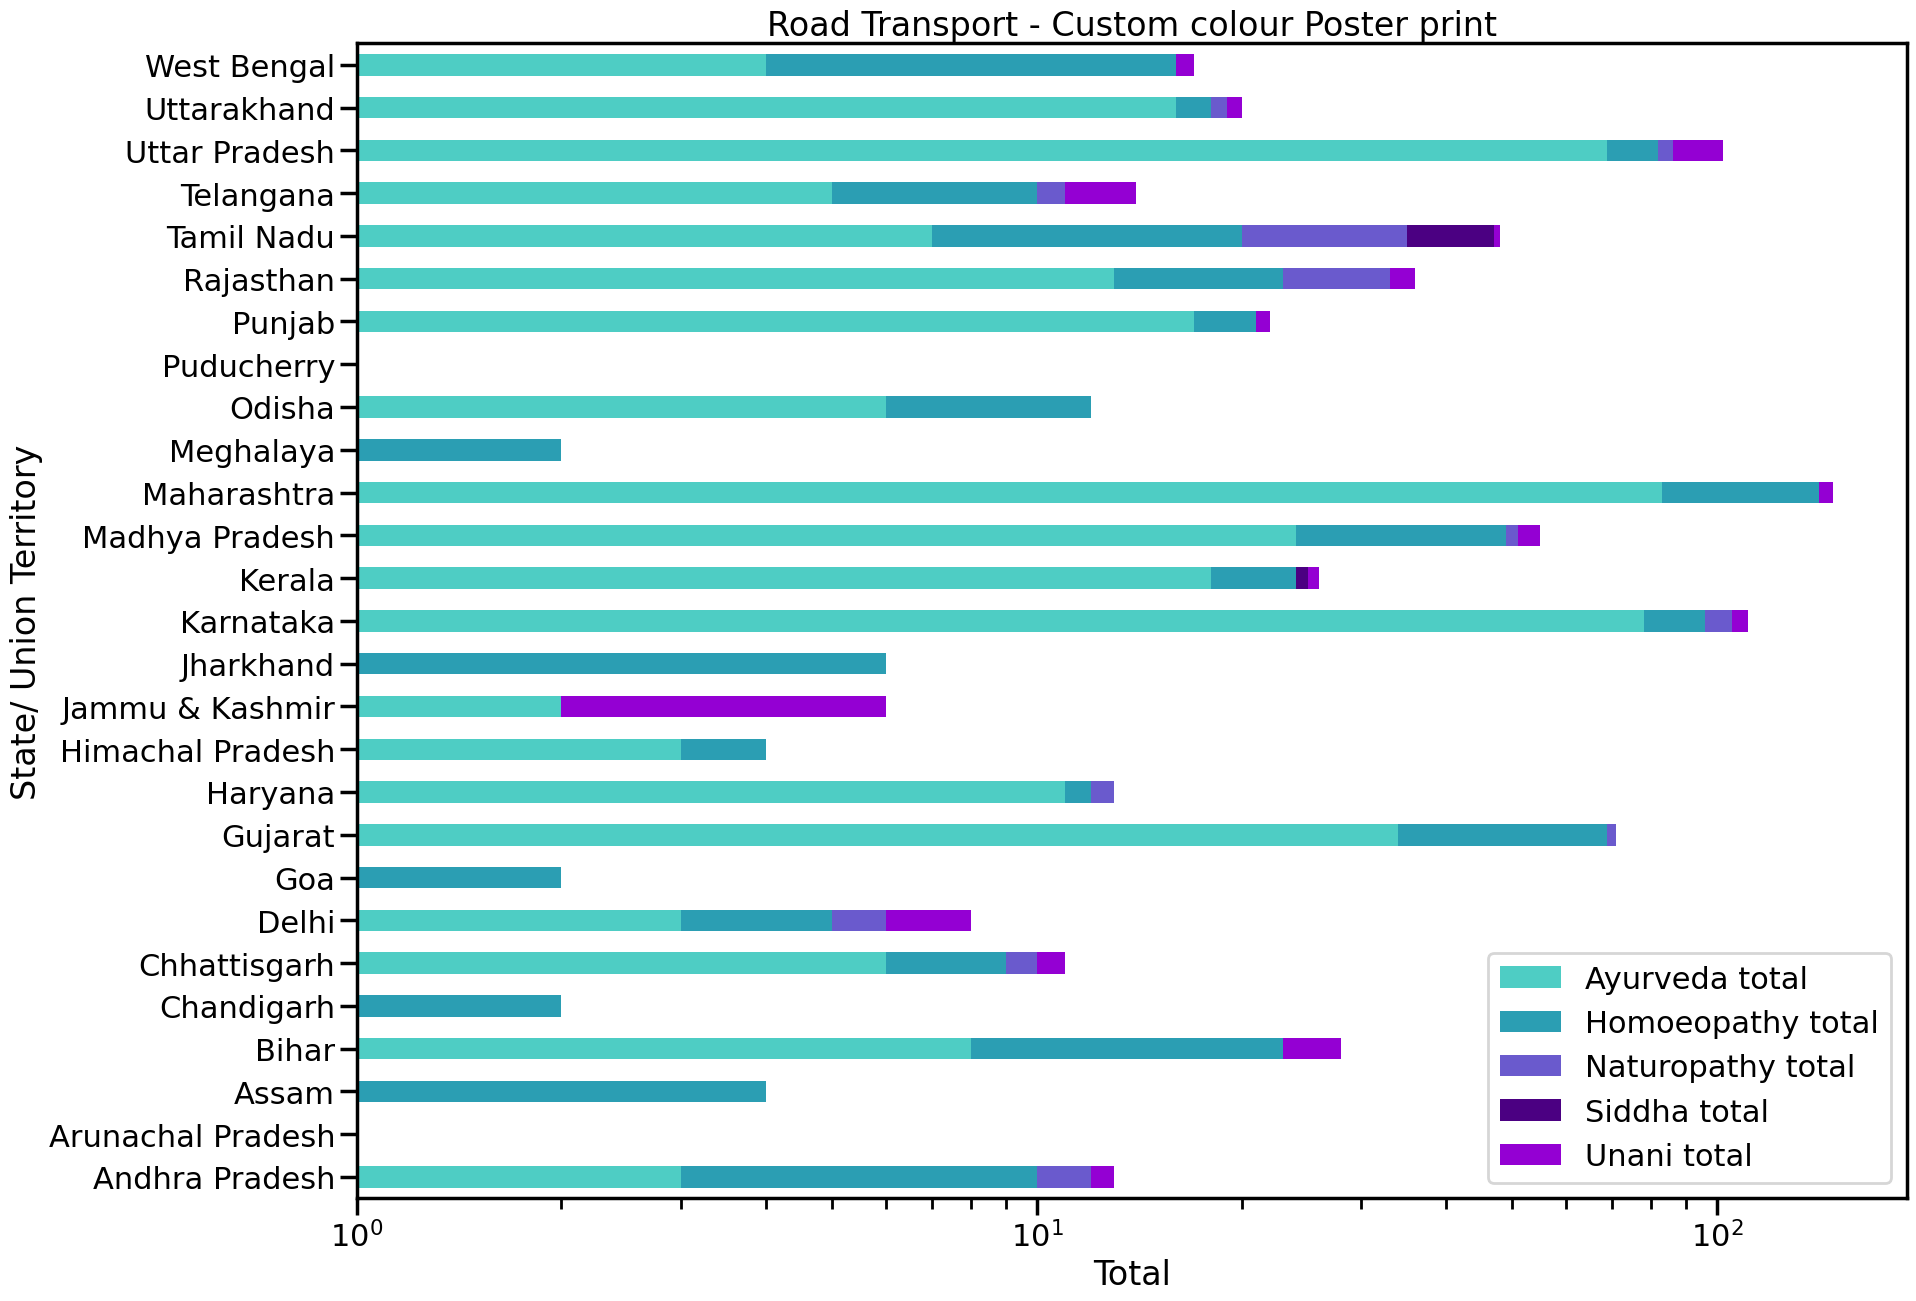

In [ ]:
sns.set_context('poster')
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15), color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'])
plt.xscale('log')
plt.xlabel('Total')
plt.ylabel('State/ Union Territory')
plt.title('Road Transport - Custom colour Poster print')
plt.legend(agg_data_pivot.columns)
plt.show()
print()

###log scale vs normal scale

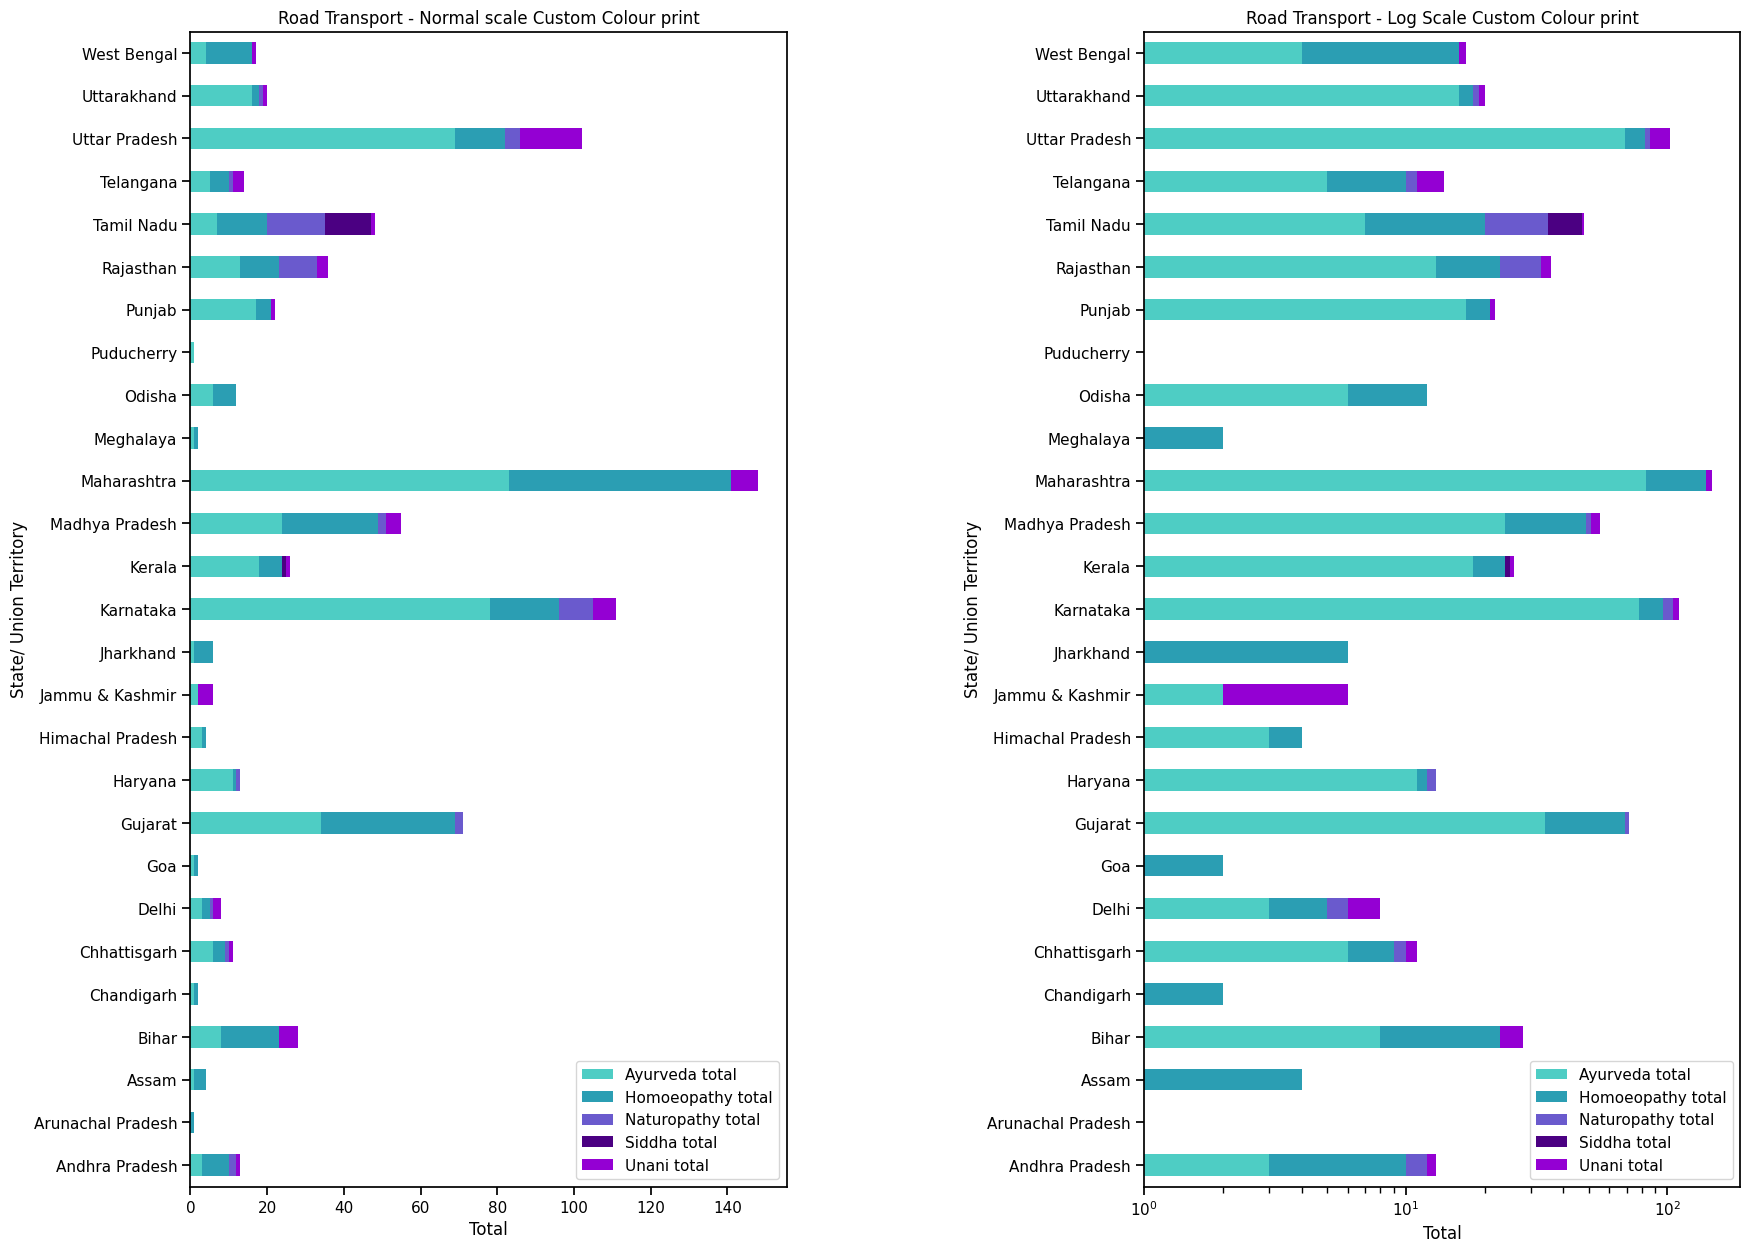

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_context('notebook')

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(50, 50))

# Plot the first graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15),  color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'] , ax=axes[0])
axes[0].set_xlabel('Total')
axes[0].set_ylabel('State/ Union Territory')
axes[0].set_title('Road Transport - Normal scale Custom Colour print')

# Plot the second graph
agg_data_pivot.plot(kind='barh', stacked=True, figsize=(20, 15),  color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'], ax=axes[1])
axes[1].set_xlabel('Total')
axes[1].set_xscale('log')
axes[1].set_ylabel('State/ Union Territory')
axes[1].set_title('Road Transport - Log Scale Custom Colour print')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.6)

# Show the plots
plt.show()